In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
dataset_ATR = pd.read_csv('../../indata/ATR_203_20230328.csv', sep=',')
dataset_ATR.head()

C:\Users\USER88~1\AppData\Local\Temp/ipykernel_3396/547998309.py:1: DtypeWarning: Columns (26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_ATR = pd.read_csv('../../indata/ATR_203_20230328.csv', sep=',')


Trafikföretag  Trafikföretagsnr  Linje  Estimated       Datum  \
0  Nobina Linköping              9205    203          1  2020-06-15   
1  Nobina Linköping              9205    203          1  2020-06-15   
2  Nobina Linköping              9205    203          1  2020-06-15   
3  Nobina Linköping              9205    203          1  2020-06-15   
4  Nobina Linköping              9205    203          1  2020-06-15   

              Tidpunkt Hållplatstid  Timme Halvtimme     Kvart  ...  \
0  2020-06-15 05:24:55        05:24    5.0  05:00:00  05:15:00  ...   
1  2020-06-15 05:43:00        05:43    5.0  05:30:00  05:30:00  ...   
2  2020-06-15 05:40:52        05:40    5.0  05:30:00  05:30:00  ...   
3  2020-06-15 05:23:00        05:23    5.0  05:00:00  05:15:00  ...   
4  2020-06-15 04:49:07        04:49    4.0  04:30:00  04:45:00  ...   

   Hållplatsläge      StopPointGID  Hållplatsnr  Omlopp Påstigande  \
0              A  9022005001243001         1243     503        1.0   
1              A  9022005000219001          219     503        0.0   
2              B  9022005001338002         1338     503        0.0   
3             A5  9022005000050005           50     503        1.0   
4              A  9022005001338001         1338     503        1.0   

   Avstigande  Ombord Passagerare sittande Beläggning  Beläggning turer  
0         0.0     2.0          Okänt antal        NaN               NaN  
1         0.0     0.0          Okänt antal        NaN               NaN  
2         2.0     0.0          Okänt antal        NaN               NaN  
3         0.0     1.0          Okänt antal        NaN               NaN  
4         0.0     6.0          Okänt antal        NaN               NaN  

[5 rows x 28 columns]

In [3]:
current_line = dataset_ATR.iloc[0]['Linje']
current_line

203

In [4]:
# Filtrera bort de parametrar som inte har relevans 
# Centrala parametrar: tur, linje, sträcka (hållplatser)
dataset_ATR_selection = dataset_ATR[['SequenceInJourney', 'JourneyGID', 'VehicleGID', 'Hållplatsnamn', 'Tidpunkt', 'Avg.tid', 'Ombord']]
dataset_ATR_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543490 entries, 0 to 1543489
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   SequenceInJourney  1543490 non-null  int64  
 1   JourneyGID         1543490 non-null  int64  
 2   VehicleGID         1531095 non-null  float64
 3   Hållplatsnamn      1543490 non-null  object 
 4   Tidpunkt           1529693 non-null  object 
 5   Avg.tid            1543490 non-null  object 
 6   Ombord             1529693 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 82.4+ MB


In [5]:
dataset_ATR_selection = dataset_ATR_selection.dropna()

In [6]:
selected_GID = 9015005020300028

In [14]:
# Filtrera på en JourneyGID
filter_journeyGID = dataset_ATR_selection['JourneyGID'] == selected_GID
data_filter_journeyGID = dataset_ATR_selection.loc[filter_journeyGID]
data_filter_journeyGID.tail()

SequenceInJourney        JourneyGID    VehicleGID  \
1539172                  5  9015005020300028  9.031006e+15   
1539173                  3  9015005020300028  9.031006e+15   
1539174                  6  9015005020300028  9.031006e+15   
1539175                  1  9015005020300028  9.031006e+15   
1539176                  2  9015005020300028  9.031006e+15   

                   Hållplatsnamn             Tidpunkt Avg.tid  Ombord  
1539172           Mårdtorpsgatan  2023-03-24 07:36:11   07:30    20.0  
1539173           Alsättersgatan  2023-03-24 07:33:21   07:30    12.0  
1539174              Ryd centrum  2023-03-24 07:37:34   07:30    31.0  
1539175  Rydsvägens ändhållplats  2023-03-24 07:31:05   07:30     3.0  
1539176         Björnkärrsskolan  2023-03-24 07:32:13   07:30     8.0

In [10]:
dataset_ATR_selection_avg_tid = data_filter_journeyGID.groupby('Avg.tid').mean()
dataset_ATR_selection_avg_tid

SequenceInJourney    JourneyGID    VehicleGID     Ombord
Avg.tid                                                          
07:30             7.438621  9.015005e+15  9.031006e+15  21.668302
09:16             7.350704  9.015005e+15  9.031006e+15  11.421127

In [11]:
# Filtrera på en Avgångstid
avg_tid = '07:30'
filter_journeyAVGtid = data_filter_journeyGID['Avg.tid'] == avg_tid
data_filter_journeyAVGtid = data_filter_journeyGID.loc[filter_journeyAVGtid]
data_filter_journeyAVGtid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7136 entries, 58995 to 1539176
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SequenceInJourney  7136 non-null   int64  
 1   JourneyGID         7136 non-null   int64  
 2   VehicleGID         7136 non-null   float64
 3   Hållplatsnamn      7136 non-null   object 
 4   Tidpunkt           7136 non-null   object 
 5   Avg.tid            7136 non-null   object 
 6   Ombord             7136 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 446.0+ KB


In [12]:
# Hitta de index med maximal sekvens
index_max = data_filter_journeyAVGtid[['SequenceInJourney']].idxmax()
data_filter_journeyAVGtid.iloc[3]

SequenceInJourney                     11
JourneyGID              9015005020300028
VehicleGID            9031005920505652.0
Hållplatsnamn              Barnhemsgatan
Tidpunkt             2020-08-18 07:44:15
Avg.tid                            07:30
Ombord                               6.0
Name: 58998, dtype: object

In [58]:
sequenceJourneys = data_filter_journeyAVGtid.groupby('Hållplatsnamn').mean().sort_values(by=['SequenceInJourney'])['SequenceInJourney']
sequenceJourneys

Hållplatsnamn
Rydsvägens ändhållplats     1.000000
Björnkärrsskolan            2.000000
Alsättersgatan              3.000000
Hangaren                    4.000000
Mårdtorpsgatan              5.000000
Ryd centrum                 6.000000
Solhaga                     7.000000
Gamla Linköping             8.000000
Vallaplan                   9.000000
Parkgatan                  10.000000
Barnhemsgatan              11.000000
Stora Torget               12.000000
Trädgårdstorget            12.000000
Kungsgatan                 13.000000
Linköpings resecentrum     13.980531
Name: SequenceInJourney, dtype: float64

In [59]:
stop_names = data_filter_journeyAVGtid.groupby('Hållplatsnamn').mean().sort_values(by=['SequenceInJourney']).index.values.tolist()
stop_names

['Rydsvägens ändhållplats',
 'Björnkärrsskolan',
 'Alsättersgatan',
 'Hangaren',
 'Mårdtorpsgatan',
 'Ryd centrum',
 'Solhaga',
 'Gamla Linköping',
 'Vallaplan',
 'Parkgatan',
 'Barnhemsgatan',
 'Stora Torget',
 'Trädgårdstorget',
 'Kungsgatan',
 'Linköpings resecentrum']

In [60]:
sequenceJourneys = data_filter_journeyAVGtid.groupby('SequenceInJourney').mean().index.values.tolist()
max_sequence = sequenceJourneys[-1]
max_sequence

14

In [61]:
if len(stop_names) > max_sequence:
    for i in range(0, len(sequenceJourneys)-1):
        if sequenceJourneys[i+1] - sequenceJourneys[i] == 0:
            stop_names.pop(i+1)
stop_names

['Rydsvägens ändhållplats',
 'Björnkärrsskolan',
 'Alsättersgatan',
 'Hangaren',
 'Mårdtorpsgatan',
 'Ryd centrum',
 'Solhaga',
 'Gamla Linköping',
 'Vallaplan',
 'Parkgatan',
 'Barnhemsgatan',
 'Stora Torget',
 'Trädgårdstorget',
 'Kungsgatan',
 'Linköpings resecentrum']

In [62]:
data_filter_journeyAVGtid_sorted = data_filter_journeyAVGtid.sort_values(by=['Tidpunkt'])
data_filter_journeyAVGtid_sorted.head(10)

SequenceInJourney        JourneyGID    VehicleGID  \
59004                  1  9015005020300028  9.031006e+15   
59005                  1  9015005020300028  9.031006e+15   
58996                  2  9015005020300028  9.031006e+15   
58997                  3  9015005020300028  9.031006e+15   
59001                  4  9015005020300028  9.031006e+15   
59002                  5  9015005020300028  9.031006e+15   
59003                  6  9015005020300028  9.031006e+15   
59000                  8  9015005020300028  9.031006e+15   
58998                 11  9015005020300028  9.031006e+15   
58995                 14  9015005020300028  9.031006e+15   

                 Hållplatsnamn             Tidpunkt Avg.tid  Ombord  
59004  Rydsvägens ändhållplats  2020-08-18 07:30:22   07:30     3.0  
59005  Rydsvägens ändhållplats  2020-08-18 07:30:22   07:30     3.0  
58996         Björnkärrsskolan  2020-08-18 07:31:18   07:30     4.0  
58997           Alsättersgatan  2020-08-18 07:32:21   07:30     6.0  
59001                 Hangaren  2020-08-18 07:33:20   07:30     7.0  
59002           Mårdtorpsgatan  2020-08-18 07:34:50   07:30     8.0  
59003              Ryd centrum  2020-08-18 07:36:08   07:30    10.0  
59000          Gamla Linköping  2020-08-18 07:40:08   07:30     8.0  
58998            Barnhemsgatan  2020-08-18 07:44:15   07:30     6.0  
58995   Linköpings resecentrum  2020-08-18 07:56:32   07:30     3.0

In [63]:
saved_rows = []
counter = 0
for i in range(0, len(data_filter_journeyAVGtid_sorted)):
    this_value = data_filter_journeyAVGtid_sorted.iloc[i]['SequenceInJourney']
    for j in range(counter, len(sequenceJourneys)):
        if this_value == sequenceJourneys[j]:
            saved_rows.append(data_filter_journeyAVGtid_sorted.iloc[i])
            print(str(sequenceJourneys[j]) + ' --> This one exsists! :)')
            counter = counter + 1
            if counter == max_sequence:
                print('Restet counter...')
                counter = 0
                j = 0
            break
        else:
            print(str(sequenceJourneys[j]) + ' --> ADD')
            new_row = data_filter_journeyAVGtid_sorted.iloc[i].copy()
            new_row['SequenceInJourney'] = sequenceJourneys[j]
            new_row['Hållplatsnamn'] = stop_names[counter]
            saved_rows.append(new_row)
            counter = counter + 1
            if counter == max_sequence:
                print('Restet counter...')
                counter = 0
            j = 0     

1 --> This one exsists! :)
2 --> ADD
3 --> ADD
4 --> ADD
5 --> ADD
6 --> ADD
7 --> ADD
8 --> ADD
9 --> ADD
10 --> ADD
11 --> ADD
12 --> ADD
13 --> ADD
14 --> ADD
Restet counter...
1 --> ADD
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> ADD
8 --> This one exsists! :)
9 --> ADD
10 --> ADD
11 --> This one exsists! :)
12 --> ADD
13 --> ADD
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> ADD
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> ADD
10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> ADD
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> Thi

2 --> ADD
3 --> ADD
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> ADD
10 --> ADD
11 --> ADD
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> ADD
10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> ADD
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> This one exsists! :)
10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> This one e

10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> ADD
4 --> This one exsists! :)
5 --> ADD
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> ADD
10 --> This one exsists! :)
11 --> ADD
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> ADD
3 --> ADD
4 --> ADD
5 --> ADD
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> ADD
10 --> ADD
11 --> ADD
12 --> ADD
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> ADD
3 --> ADD
4 --> This one exsists! :)
5 --> ADD
6 --> ADD
7 --> This one exsists! :)
8 --> ADD
9 --> ADD
10 --> This one exsists! :)
11 --> ADD
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> T

13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> ADD
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> This one exsists! :)
10 --> This one exsists! :)
11 --> ADD
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> ADD
10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This on

3 --> ADD
4 --> ADD
5 --> ADD
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> ADD
10 --> ADD
11 --> ADD
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> ADD
10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> ADD
10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> ADD
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --

6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> ADD
10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> This one exsists! :)
10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> ADD
10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This 

10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> ADD
10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> ADD
10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsis

3 --> This one exsists! :)
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> This one exsists! :)
10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> This one exsists! :)
10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> ADD
10 --> This one exsists! :

8 --> This one exsists! :)
9 --> This one exsists! :)
10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> This one exsists! :)
10 --> ADD
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> ADD
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> ADD
3 --> ADD
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> ADD
10 --> ADD
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> ADD
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> ADD
4 --> ADD
5 --> ADD
6 --> This one exsist

Restet counter...
1 --> This one exsists! :)
2 --> ADD
3 --> This one exsists! :)
4 --> ADD
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> ADD
10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> ADD
3 --> This one exsists! :)
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> This one exsists! :)
10 --> This one exsists! :)
11 --> ADD
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> This one exsists! :)
10 --> ADD
11 --> This

Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> ADD
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> ADD
10 --> ADD
11 --> ADD
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> ADD
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> This one exsists! :)
10 --> ADD
11 --> ADD
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> ADD
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> This one exsists! :)
10 --> ADD
11 --> This one exsists! :)
12 --> This one exsists! :)
13 -->

5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> ADD
8 --> This one exsists! :)
9 --> This one exsists! :)
10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> This one exsists! :)
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> ADD
10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> This one exsists! :)
14 --> This one exsists! :)
Restet counter...
1 --> This one exsists! :)
2 --> This one exsists! :)
3 --> This one exsists! :)
4 --> ADD
5 --> This one exsists! :)
6 --> This one exsists! :)
7 --> This one exsists! :)
8 --> This one exsists! :)
9 --> This one exsists! :)
10 --> This one exsists! :)
11 --> This one exsists! :)
12 --> This one exsists! :)
13 --> This one exsists! :)
14

In [64]:
df_train_set = pd.DataFrame(saved_rows).reset_index(drop=True)
df_train_set.head()

SequenceInJourney        JourneyGID    VehicleGID            Hållplatsnamn  \
0                  1  9015005020300028  9.031006e+15  Rydsvägens ändhållplats   
1                  2  9015005020300028  9.031006e+15         Björnkärrsskolan   
2                  3  9015005020300028  9.031006e+15           Alsättersgatan   
3                  4  9015005020300028  9.031006e+15                 Hangaren   
4                  5  9015005020300028  9.031006e+15           Mårdtorpsgatan   

              Tidpunkt Avg.tid  Ombord  
0  2020-08-18 07:30:22   07:30     3.0  
1  2020-08-18 07:30:22   07:30     3.0  
2  2020-08-18 07:30:22   07:30     3.0  
3  2020-08-18 07:30:22   07:30     3.0  
4  2020-08-18 07:30:22   07:30     3.0

In [65]:
dataset_prediction = pd.read_csv('../results_ai_sweden/result_line_203.csv', sep=',')
dataset_prediction.head()

SequenceInJourney  Linje        JourneyGID Avg.tid             Tidpunkt  \
0                  1    203  9015005020300001   05:23  2023-03-25 05:23:00   
1                  2    203  9015005020300001   05:23  2023-03-25 05:24:55   
2                  3    203  9015005020300001   05:23  2023-03-25 05:40:52   
3                  4    203  9015005020300001   05:23  2023-03-25 05:40:52   
4                  5    203  9015005020300001   05:23  2023-03-25 05:40:52   

            Hållplatsnamn  prediction  
0  Linköpings resecentrum         2.0  
1              Kungsgatan         3.0  
2            Stora Torget         4.0  
3         Trädgårdstorget         4.0  
4           Barnhemsgatan         3.0

In [66]:
dataset_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429155 entries, 0 to 429154
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SequenceInJourney  429155 non-null  int64  
 1   Linje              429155 non-null  int64  
 2   JourneyGID         429155 non-null  int64  
 3   Avg.tid            429155 non-null  object 
 4   Tidpunkt           429155 non-null  object 
 5   Hållplatsnamn      429155 non-null  object 
 6   prediction         429155 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 22.9+ MB


In [67]:
# Filtrera på en JourneyGID
filter_journeyGID_pred = dataset_prediction['JourneyGID'] == selected_GID
data_filter_journeyGID_pred = dataset_prediction.loc[filter_journeyGID_pred]
data_filter_journeyGID_pred.head()

SequenceInJourney  Linje        JourneyGID Avg.tid  \
53151                  1    203  9015005020300028   07:30   
53152                  2    203  9015005020300028   07:30   
53153                  3    203  9015005020300028   07:30   
53154                  4    203  9015005020300028   07:30   
53155                  5    203  9015005020300028   07:30   

                  Tidpunkt            Hållplatsnamn  prediction  
53151  2023-03-25 07:30:22  Rydsvägens ändhållplats        48.0  
53152  2023-03-25 07:30:22         Björnkärrsskolan        55.0  
53153  2023-03-25 07:30:22           Alsättersgatan        49.0  
53154  2023-03-25 07:30:22                 Hangaren        48.0  
53155  2023-03-25 07:30:22           Mårdtorpsgatan        49.0

In [68]:
filter_journeyAVGtid_pred = data_filter_journeyGID_pred['Avg.tid'] == avg_tid
data_filter_journeyAVGtid_pred = data_filter_journeyGID_pred.loc[filter_journeyAVGtid_pred]
data_filter_journeyAVGtid_pred.head()

SequenceInJourney  Linje        JourneyGID Avg.tid  \
53151                  1    203  9015005020300028   07:30   
53152                  2    203  9015005020300028   07:30   
53153                  3    203  9015005020300028   07:30   
53154                  4    203  9015005020300028   07:30   
53155                  5    203  9015005020300028   07:30   

                  Tidpunkt            Hållplatsnamn  prediction  
53151  2023-03-25 07:30:22  Rydsvägens ändhållplats        48.0  
53152  2023-03-25 07:30:22         Björnkärrsskolan        55.0  
53153  2023-03-25 07:30:22           Alsättersgatan        49.0  
53154  2023-03-25 07:30:22                 Hangaren        48.0  
53155  2023-03-25 07:30:22           Mårdtorpsgatan        49.0

In [69]:
data_filter_journeyAVGtid_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1590 entries, 53151 to 54740
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SequenceInJourney  1590 non-null   int64  
 1   Linje              1590 non-null   int64  
 2   JourneyGID         1590 non-null   int64  
 3   Avg.tid            1590 non-null   object 
 4   Tidpunkt           1590 non-null   object 
 5   Hållplatsnamn      1590 non-null   object 
 6   prediction         1590 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 99.4+ KB


In [90]:
real_data = df_train_set[len(df_train_set)-len(data_filter_journeyAVGtid_pred):]
real_data.tail(30)

SequenceInJourney        JourneyGID    VehicleGID  \
7922                 13  9015005020300028  9.031006e+15   
7923                 14  9015005020300028  9.031006e+15   
7924                  1  9015005020300028  9.031006e+15   
7925                  2  9015005020300028  9.031006e+15   
7926                  3  9015005020300028  9.031006e+15   
7927                  4  9015005020300028  9.031006e+15   
7928                  5  9015005020300028  9.031006e+15   
7929                  6  9015005020300028  9.031006e+15   
7930                  7  9015005020300028  9.031006e+15   
7931                  8  9015005020300028  9.031006e+15   
7932                  9  9015005020300028  9.031006e+15   
7933                 10  9015005020300028  9.031006e+15   
7934                 11  9015005020300028  9.031006e+15   
7935                 12  9015005020300028  9.031006e+15   
7936                 13  9015005020300028  9.031006e+15   
7937                 14  9015005020300028  9.031006e+15   
7938                  1  9015005020300028  9.031006e+15   
7939                  2  9015005020300028  9.031006e+15   
7940                  3  9015005020300028  9.031006e+15   
7941                  4  9015005020300028  9.031006e+15   
7942                  5  9015005020300028  9.031006e+15   
7943                  6  9015005020300028  9.031006e+15   
7944                  7  9015005020300028  9.031006e+15   
7945                  8  9015005020300028  9.031006e+15   
7946                  9  9015005020300028  9.031006e+15   
7947                 10  9015005020300028  9.031006e+15   
7948                 11  9015005020300028  9.031006e+15   
7949                 12  9015005020300028  9.031006e+15   
7950                 13  9015005020300028  9.031006e+15   
7951                 14  9015005020300028  9.031006e+15   

                Hållplatsnamn             Tidpunkt Avg.tid  Ombord  
7922               Kungsgatan  2023-03-22 07:51:58   07:30    14.0  
7923   Linköpings resecentrum  2023-03-22 07:56:23   07:30     2.0  
7924  Rydsvägens ändhållplats  2023-03-23 07:30:59   07:30     8.0  
7925         Björnkärrsskolan  2023-03-23 07:32:13   07:30    19.0  
7926           Alsättersgatan  2023-03-23 07:33:18   07:30    24.0  
7927                 Hangaren  2023-03-23 07:34:24   07:30    28.0  
7928           Mårdtorpsgatan  2023-03-23 07:36:18   07:30    38.0  
7929              Ryd centrum  2023-03-23 07:37:58   07:30    56.0  
7930                  Solhaga  2023-03-23 07:41:10   07:30    70.0  
7931          Gamla Linköping  2023-03-23 07:45:10   07:30    63.0  
7932                Vallaplan  2023-03-23 07:46:22   07:30    65.0  
7933                Parkgatan  2023-03-23 07:47:37   07:30    56.0  
7934            Barnhemsgatan  2023-03-23 07:50:26   07:30    46.0  
7935             Stora Torget  2023-03-23 07:52:58   07:30    22.0  
7936               Kungsgatan  2023-03-23 07:54:50   07:30    19.0  
7937   Linköpings resecentrum  2023-03-23 07:57:57   07:30     0.0  
7938  Rydsvägens ändhållplats  2023-03-24 07:31:05   07:30     3.0  
7939         Björnkärrsskolan  2023-03-24 07:32:13   07:30     8.0  
7940           Alsättersgatan  2023-03-24 07:33:21   07:30    12.0  
7941                 Hangaren  2023-03-24 07:34:30   07:30    15.0  
7942           Mårdtorpsgatan  2023-03-24 07:36:11   07:30    20.0  
7943              Ryd centrum  2023-03-24 07:37:34   07:30    31.0  
7944                  Solhaga  2023-03-24 07:40:43   07:30    32.0  
7945          Gamla Linköping  2023-03-24 07:42:58   07:30    31.0  
7946                Vallaplan  2023-03-24 07:45:00   07:30    30.0  
7947                Parkgatan  2023-03-24 07:45:00   07:30    30.0  
7948            Barnhemsgatan  2023-03-24 07:47:07   07:30    28.0  
7949             Stora Torget  2023-03-24 07:49:52   07:30    14.0  
7950               Kungsgatan  2023-03-24 07:52:20   07:30     8.0  
7951   Linköpings resecentrum  2023-03-24 07:55:27   07:30     1.0

In [71]:
total_dataset = data_filter_journeyAVGtid_pred.assign(Ombord=real_data['Ombord'].values)
total_dataset.head()

SequenceInJourney  Linje        JourneyGID Avg.tid  \
53151                  1    203  9015005020300028   07:30   
53152                  2    203  9015005020300028   07:30   
53153                  3    203  9015005020300028   07:30   
53154                  4    203  9015005020300028   07:30   
53155                  5    203  9015005020300028   07:30   

                  Tidpunkt            Hållplatsnamn  prediction  Ombord  
53151  2023-03-25 07:30:22  Rydsvägens ändhållplats        48.0    64.0  
53152  2023-03-25 07:30:22         Björnkärrsskolan        55.0    50.0  
53153  2023-03-25 07:30:22           Alsättersgatan        49.0    49.0  
53154  2023-03-25 07:30:22                 Hangaren        48.0    51.0  
53155  2023-03-25 07:30:22           Mårdtorpsgatan        49.0    37.0

In [72]:
total_dataset['error'] = abs(total_dataset['Ombord'] - total_dataset['prediction'])
total_dataset.head()

SequenceInJourney  Linje        JourneyGID Avg.tid  \
53151                  1    203  9015005020300028   07:30   
53152                  2    203  9015005020300028   07:30   
53153                  3    203  9015005020300028   07:30   
53154                  4    203  9015005020300028   07:30   
53155                  5    203  9015005020300028   07:30   

                  Tidpunkt            Hållplatsnamn  prediction  Ombord  error  
53151  2023-03-25 07:30:22  Rydsvägens ändhållplats        48.0    64.0   16.0  
53152  2023-03-25 07:30:22         Björnkärrsskolan        55.0    50.0    5.0  
53153  2023-03-25 07:30:22           Alsättersgatan        49.0    49.0    0.0  
53154  2023-03-25 07:30:22                 Hangaren        48.0    51.0    3.0  
53155  2023-03-25 07:30:22           Mårdtorpsgatan        49.0    37.0   12.0

In [73]:
mean_error = total_dataset.mean(axis=0)
mean_error

C:\Users\USER88~1\AppData\Local\Temp/ipykernel_32304/2735808938.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_error = total_dataset.mean(axis=0)


SequenceInJourney    7.484906e+00
Linje                2.030000e+02
JourneyGID           9.015005e+15
prediction           2.447296e+01
Ombord               2.556981e+01
error                8.899371e+00
dtype: float64

In [74]:
min_sequence = 1
min_index = total_dataset.index[total_dataset['SequenceInJourney'] == min_sequence].tolist()

In [75]:
max_sequence = 14
max_index = total_dataset.index[total_dataset['SequenceInJourney'] == max_sequence].tolist()

In [76]:
tour_selection_1 = total_dataset.loc[min_index[0]:max_index[0]]

In [77]:
tour_selection_2 = total_dataset.loc[min_index[1]:max_index[1]]

In [78]:
tour_selection_3 = total_dataset.loc[min_index[2]:max_index[2]]

In [79]:
start_index = 0
stop_index = 0
stop_int = len(max_index)
saved_tours = []

if len(max_index) > len(min_index):
    stop_int = len(min_index)
if len(max_index) < len(min_index):
    stop_int = len(max_index)

for i in range(1, stop_int):
    tour = total_dataset.loc[min_index[start_index]:max_index[stop_index]]
    if len(tour) == 0:
        tour = total_dataset.loc[min_index[start_index]:max_index[stop_index + 1]]
        if len(tour) == 0:
            tour = total_dataset.loc[min_index[start_index]:max_index[stop_index + 2]]
            if len(tour) == 0:
                tour = total_dataset.loc[min_index[start_index]:max_index[stop_index + 3]]
        
    saved_tours.append(tour)
    print(tour)
    start_index = start_index + 1
    stop_index = stop_index + 1

       SequenceInJourney  Linje        JourneyGID Avg.tid  \
53151                  1    203  9015005020300028   07:30   
53152                  2    203  9015005020300028   07:30   
53153                  3    203  9015005020300028   07:30   
53154                  4    203  9015005020300028   07:30   
53155                  5    203  9015005020300028   07:30   
53156                  6    203  9015005020300028   07:30   
53157                  7    203  9015005020300028   07:30   
53158                  8    203  9015005020300028   07:30   
53159                  9    203  9015005020300028   07:30   
53160                 10    203  9015005020300028   07:30   
53161                 11    203  9015005020300028   07:30   
53162                 12    203  9015005020300028   07:30   
53163                 13    203  9015005020300028   07:30   
53164                 14    203  9015005020300028   07:30   

                  Tidpunkt            Hållplatsnamn  prediction  Ombord  error  
531

54088  2023-05-30 07:30:22               Kungsgatan         0.0    48.0   48.0  
       SequenceInJourney  Linje        JourneyGID Avg.tid  \
54089                  1    203  9015005020300028   07:30   
54090                  2    203  9015005020300028   07:30   
54091                  3    203  9015005020300028   07:30   
54092                  4    203  9015005020300028   07:30   
54093                  5    203  9015005020300028   07:30   
54094                  6    203  9015005020300028   07:30   
54095                  7    203  9015005020300028   07:30   
54096                  8    203  9015005020300028   07:30   
54097                  9    203  9015005020300028   07:30   
54098                 10    203  9015005020300028   07:30   
54099                 11    203  9015005020300028   07:30   
54100                 12    203  9015005020300028   07:30   
54101                 13    203  9015005020300028   07:30   
54102                 14    203  9015005020300028   07:30   

   

       SequenceInJourney  Linje        JourneyGID Avg.tid  \
54173                  1    203  9015005020300028   07:30   
54174                  2    203  9015005020300028   07:30   
54175                  3    203  9015005020300028   07:30   
54176                  4    203  9015005020300028   07:30   
54177                  5    203  9015005020300028   07:30   
54178                  6    203  9015005020300028   07:30   
54179                  7    203  9015005020300028   07:30   
54180                  8    203  9015005020300028   07:30   
54181                  9    203  9015005020300028   07:30   
54182                 10    203  9015005020300028   07:30   
54183                 11    203  9015005020300028   07:30   
54184                 12    203  9015005020300028   07:30   
54185                 13    203  9015005020300028   07:30   
54186                 14    203  9015005020300028   07:30   

                  Tidpunkt            Hållplatsnamn  prediction  Ombord  error  
541

In [80]:
# Select all tours with a predicted overload of passenger
tours_overload = []
load_limit = (66 + 43)/2
for i in range(0, len(saved_tours)):
    current_tour = saved_tours[i]['Ombord'].values
    for j in range(0, len(current_tour)):
        if current_tour[j] >= load_limit:
            tours_overload.append(saved_tours[i])
            break
print(len(tours_overload))

55


C:\Users\USER88~1\AppData\Local\Temp/ipykernel_32304/1311309442.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


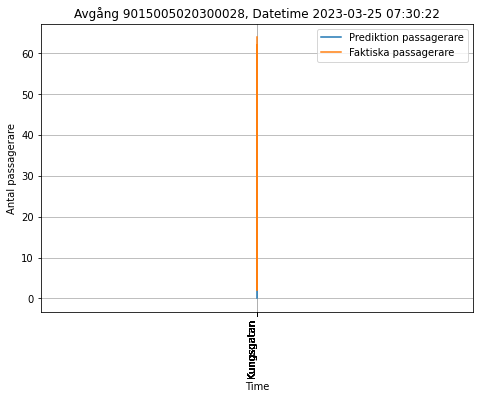

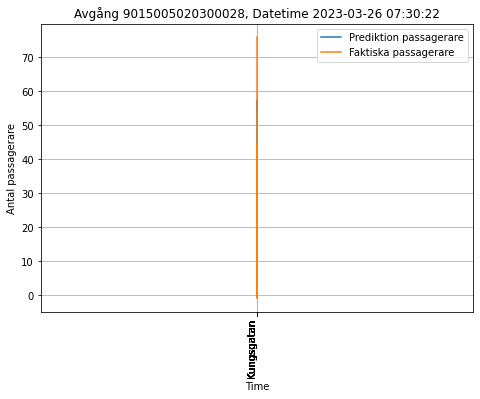

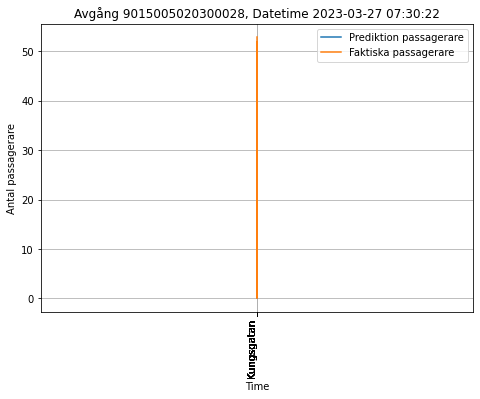

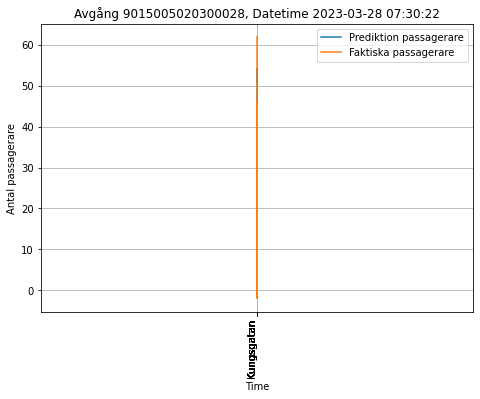

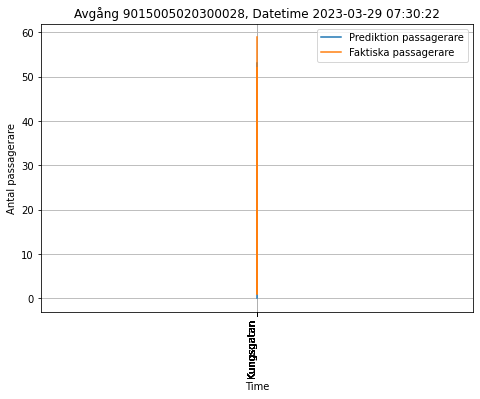

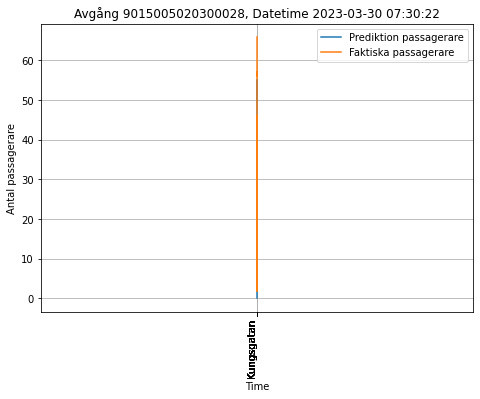

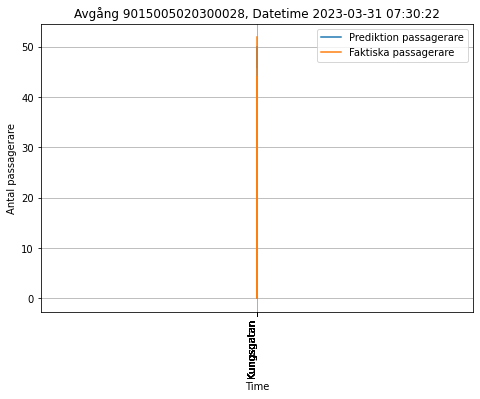

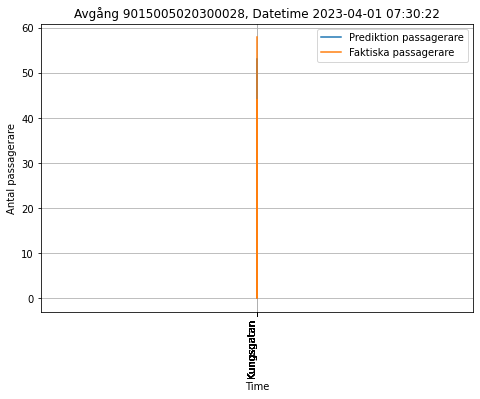

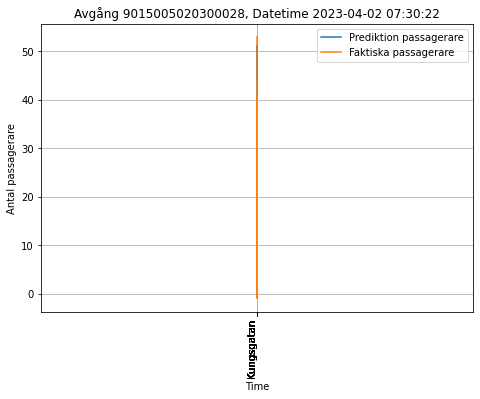

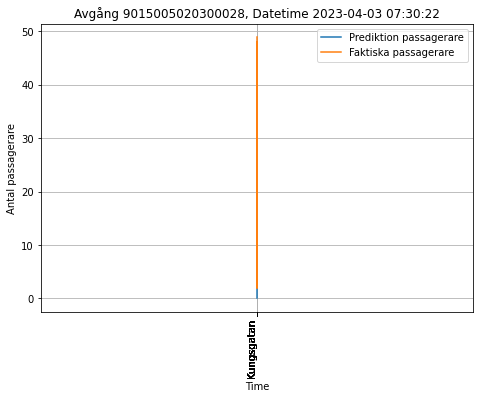

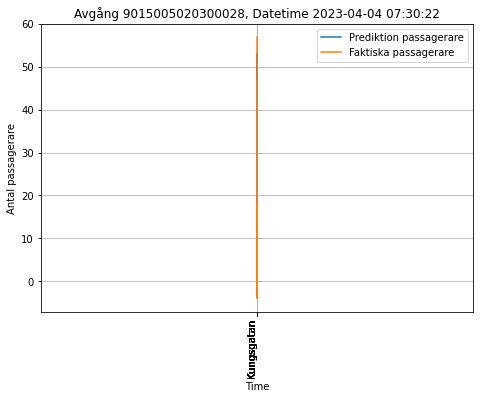

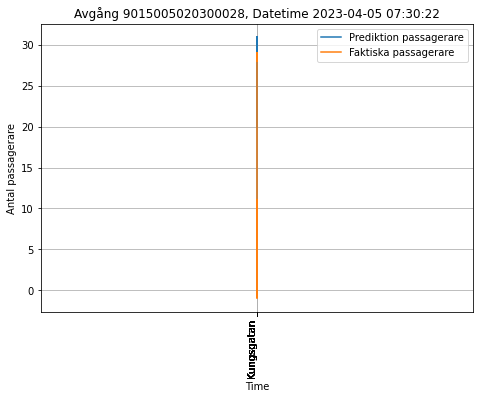

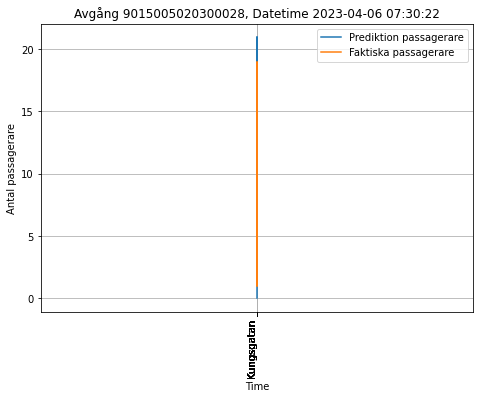

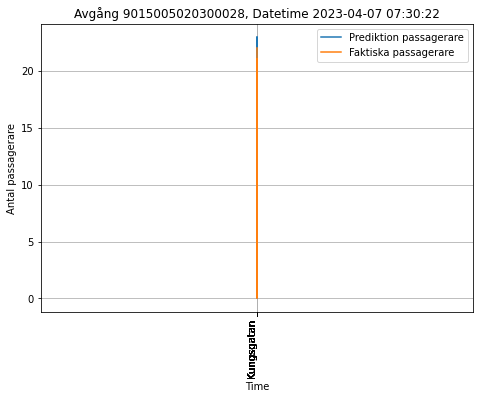

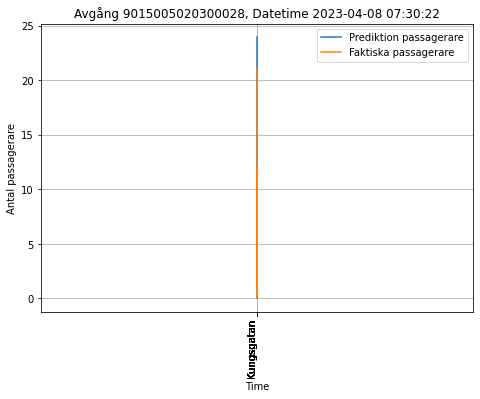

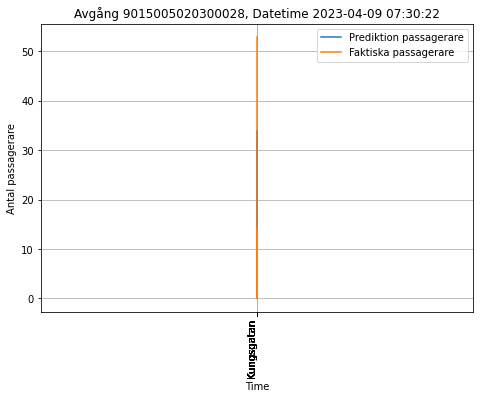

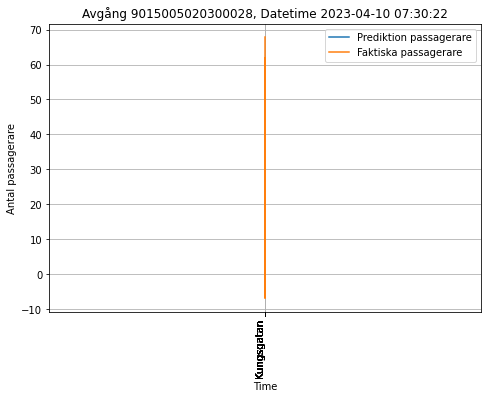

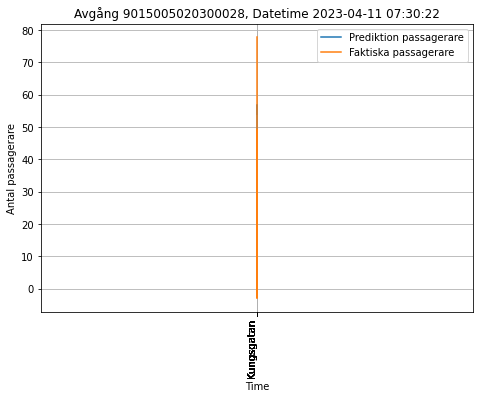

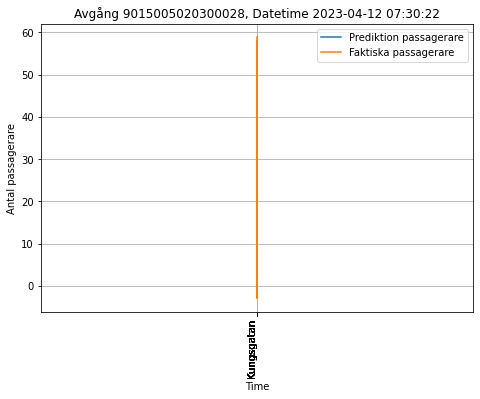

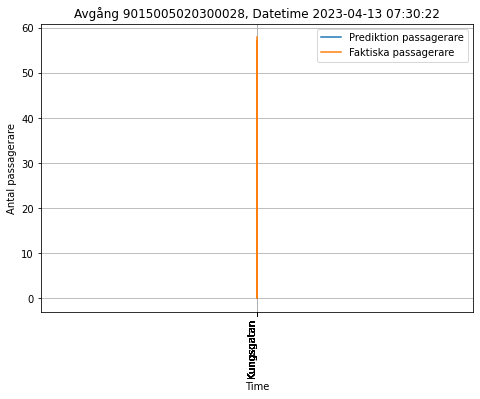

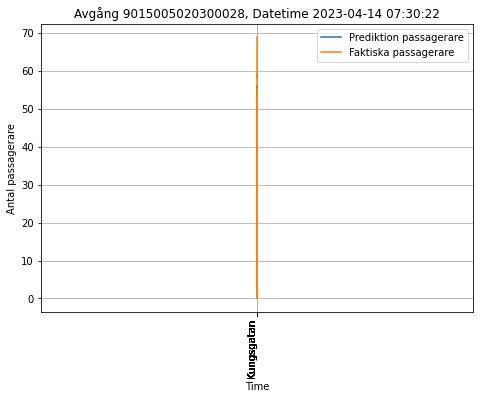

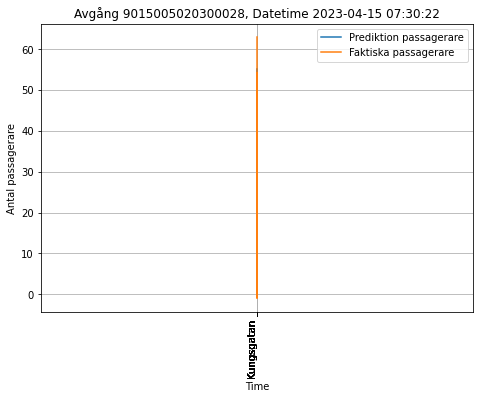

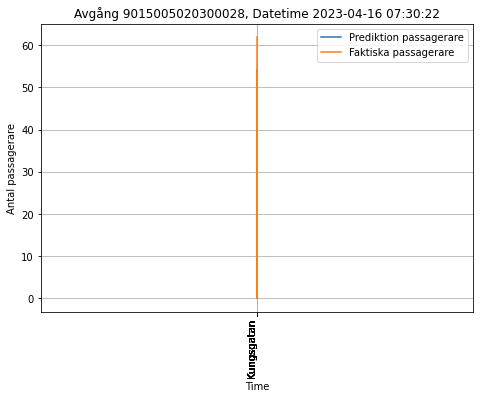

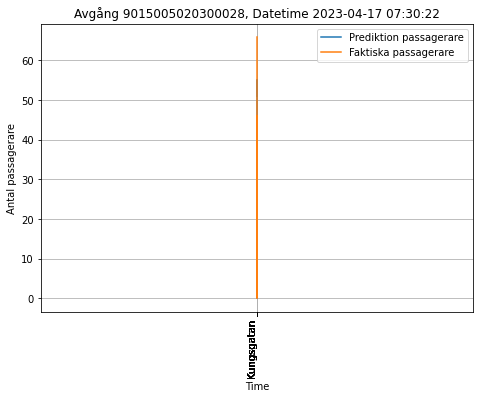

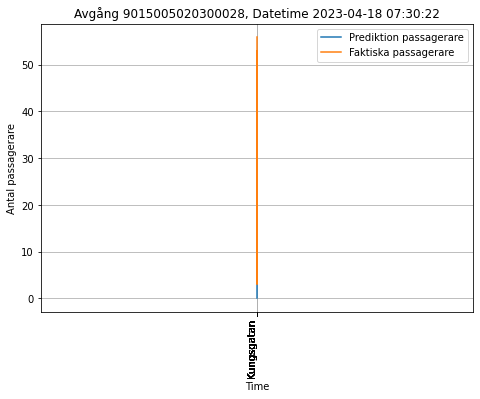

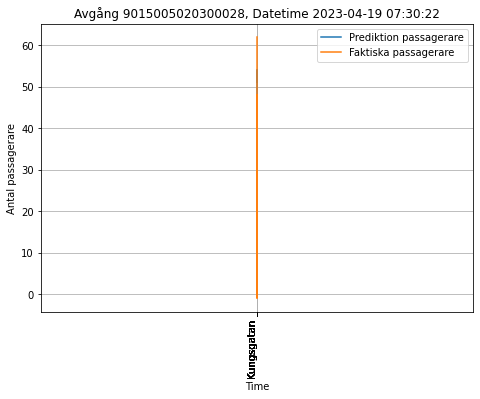

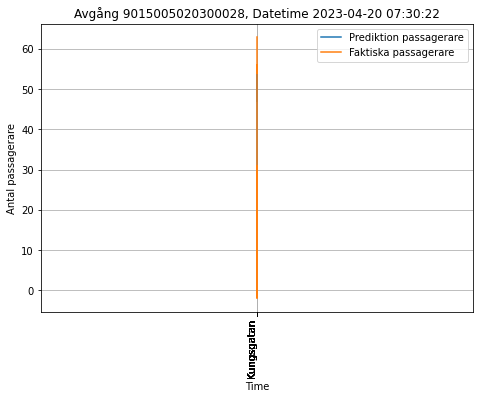

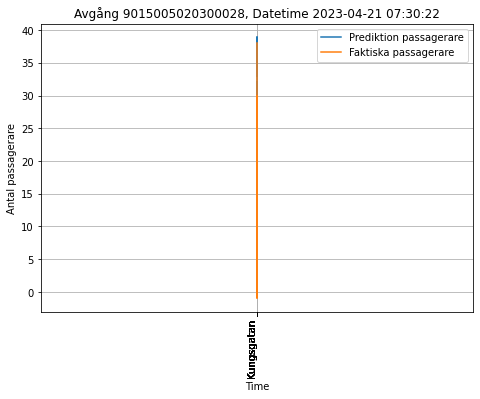

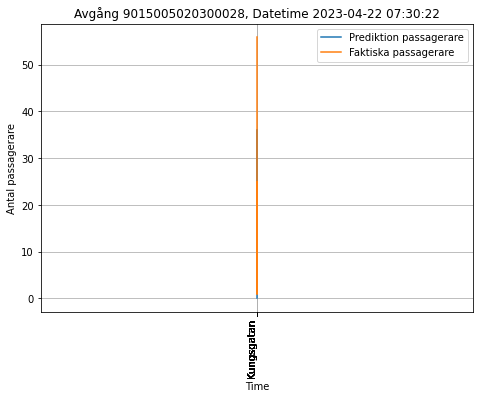

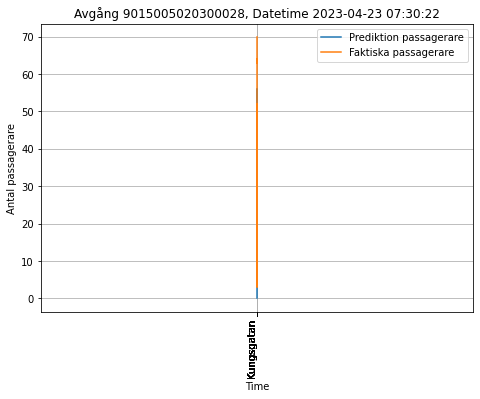

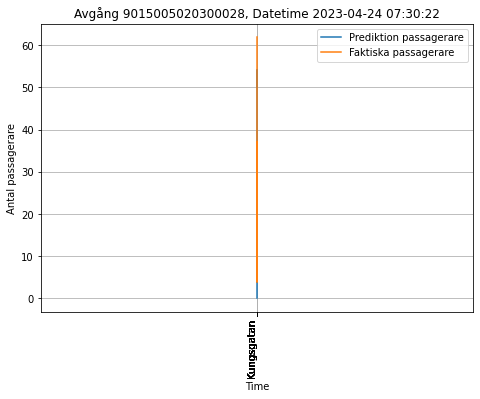

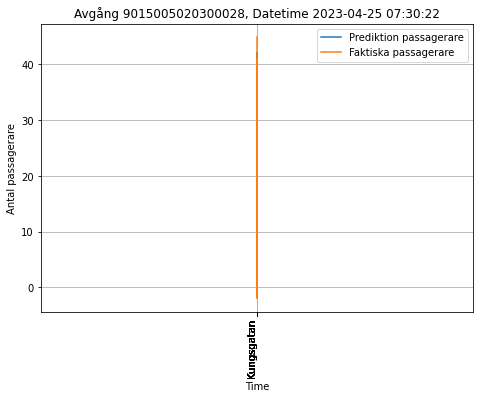

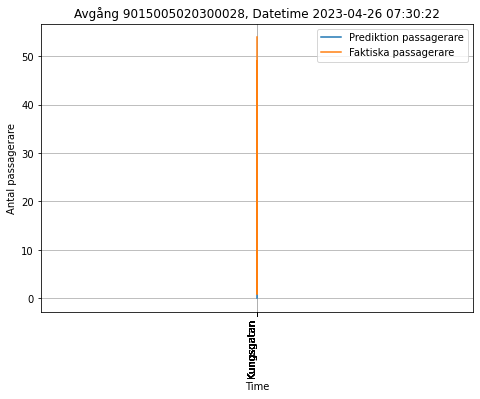

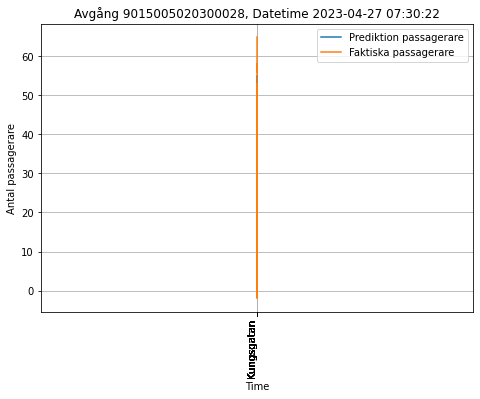

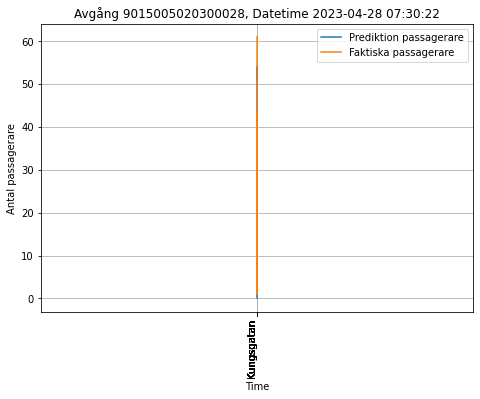

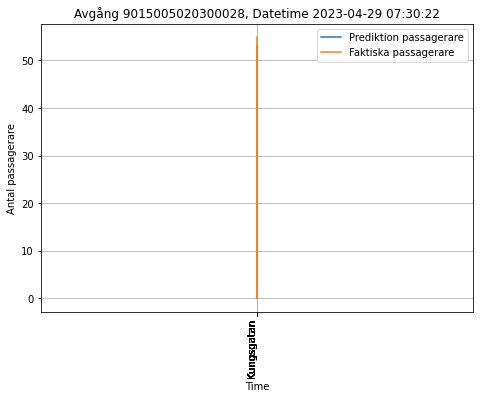

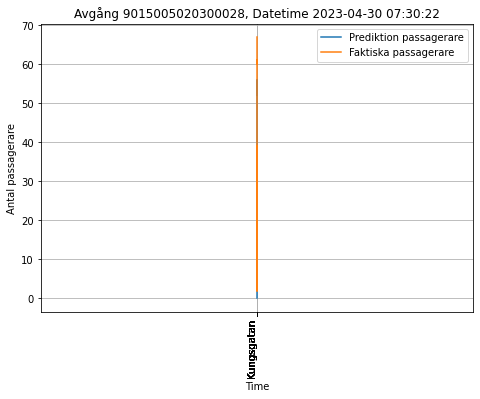

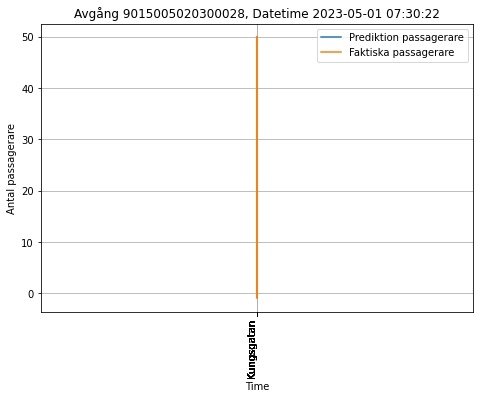

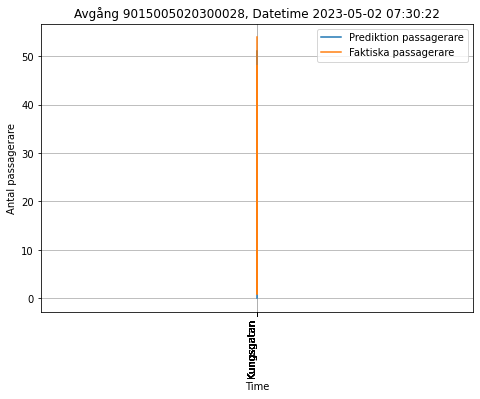

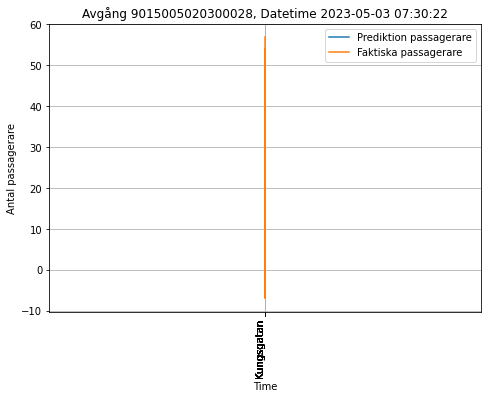

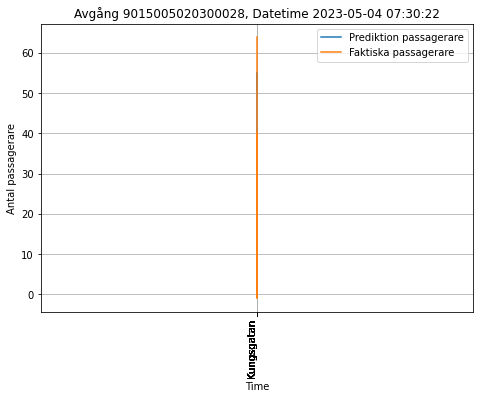

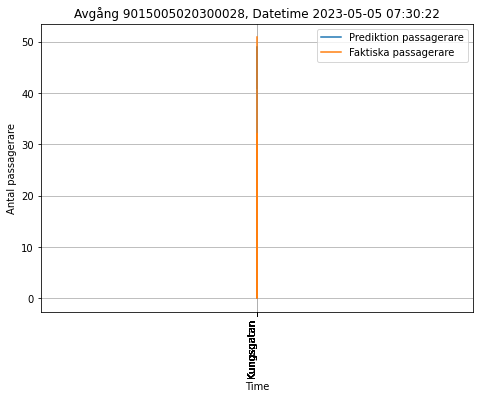

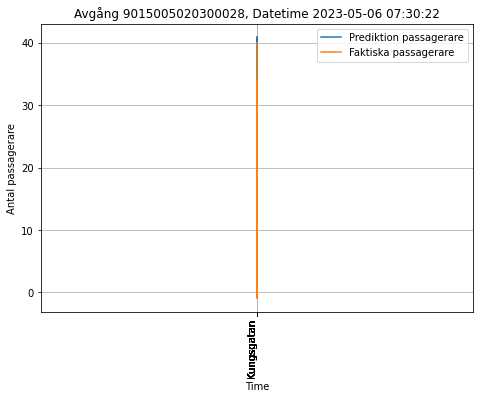

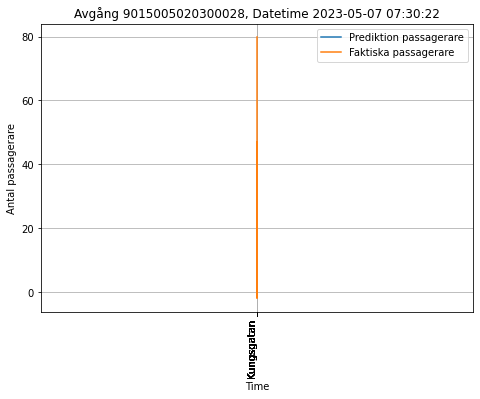

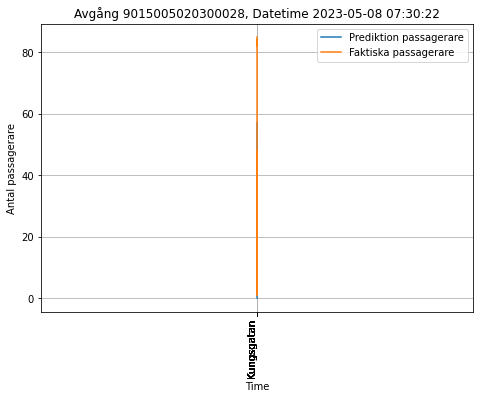

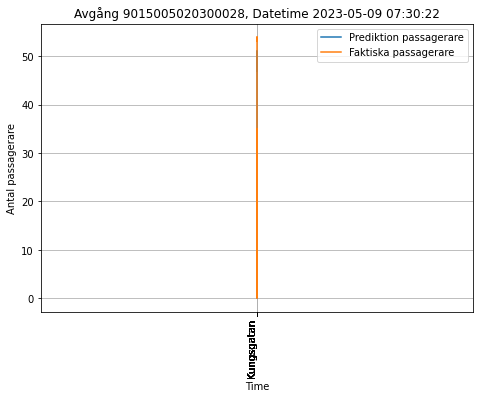

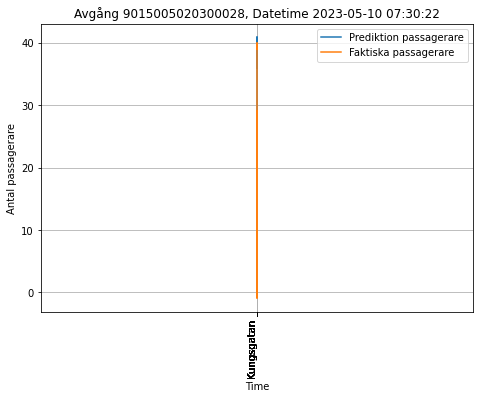

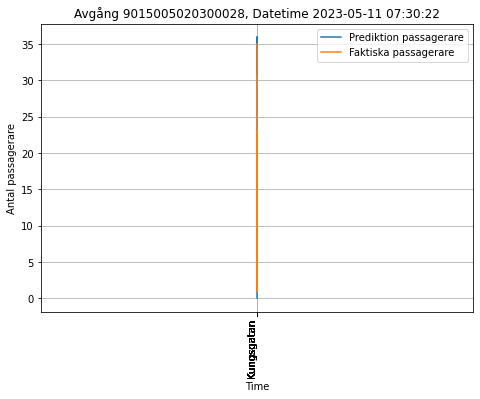

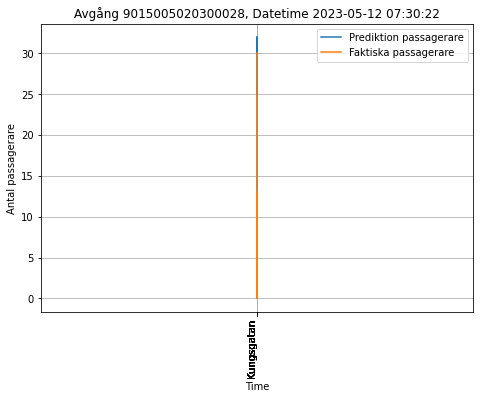

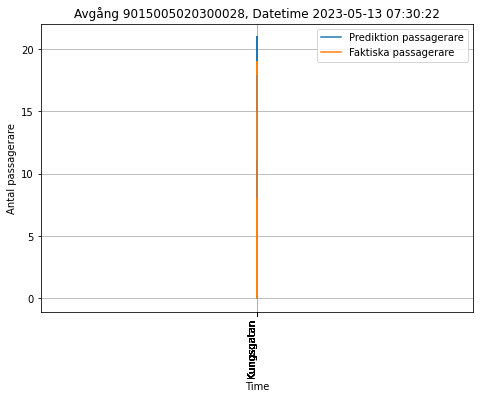

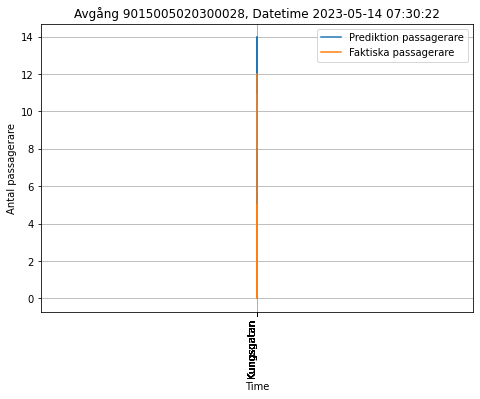

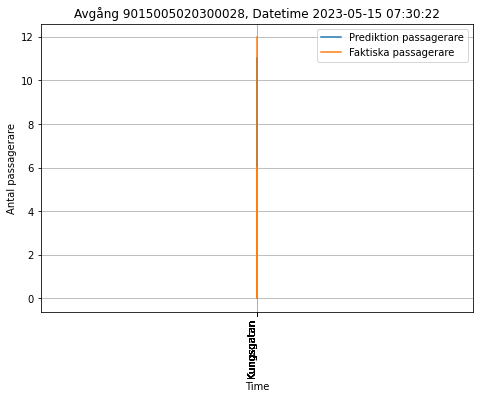

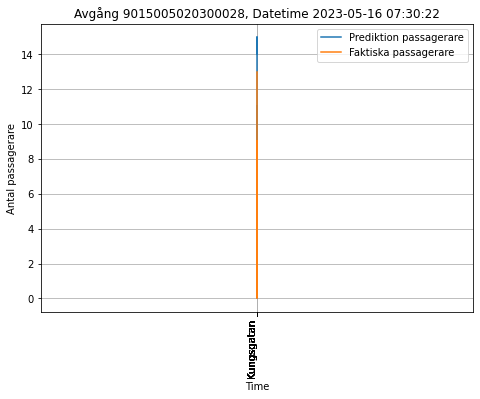

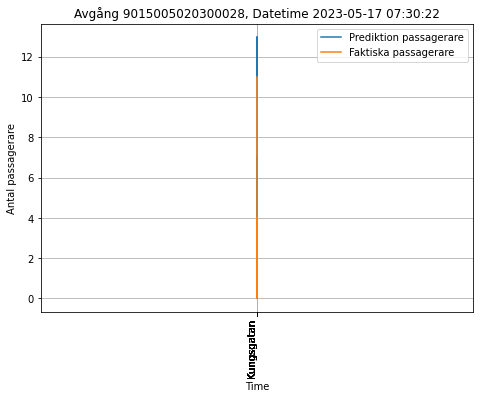

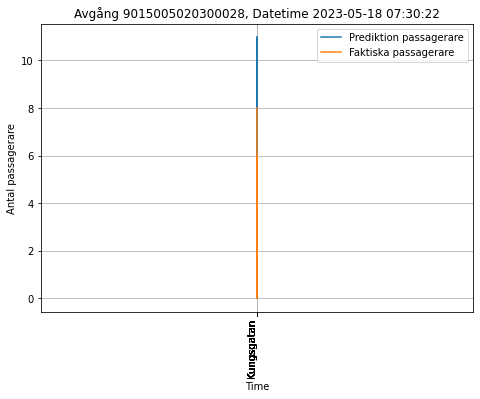

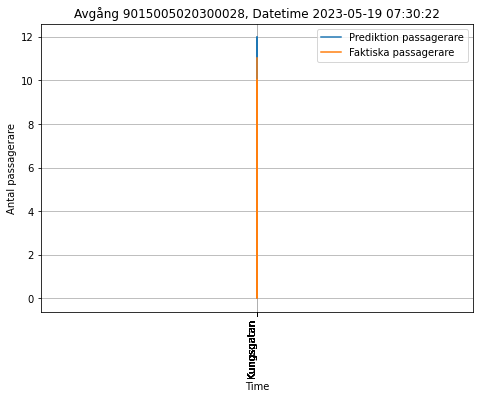

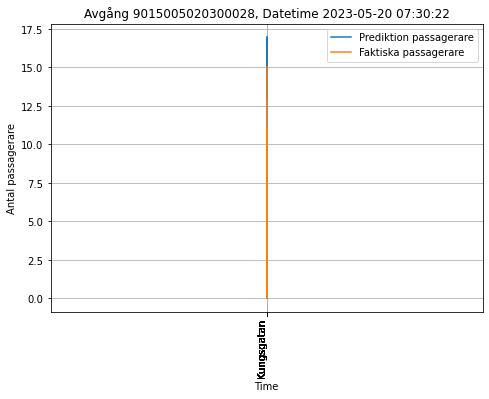

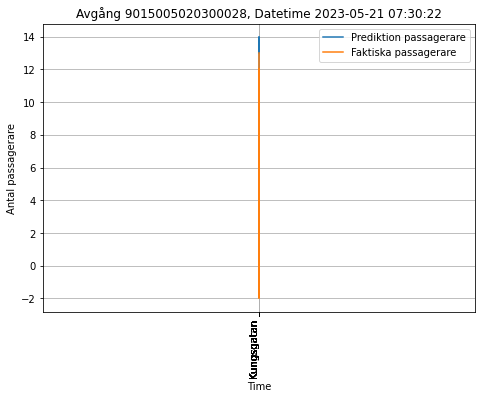

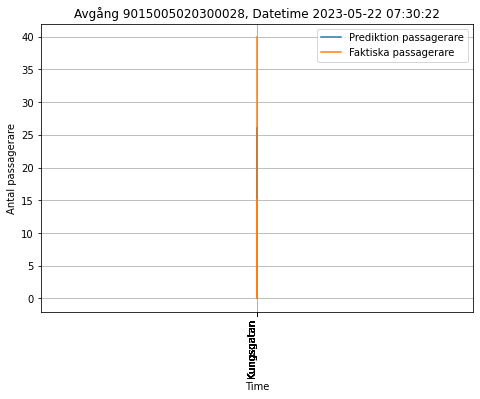

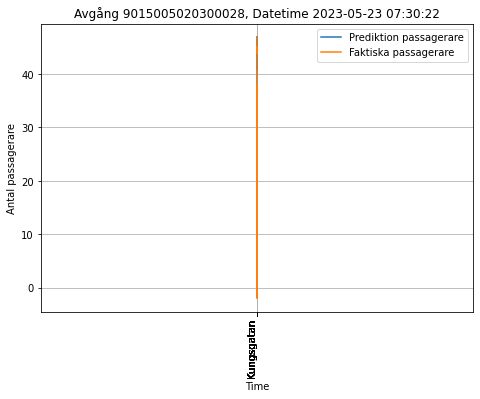

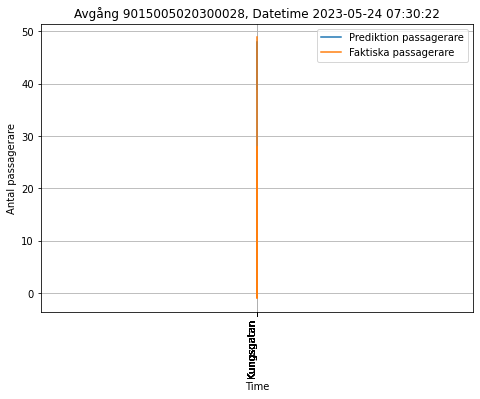

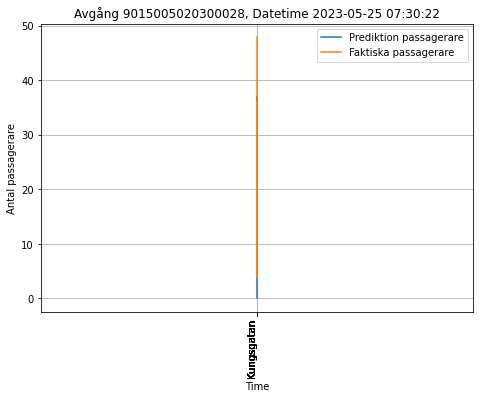

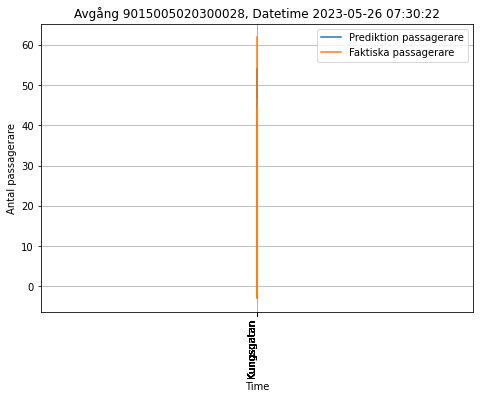

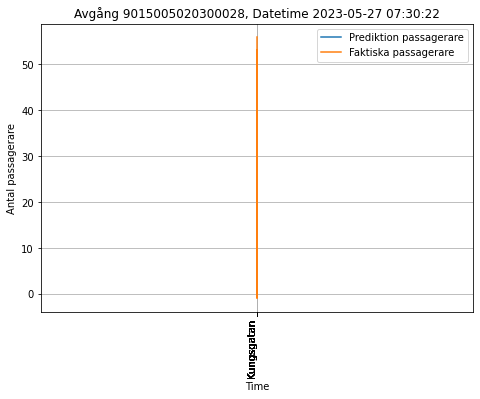

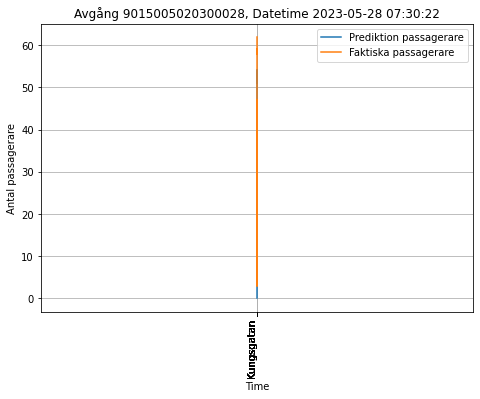

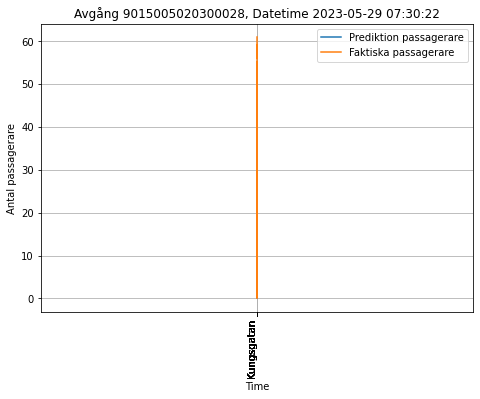

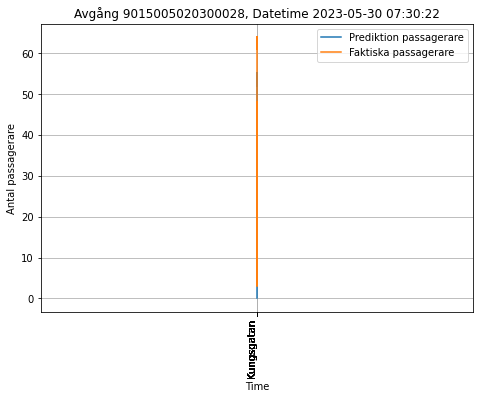

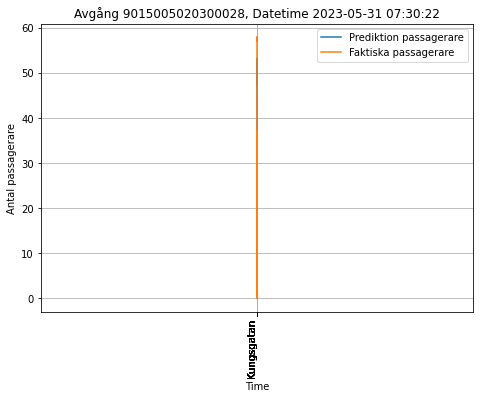

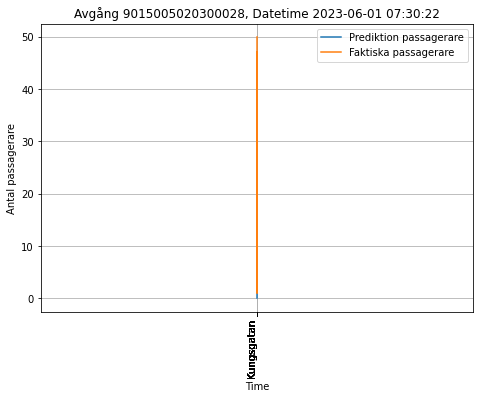

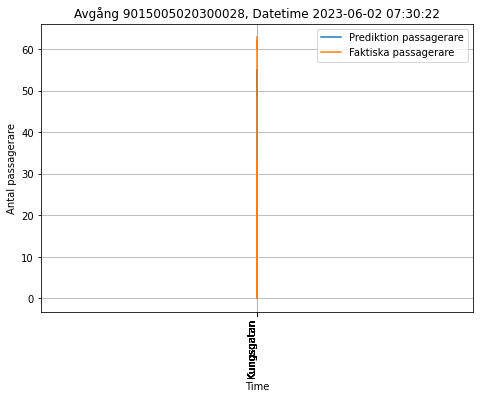

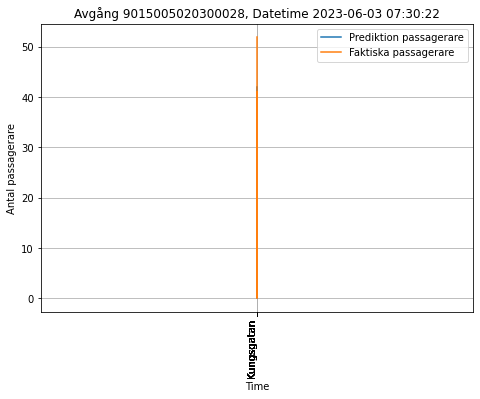

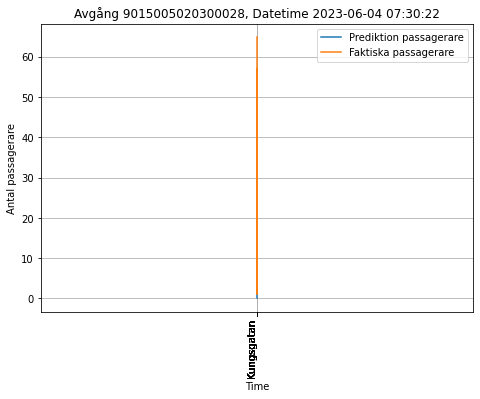

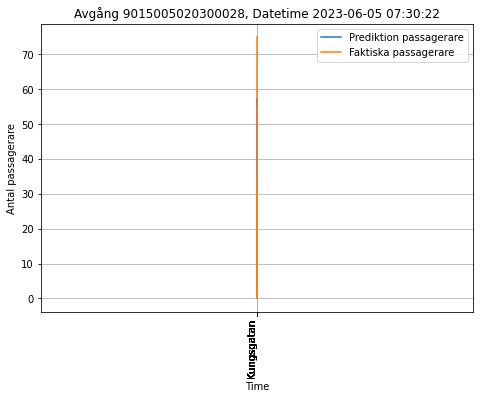

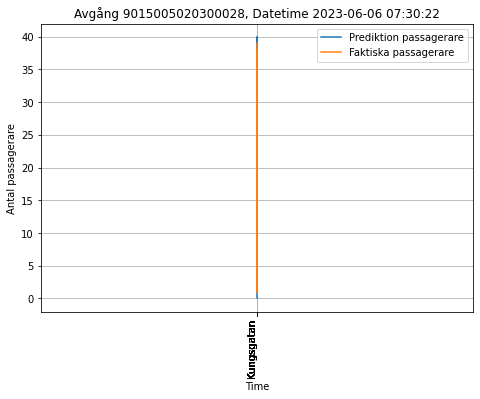

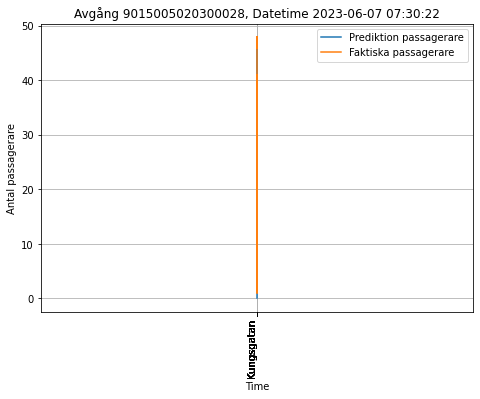

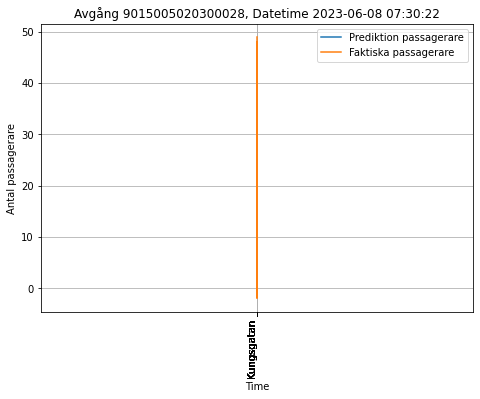

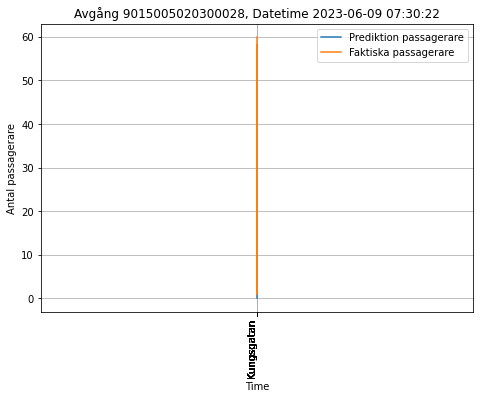

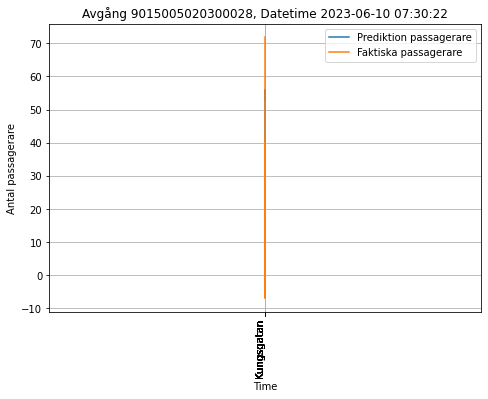

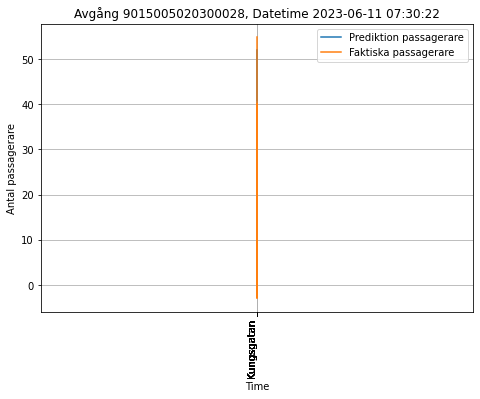

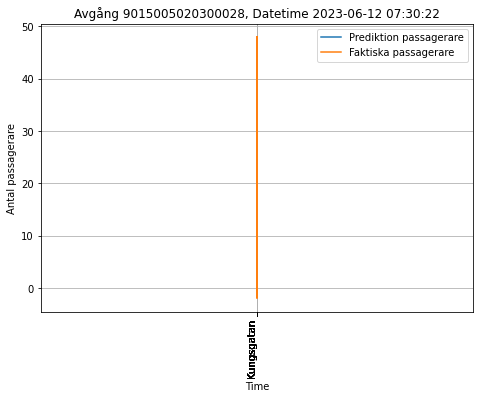

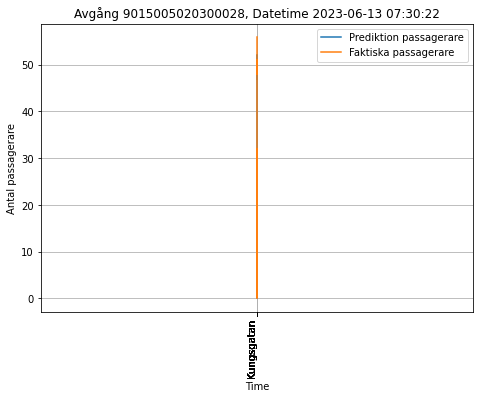

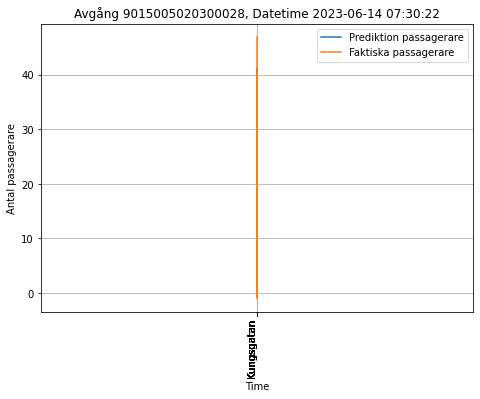

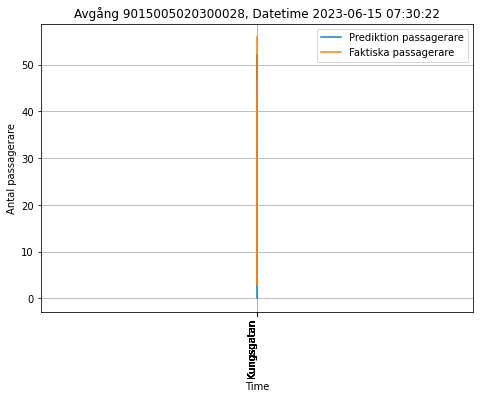

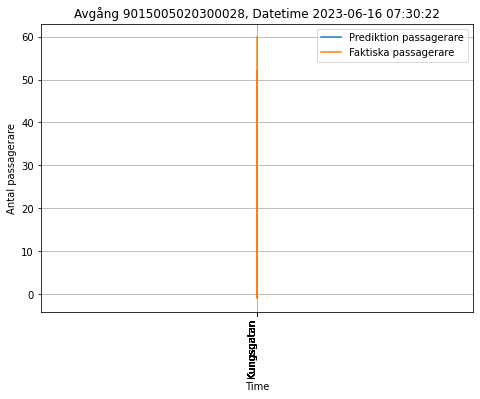

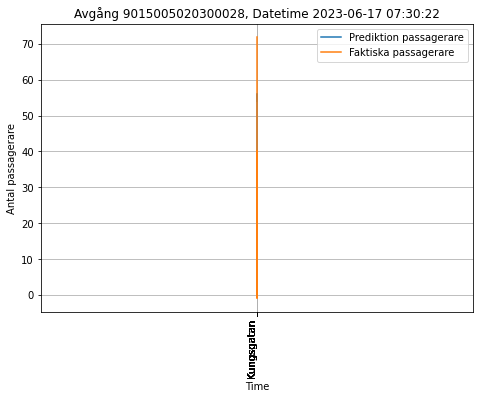

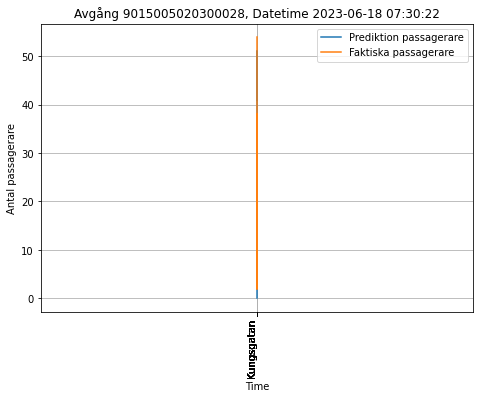

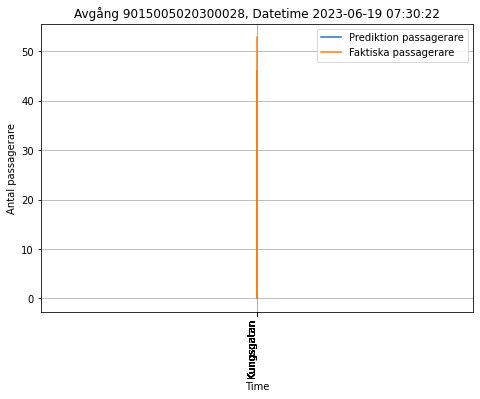

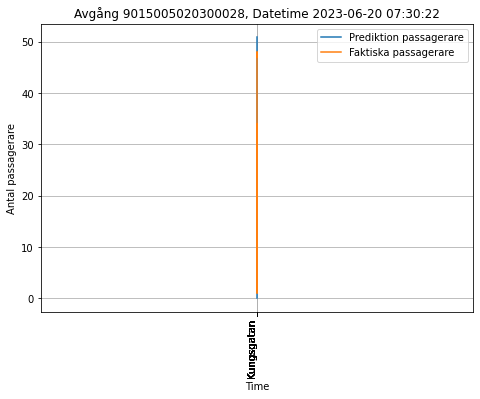

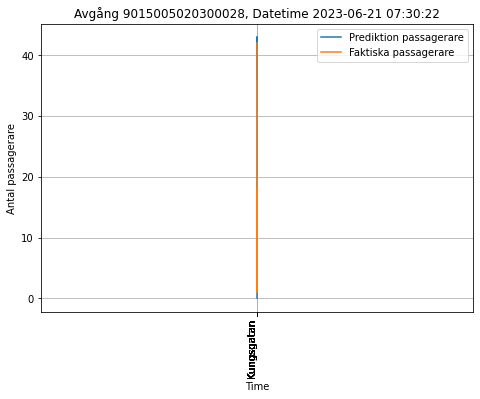

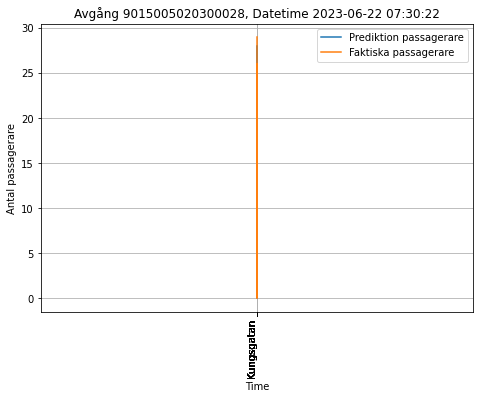

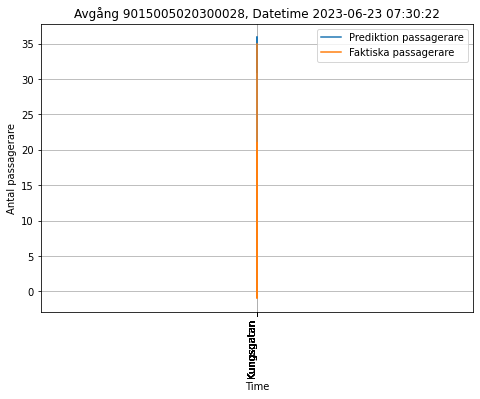

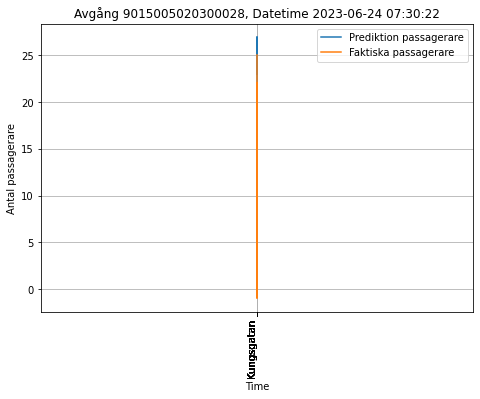

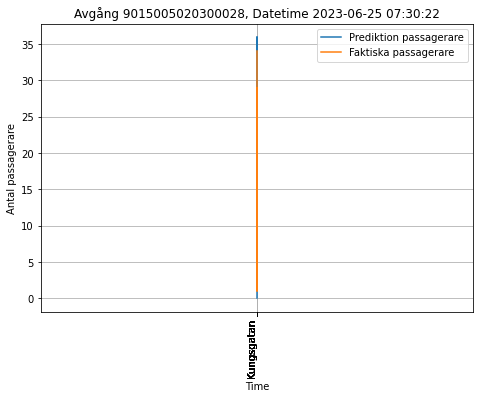

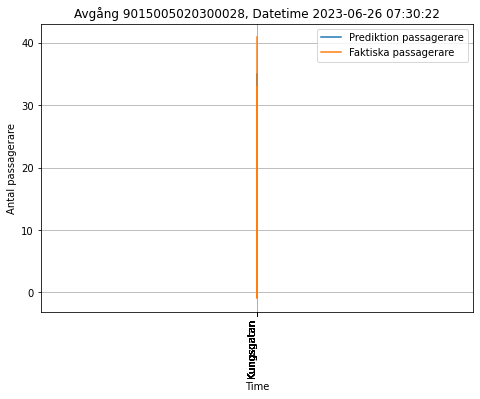

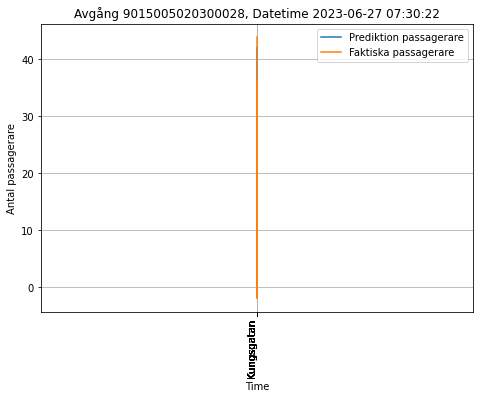

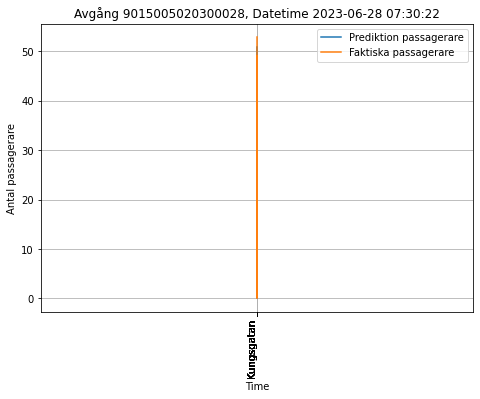

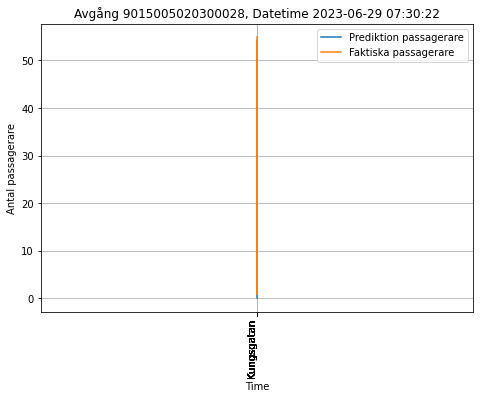

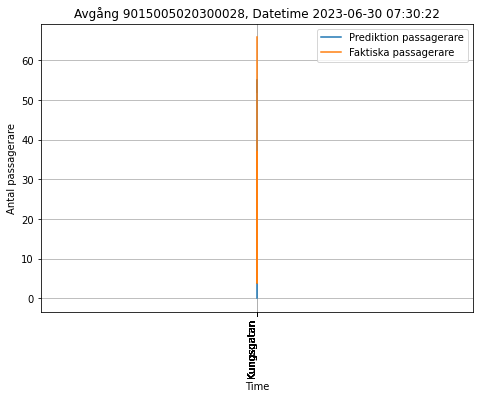

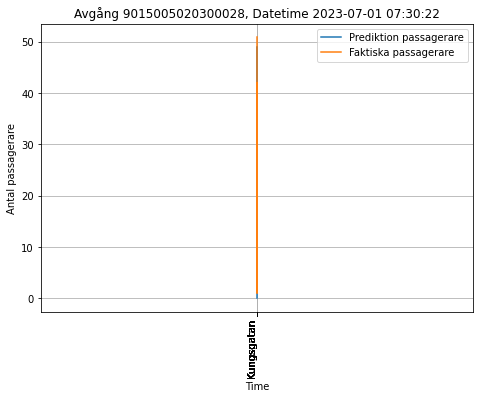

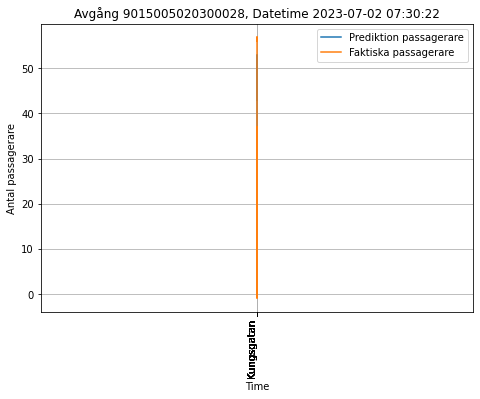

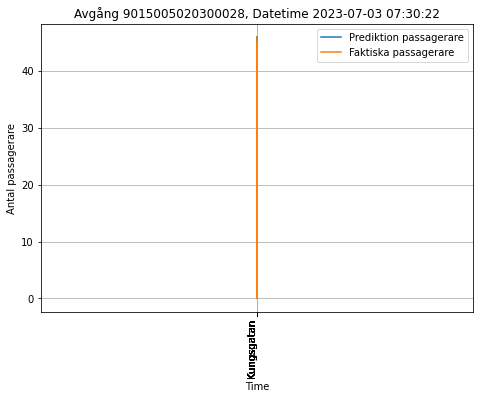

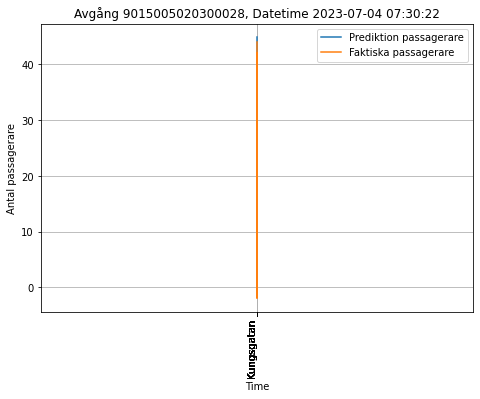

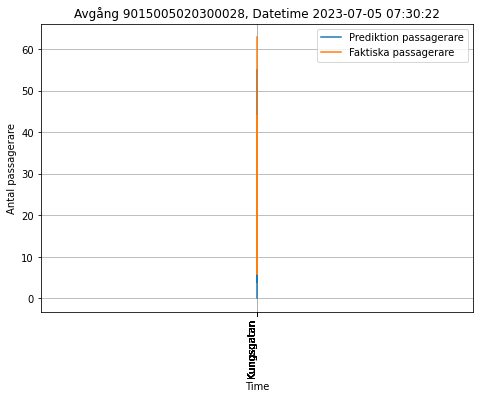

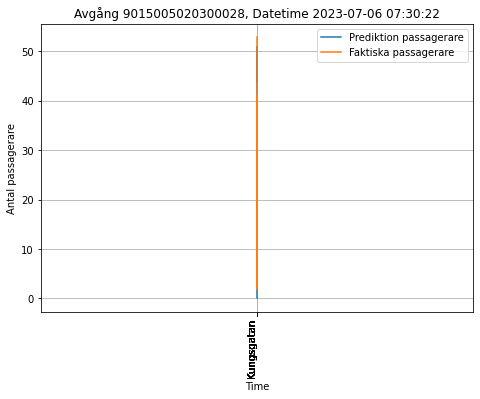

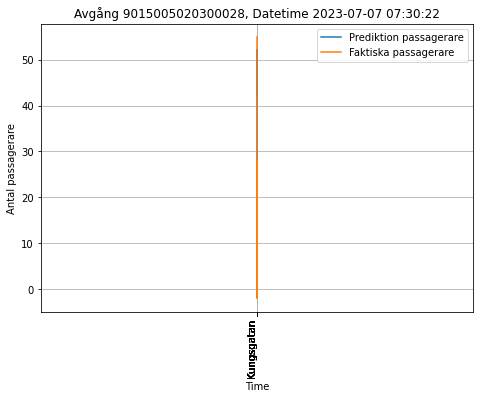

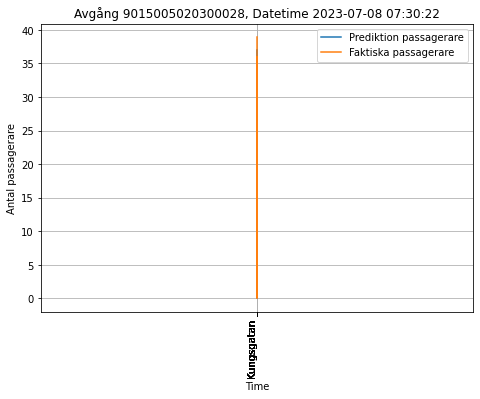

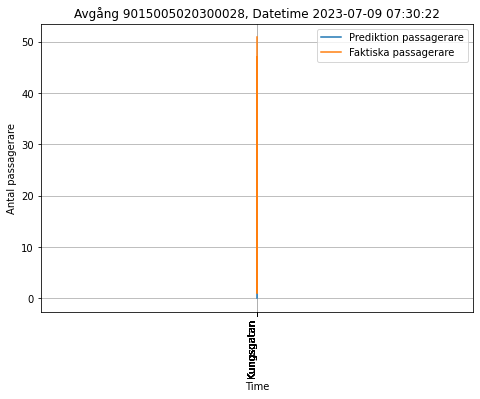

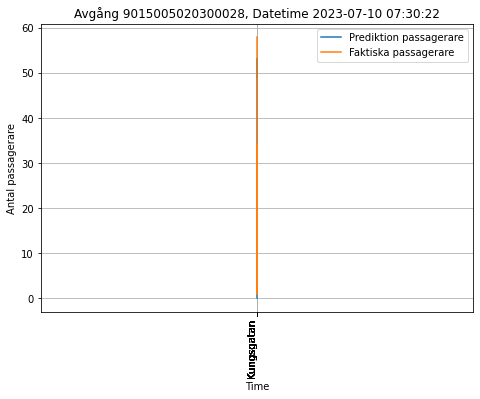

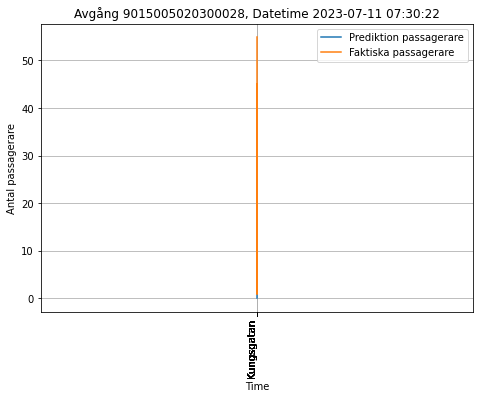

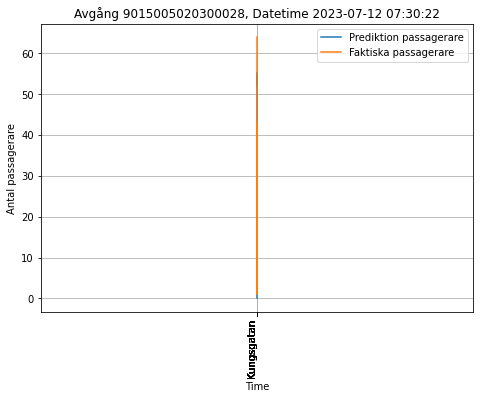

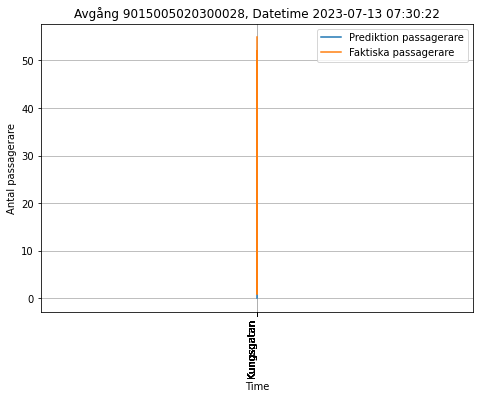

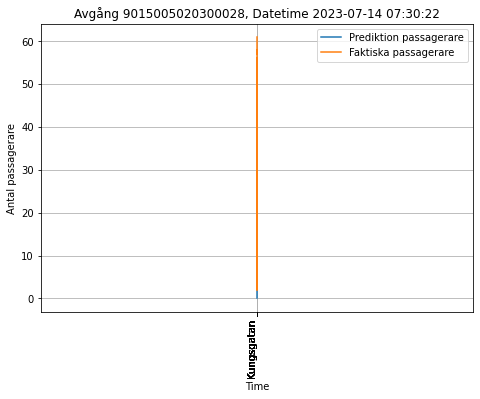

In [81]:
for i in range(0, len(saved_tours)):
    date_time = pd.to_datetime(saved_tours[i]['Tidpunkt'])
    stopname = saved_tours[i]['Hållplatsnamn']
    x_1 = date_time
    y_1 = saved_tours[i]['prediction']
    y_2 = saved_tours[i]['Ombord']
    
    # Visualising the results      
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    fig.autofmt_xdate(rotation=90)
    ax.plot(x_1, y_1)
    ax.plot(x_1, y_2)
    xftm = mdates.DateFormatter('%y-%m-%d %H:%M:%S')
    ax.xaxis.set_major_formatter(xftm)

    ax.grid(True)
    title = 'Avgång ' + str(selected_GID) + ', Datetime ' + saved_tours[i]['Tidpunkt'].iloc[0]
    plt.xlabel('Time')
    plt.ylabel('Antal passagerare')
    plt.title(title)
    plt.xticks(x_1, stopname)   
    plt.legend(['Prediktion passagerare', 'Faktiska passagerare'])

In [82]:
date_time = pd.to_datetime(total_dataset['Tidpunkt'])

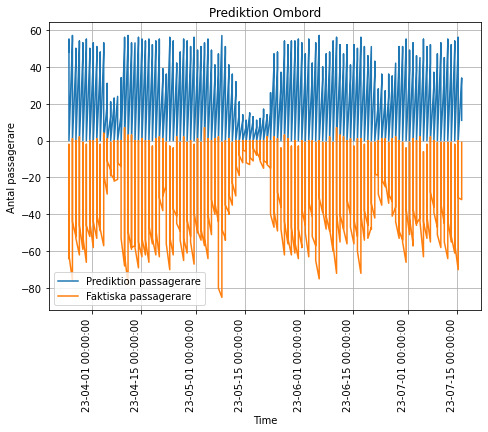

In [83]:
# Visualising the results      
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.autofmt_xdate(rotation=90)
ax.plot(date_time, total_dataset['prediction'])
ax.plot(date_time, -1*total_dataset['Ombord'])
xftm = mdates.DateFormatter('%y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xftm)

ax.grid(True)

plt.title('Prediktion Ombord')
plt.xlabel('Time')
plt.ylabel('Antal passagerare')
plt.legend(['Prediktion passagerare', 'Faktiska passagerare'])

In [84]:
tour_selection_1

SequenceInJourney  Linje        JourneyGID Avg.tid  \
53151                  1    203  9015005020300028   07:30   
53152                  2    203  9015005020300028   07:30   
53153                  3    203  9015005020300028   07:30   
53154                  4    203  9015005020300028   07:30   
53155                  5    203  9015005020300028   07:30   
53156                  6    203  9015005020300028   07:30   
53157                  7    203  9015005020300028   07:30   
53158                  8    203  9015005020300028   07:30   
53159                  9    203  9015005020300028   07:30   
53160                 10    203  9015005020300028   07:30   
53161                 11    203  9015005020300028   07:30   
53162                 12    203  9015005020300028   07:30   
53163                 13    203  9015005020300028   07:30   
53164                 14    203  9015005020300028   07:30   

                  Tidpunkt            Hållplatsnamn  prediction  Ombord  error  
53151  2023-03-25 07:30:22  Rydsvägens ändhållplats        48.0    64.0   16.0  
53152  2023-03-25 07:30:22         Björnkärrsskolan        55.0    50.0    5.0  
53153  2023-03-25 07:30:22           Alsättersgatan        49.0    49.0    0.0  
53154  2023-03-25 07:30:22                 Hangaren        48.0    51.0    3.0  
53155  2023-03-25 07:30:22           Mårdtorpsgatan        49.0    37.0   12.0  
53156  2023-03-25 07:30:22              Ryd centrum        38.0    22.0   16.0  
53157  2023-03-25 07:30:22                  Solhaga        24.0    18.0    6.0  
53158  2023-03-25 07:30:22          Gamla Linköping        20.0     2.0   18.0  
53159  2023-03-25 07:30:22                Vallaplan         4.0     7.0    3.0  
53160  2023-03-25 07:30:22                Parkgatan        10.0    21.0   11.0  
53161  2023-03-25 07:30:22            Barnhemsgatan        23.0    26.0    3.0  
53162  2023-03-25 07:30:22             Stora Torget        28.0    33.0    5.0  
53163  2023-03-25 07:30:22          Trädgårdstorget        35.0    42.0    7.0  
53164  2023-03-25 07:30:22               Kungsgatan         0.0    62.0   62.0

In [85]:
date_time = pd.to_datetime(tour_selection_1['Tidpunkt'])
stopname = tour_selection_1['Hållplatsnamn']
stopname

53151    Rydsvägens ändhållplats
53152           Björnkärrsskolan
53153             Alsättersgatan
53154                   Hangaren
53155             Mårdtorpsgatan
53156                Ryd centrum
53157                    Solhaga
53158            Gamla Linköping
53159                  Vallaplan
53160                  Parkgatan
53161              Barnhemsgatan
53162               Stora Torget
53163            Trädgårdstorget
53164                 Kungsgatan
Name: Hållplatsnamn, dtype: object

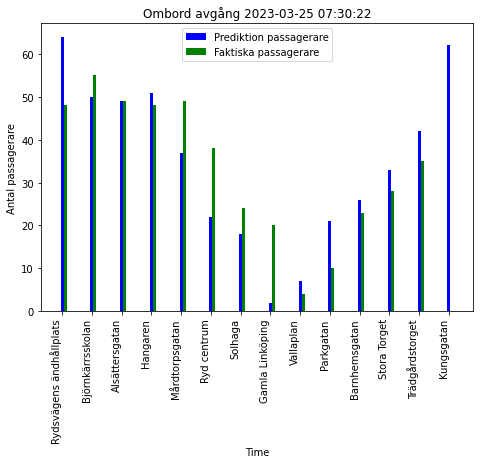

In [86]:
X = np.arange(len(tour_selection_1))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.autofmt_xdate(rotation=90)
ax.bar(X + 0.00, tour_selection_1['Ombord'].values, color = 'b', width = 0.1)
ax.bar(X + 0.10, tour_selection_1['prediction'].values, color = 'g', width = 0.1)

xftm = mdates.DateFormatter('%y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xftm)
title = 'Ombord avgång ' + tour_selection_1['Tidpunkt'].iloc[0]
plt.xlabel('Time')
plt.ylabel('Antal passagerare')
plt.title(title)
plt.xticks(X, stopname)   
plt.legend(['Prediktion passagerare', 'Faktiska passagerare'])

C:\Users\USER88~1\AppData\Local\Temp/ipykernel_32304/2217263092.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


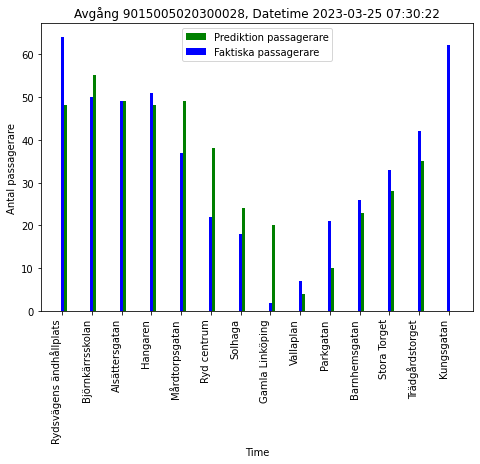

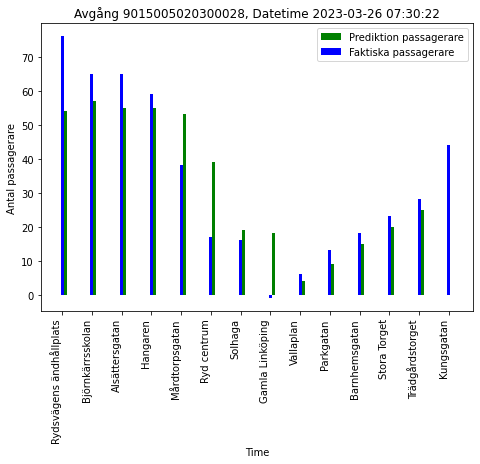

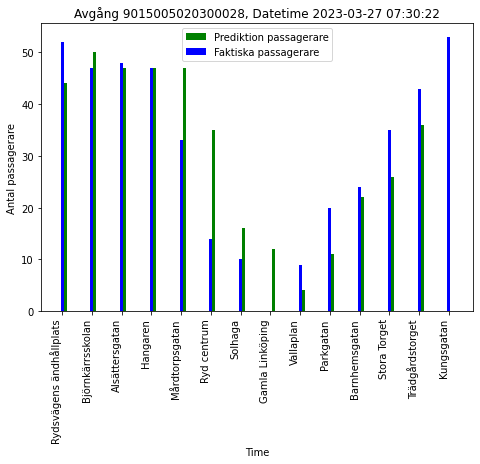

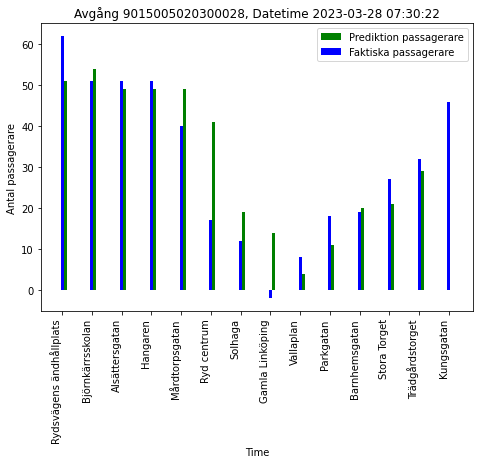

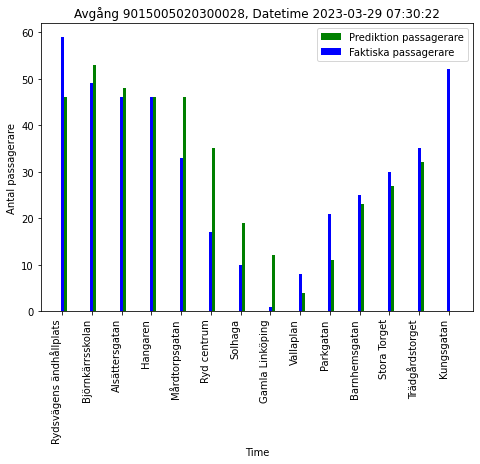

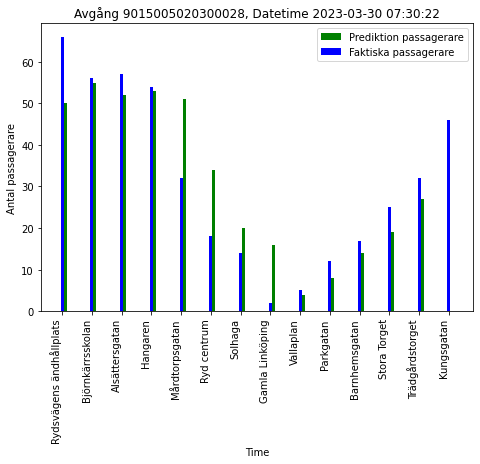

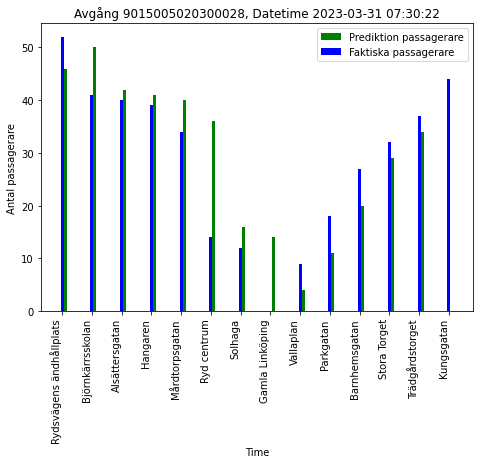

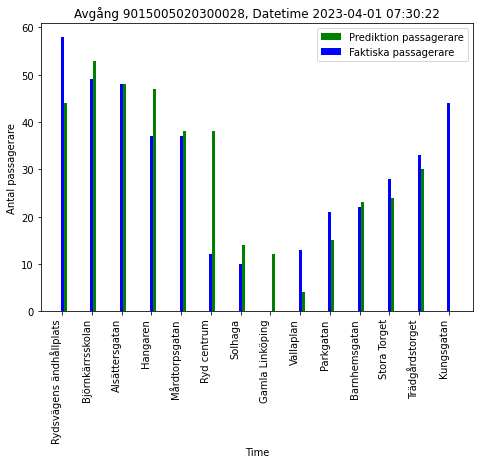

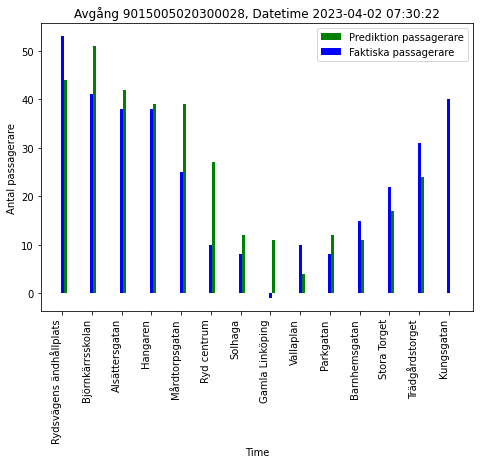

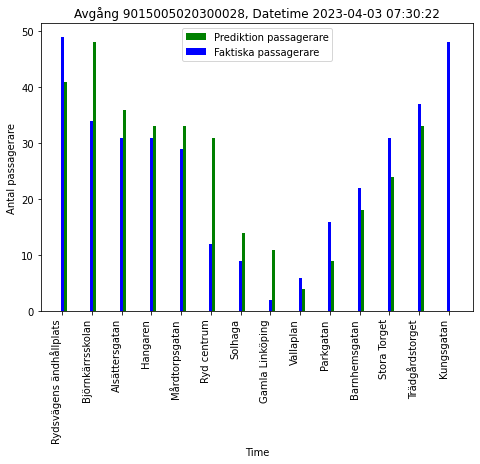

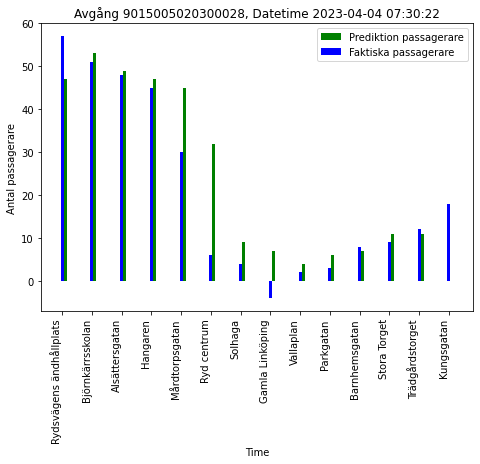

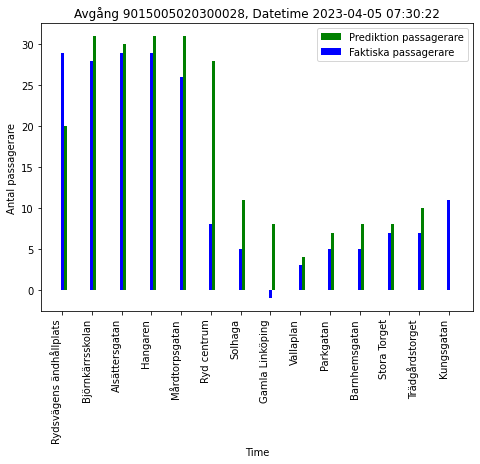

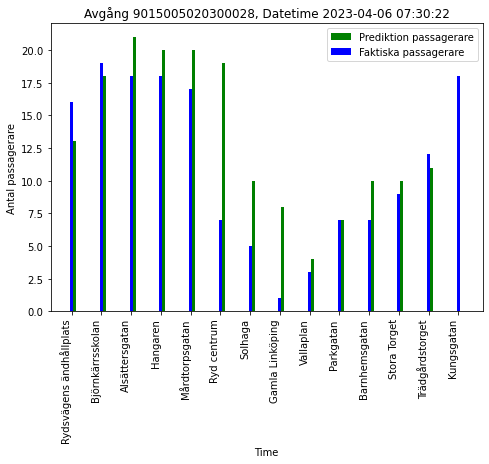

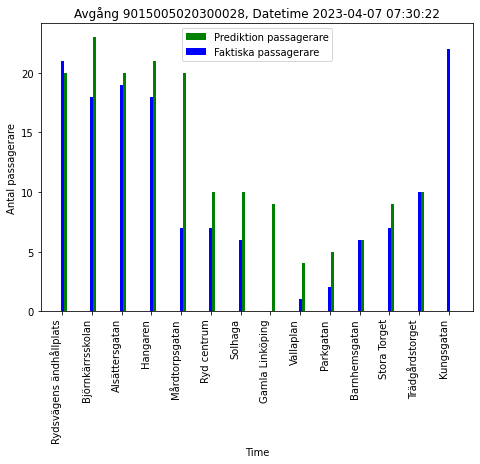

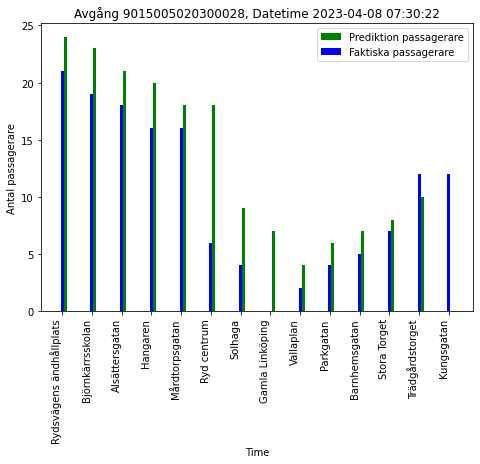

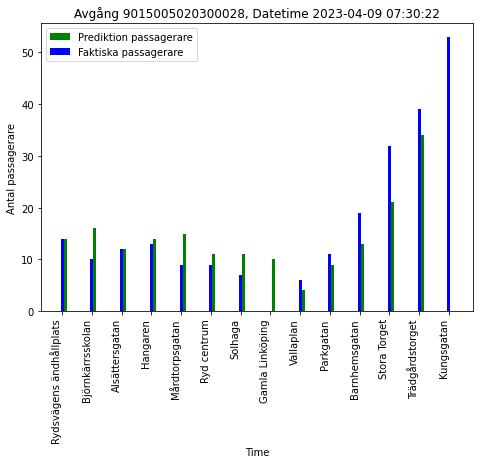

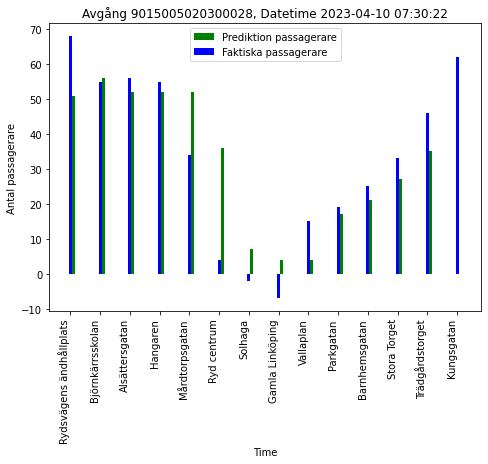

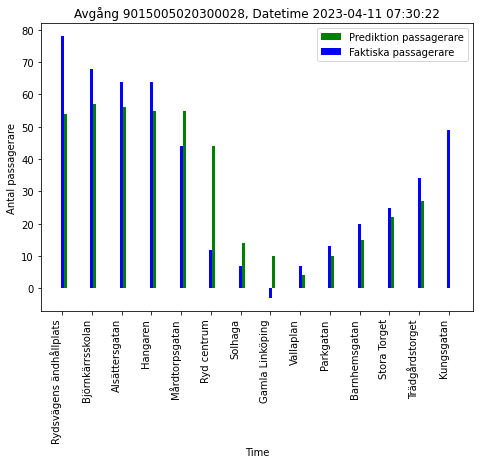

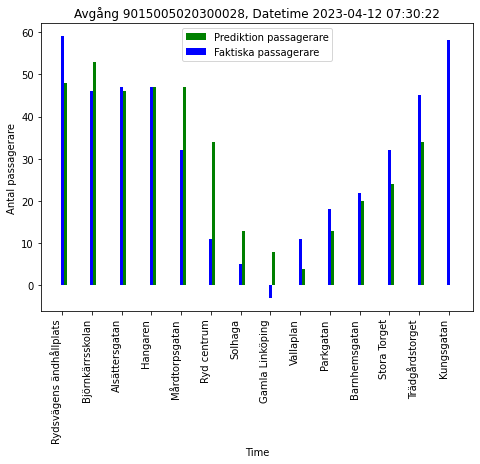

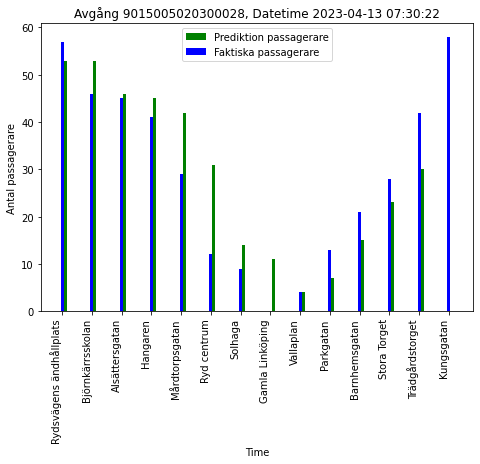

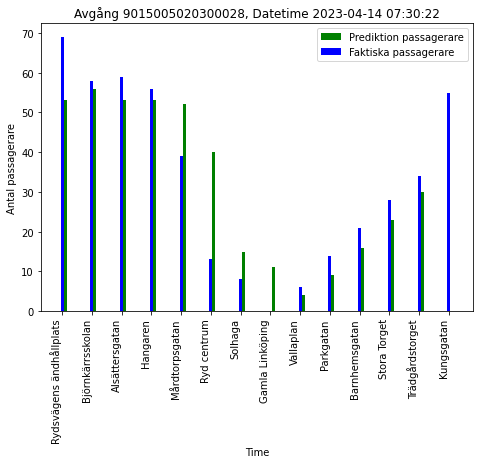

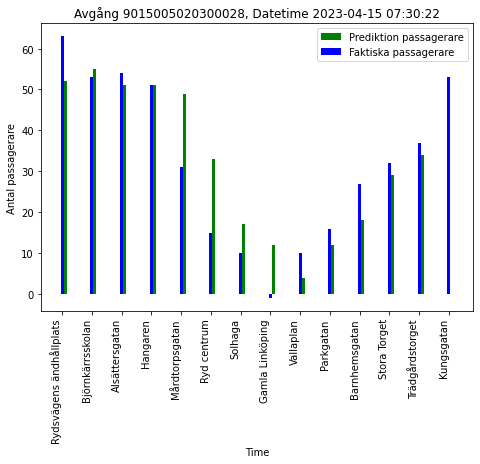

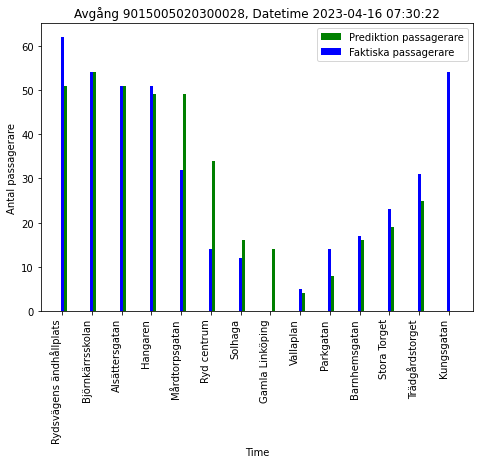

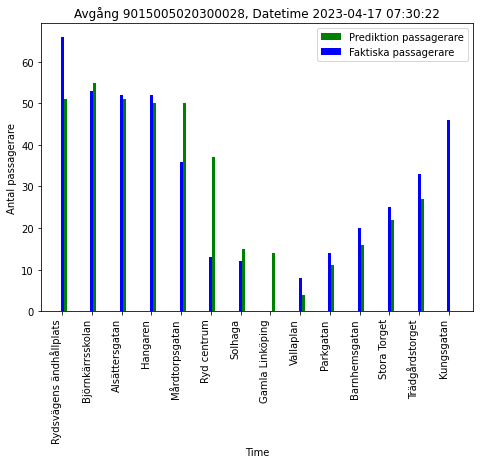

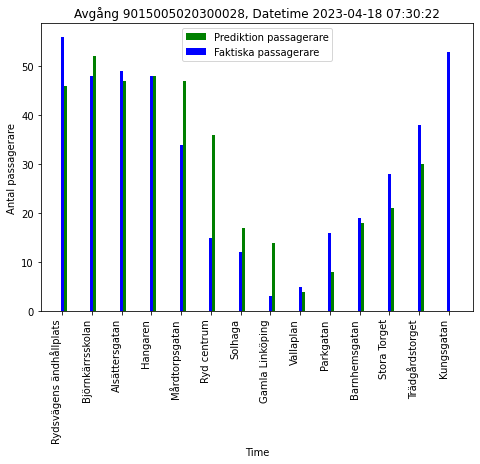

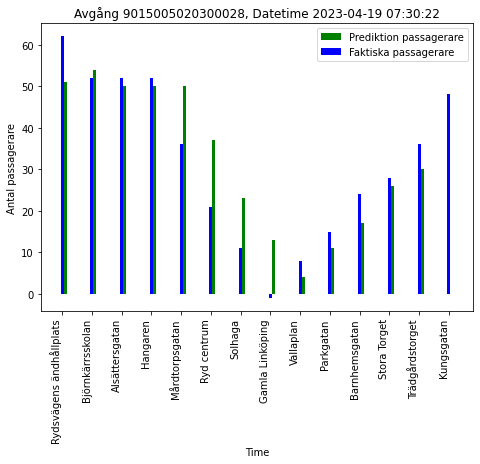

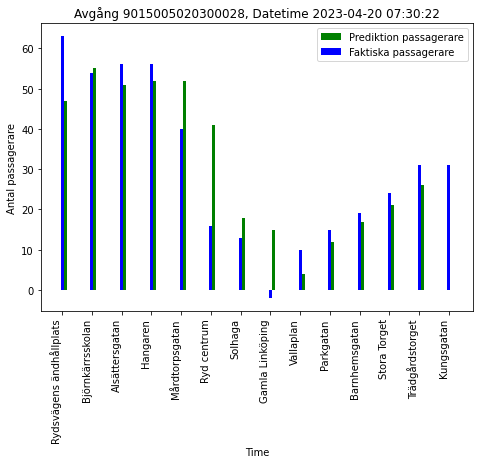

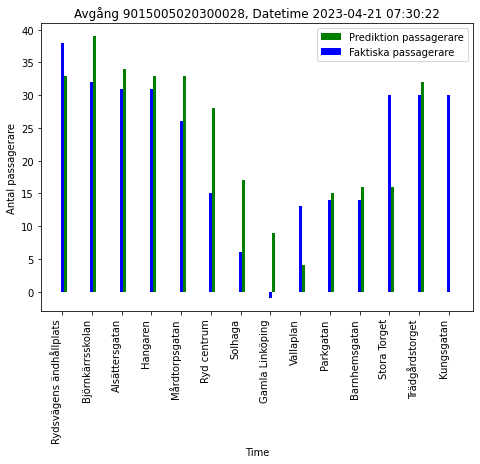

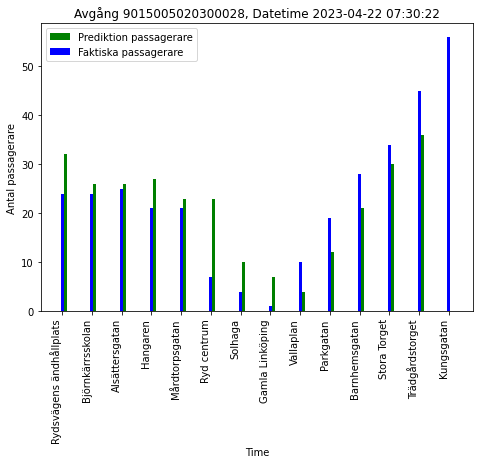

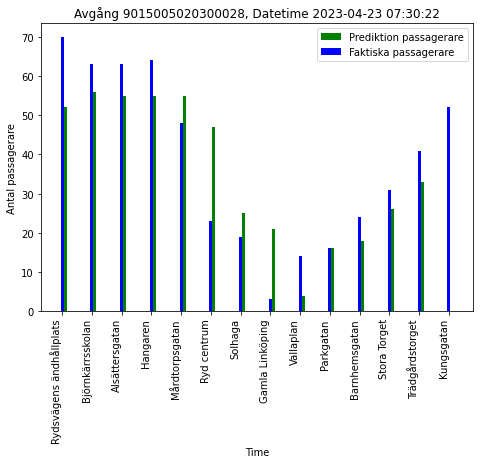

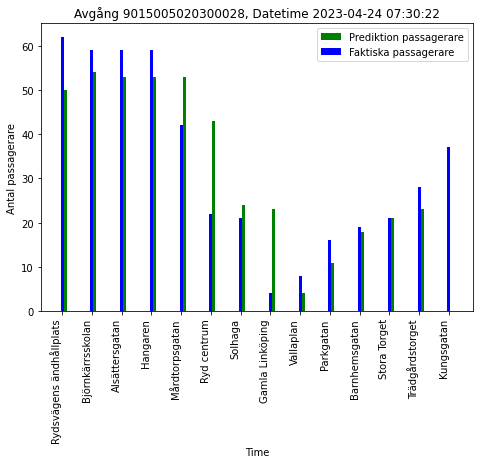

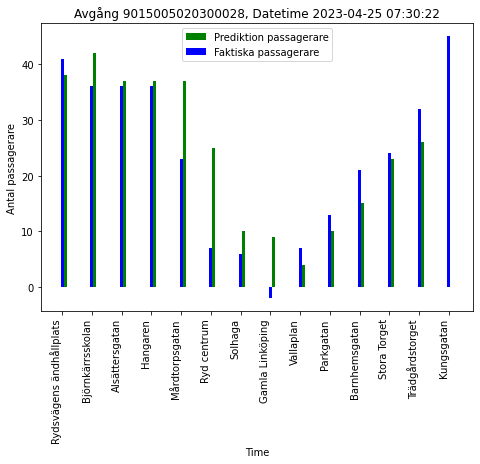

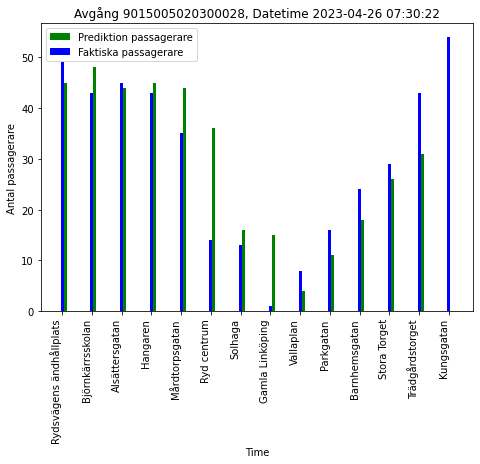

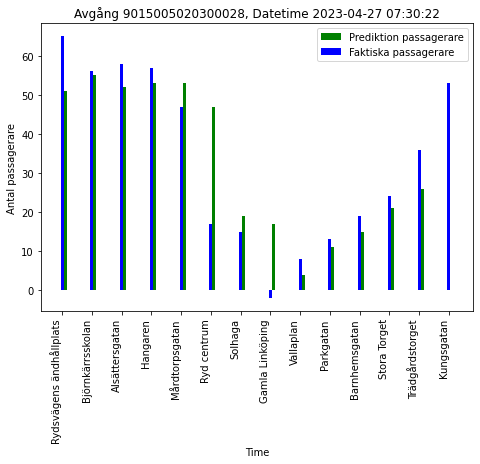

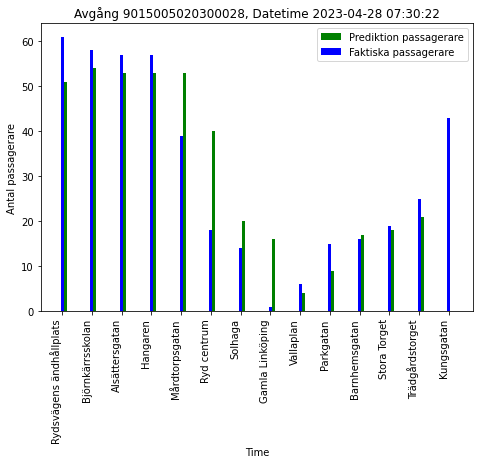

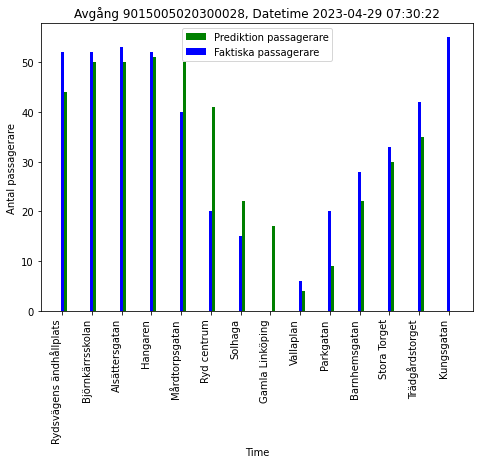

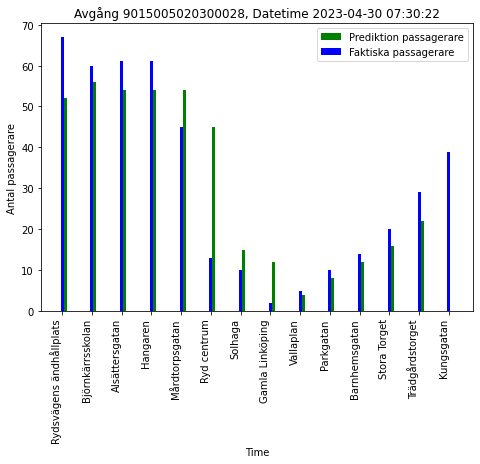

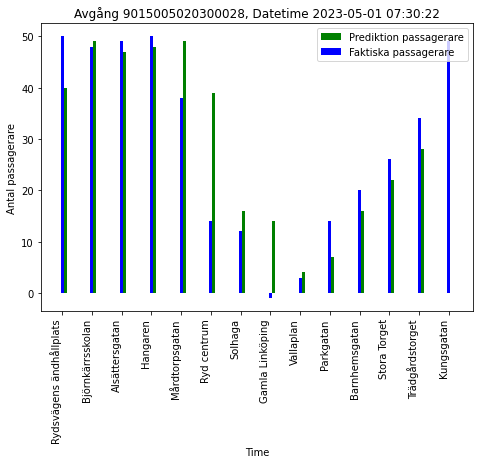

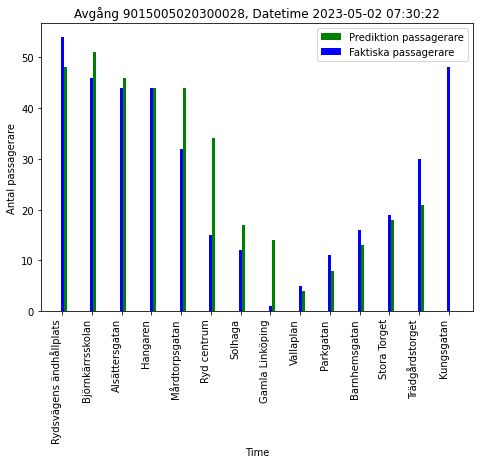

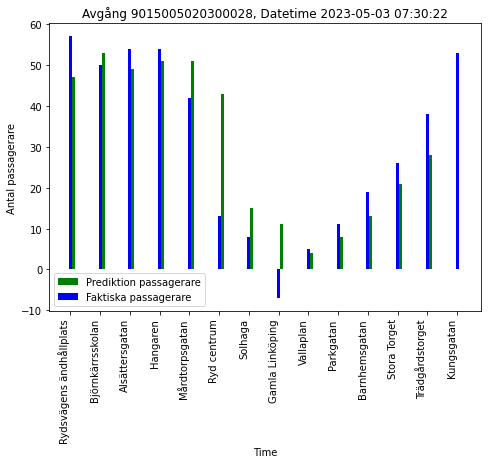

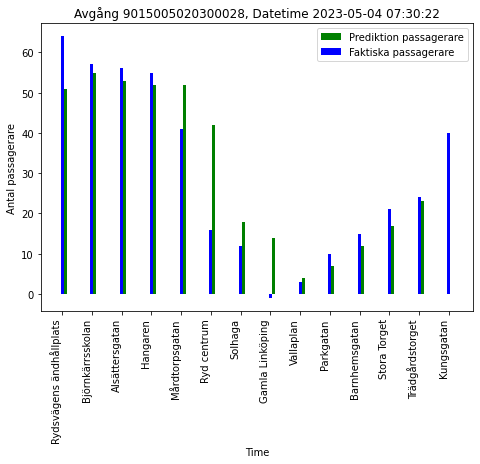

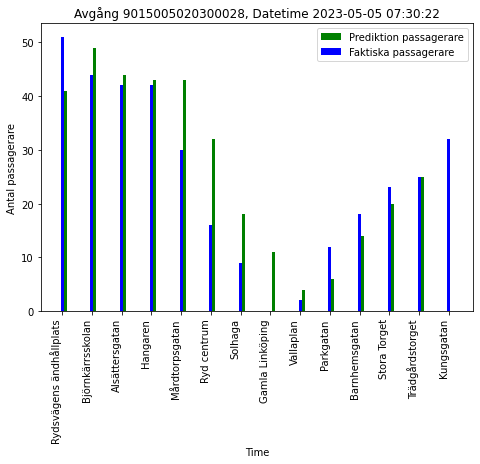

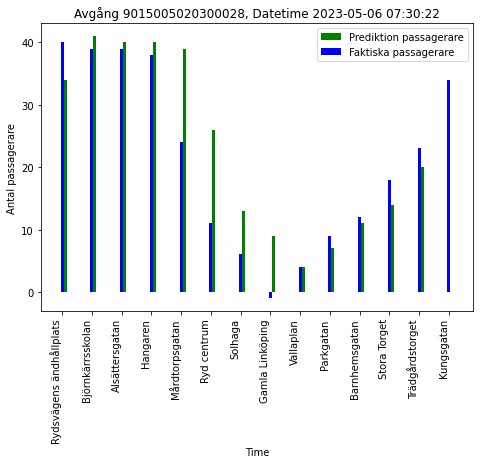

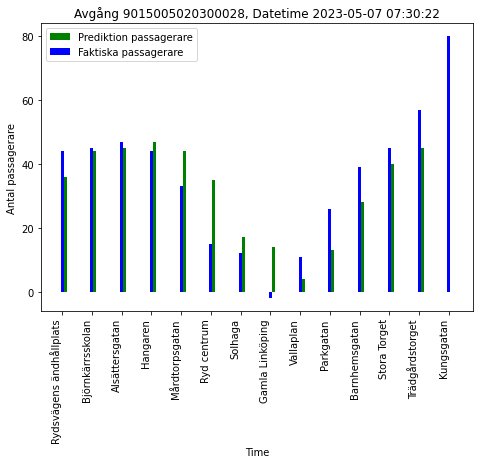

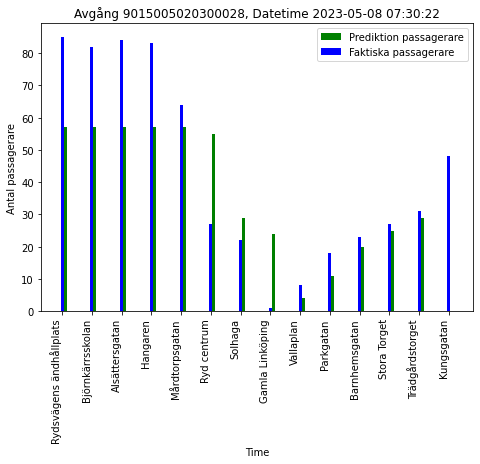

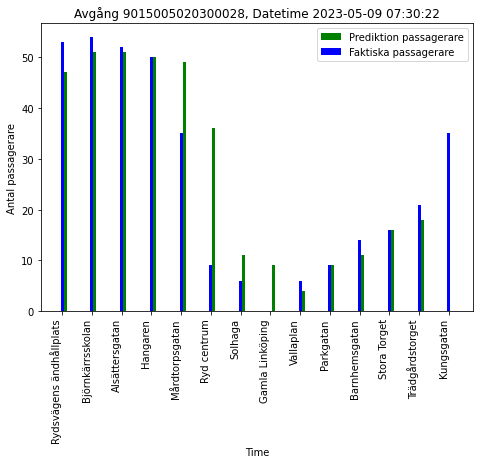

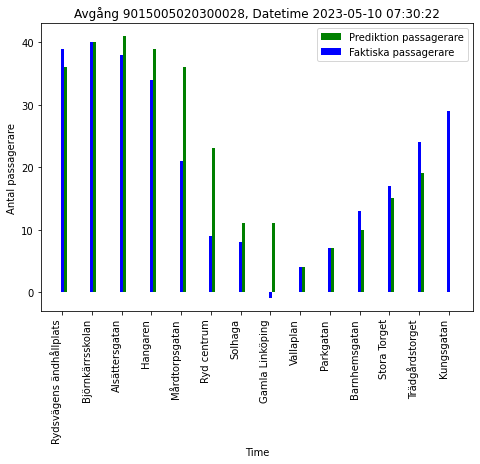

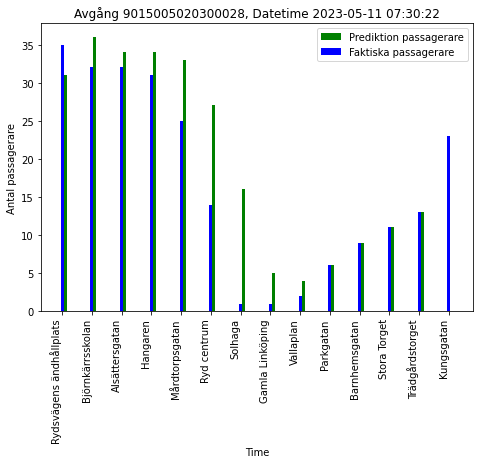

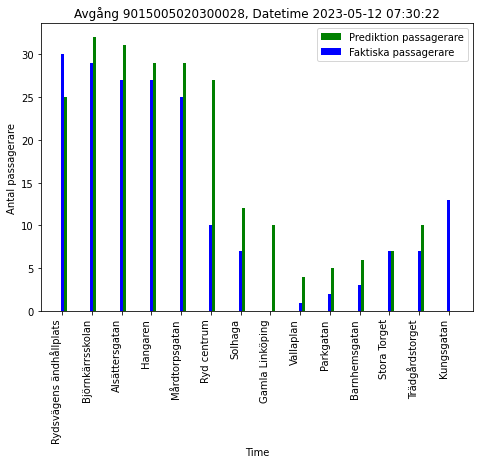

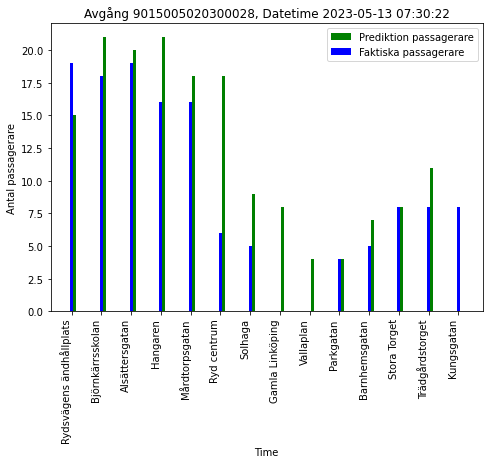

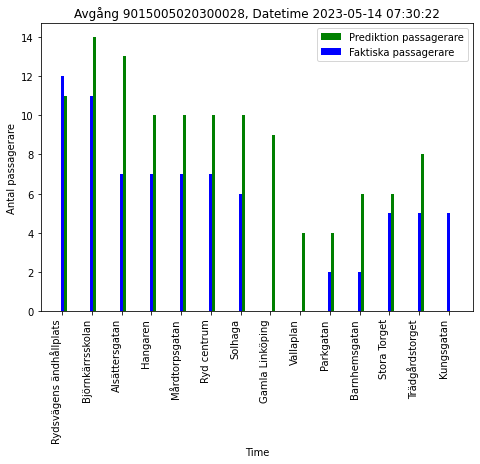

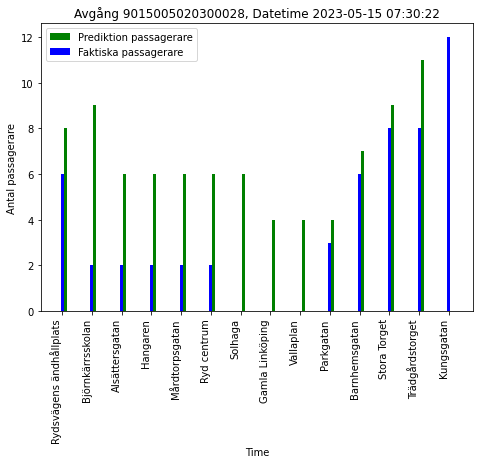

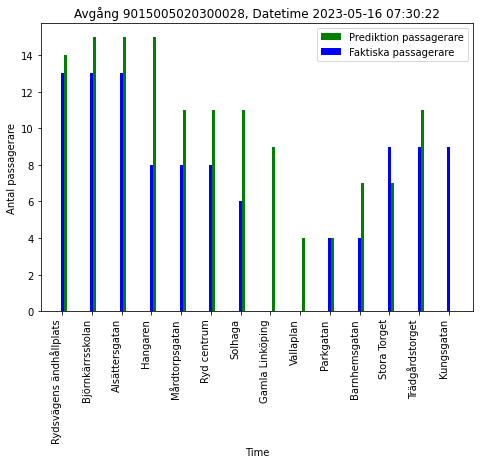

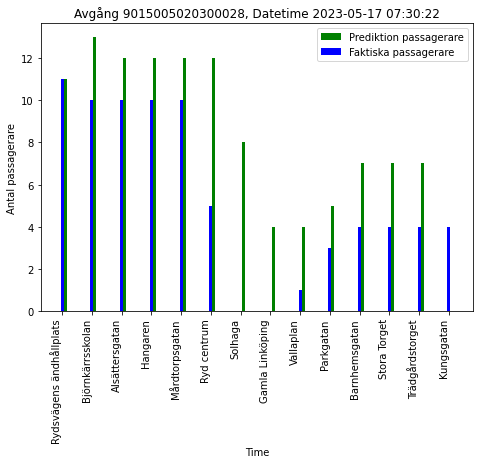

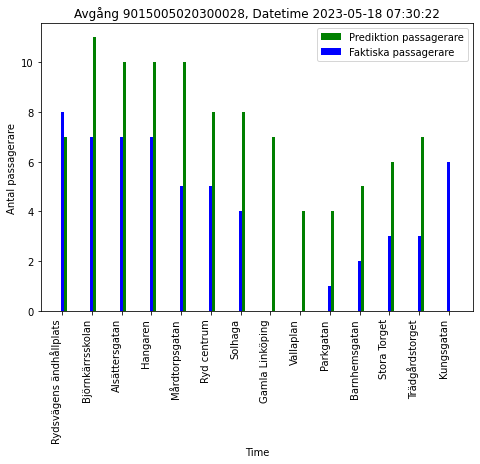

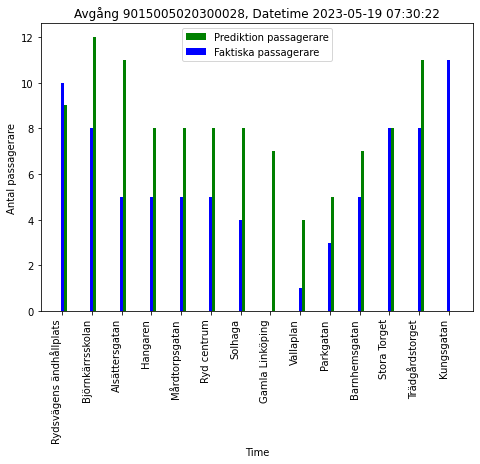

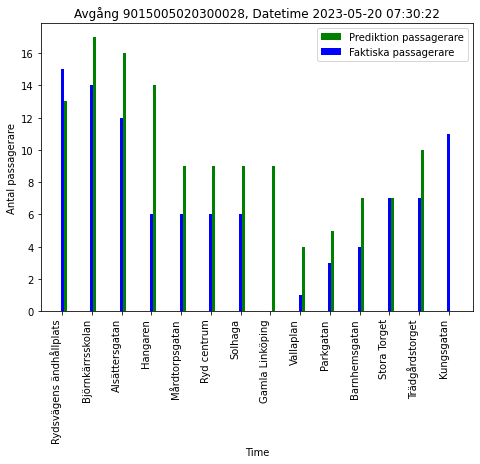

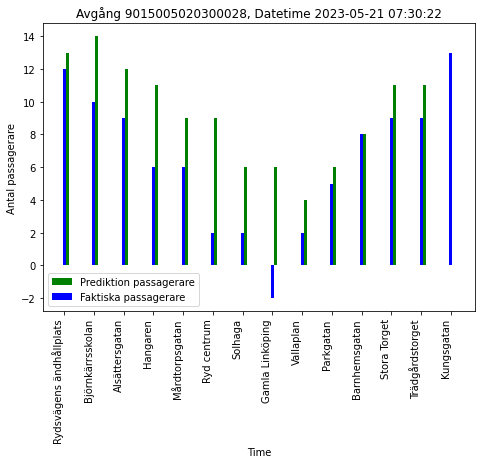

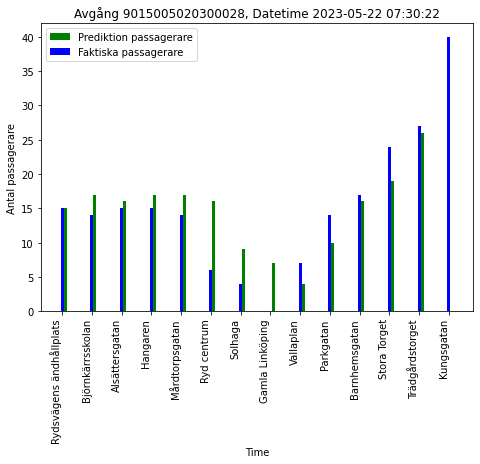

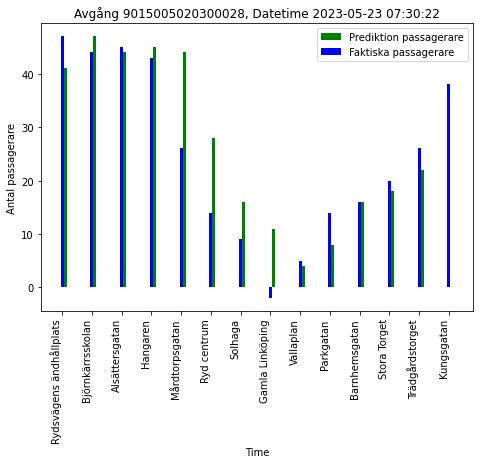

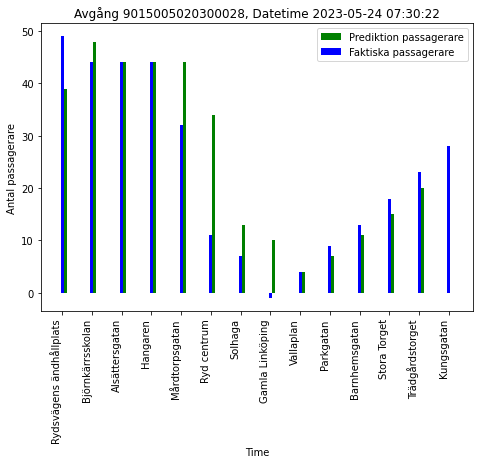

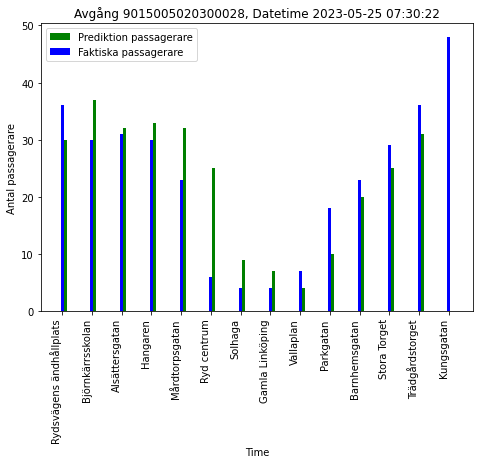

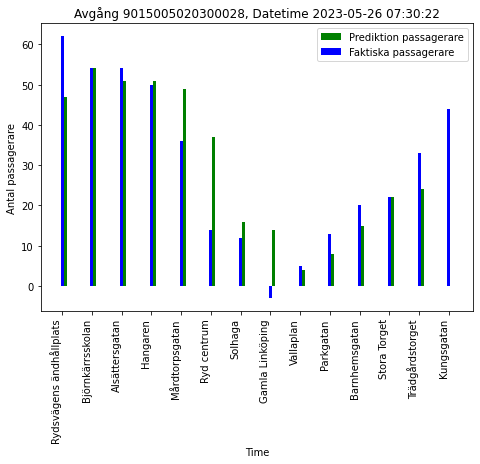

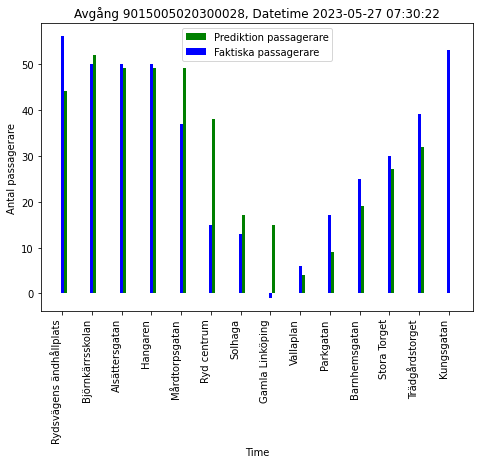

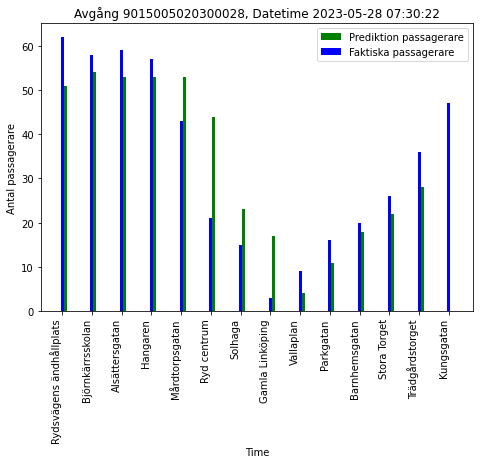

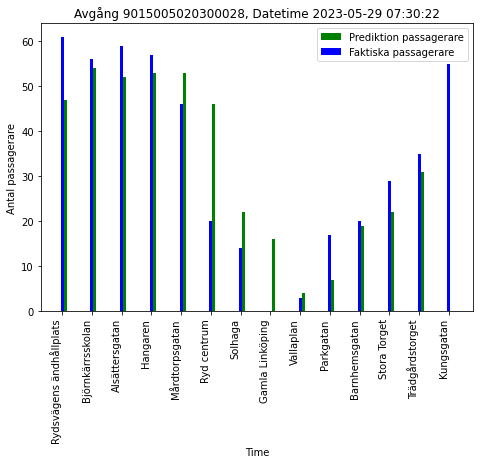

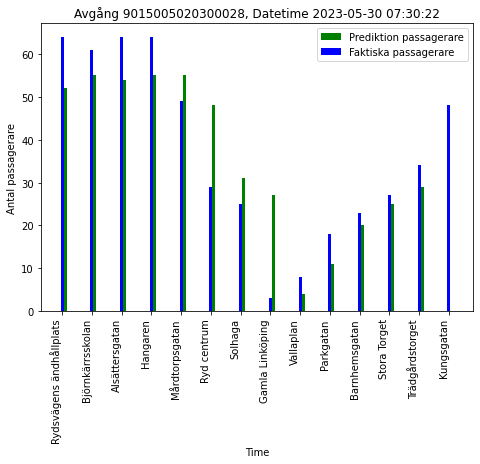

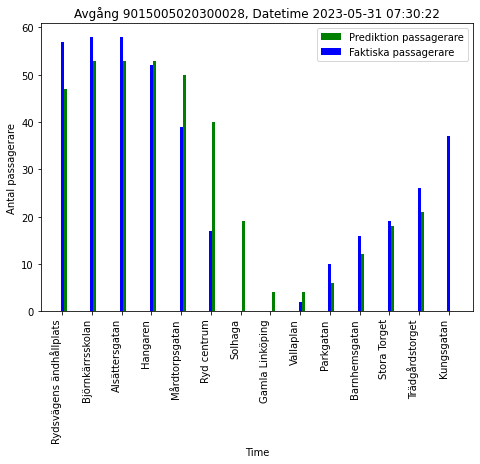

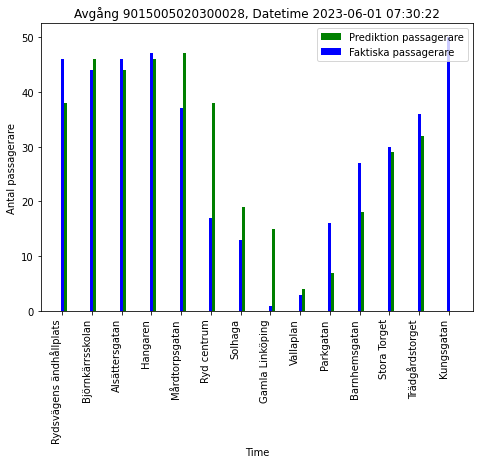

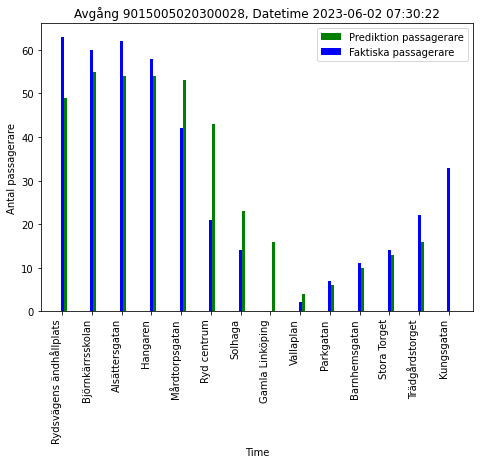

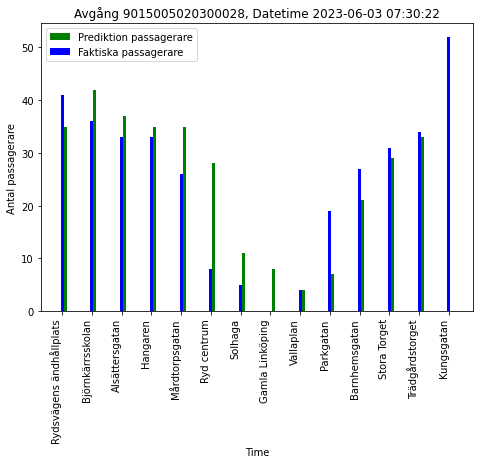

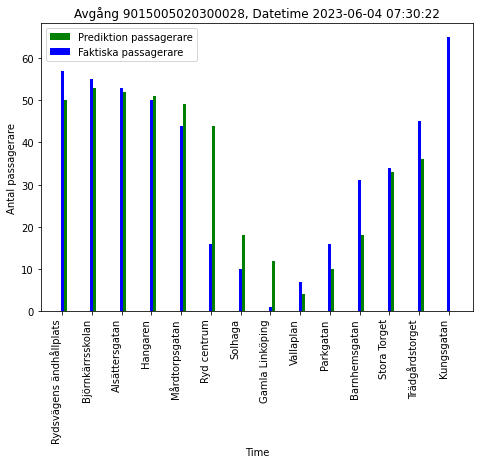

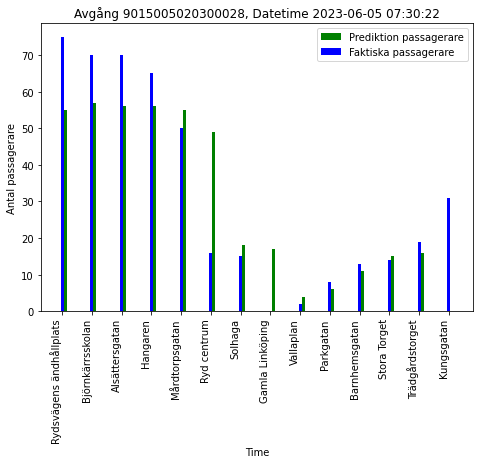

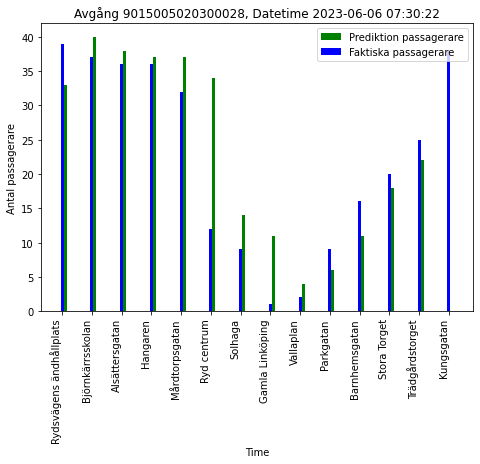

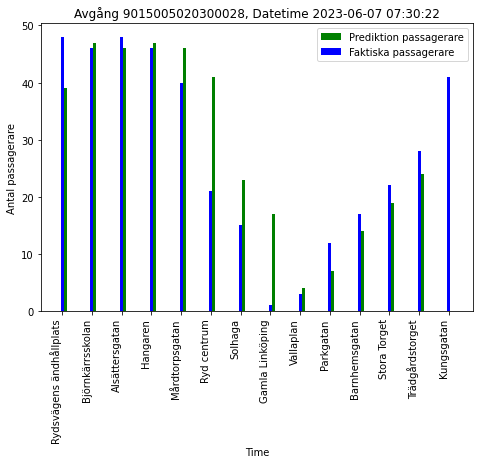

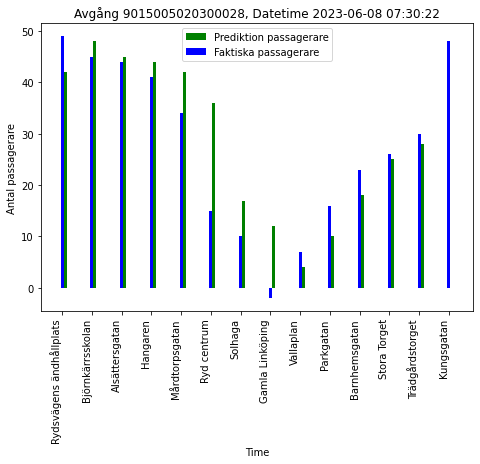

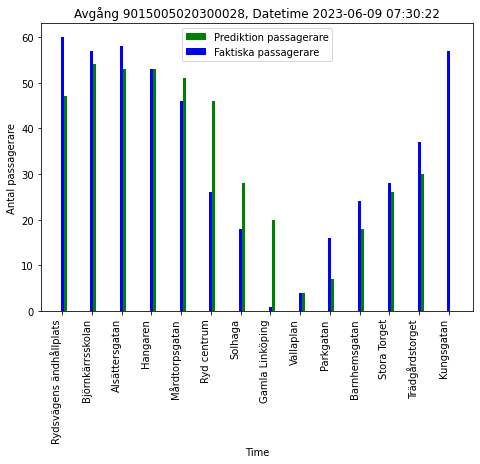

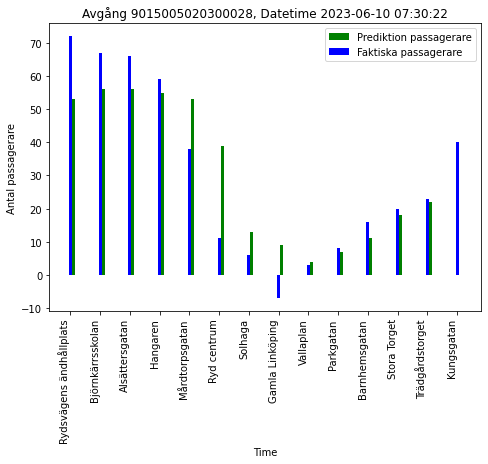

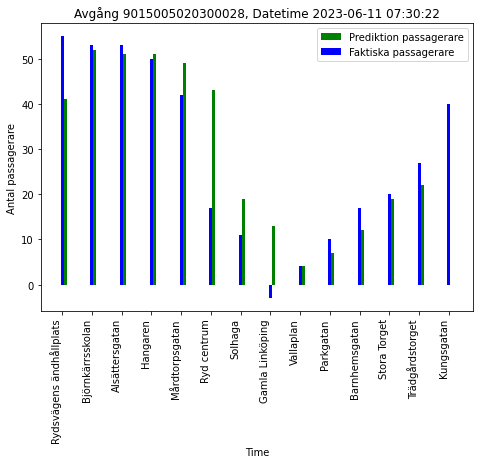

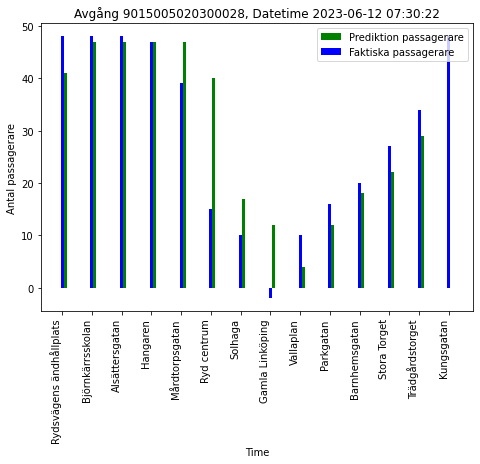

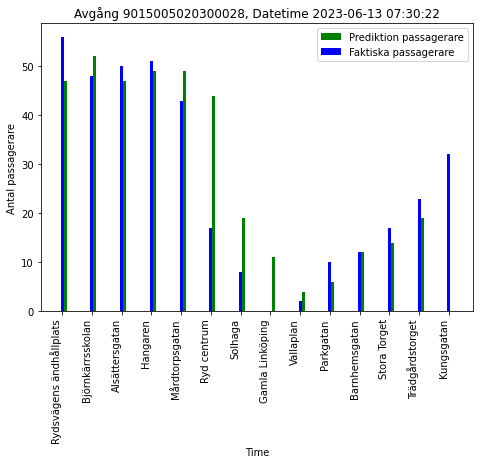

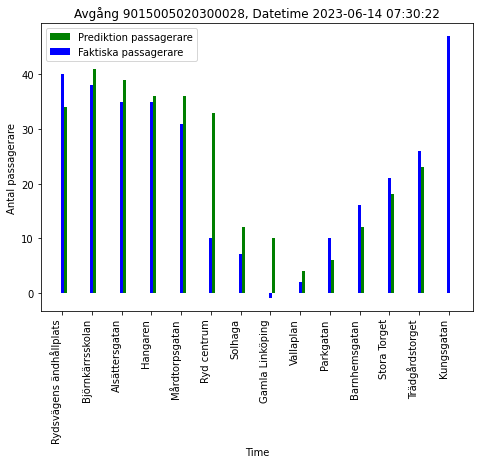

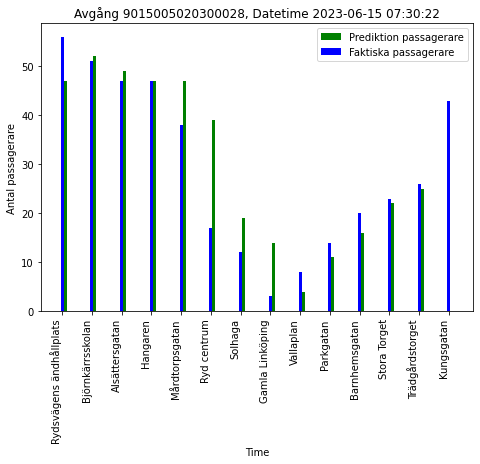

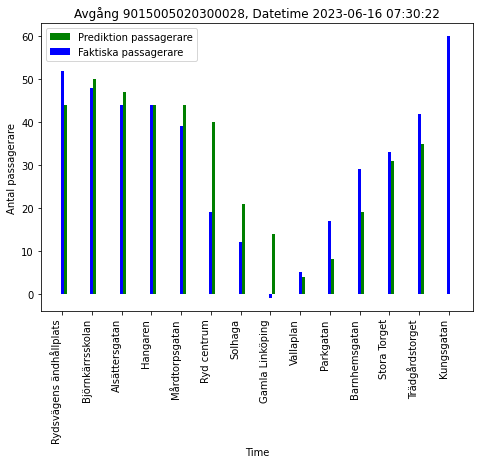

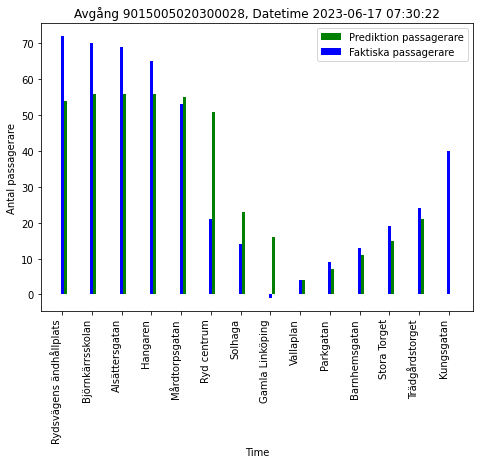

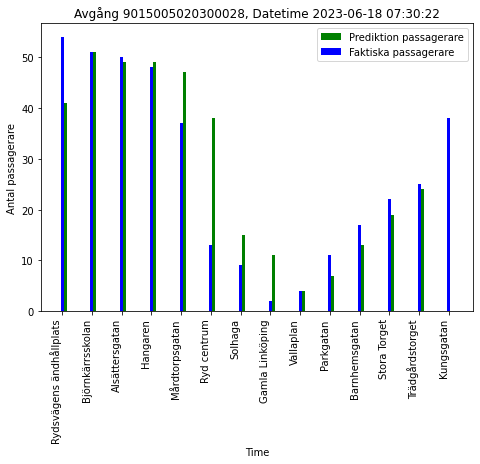

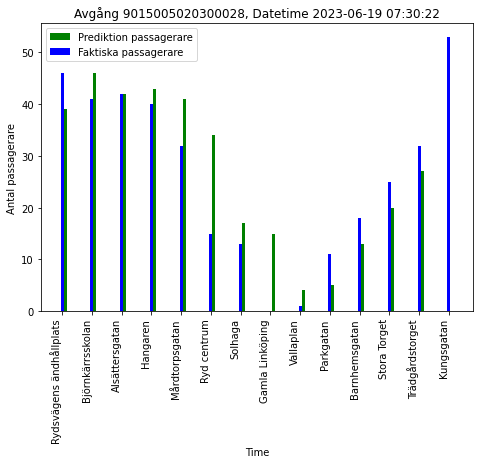

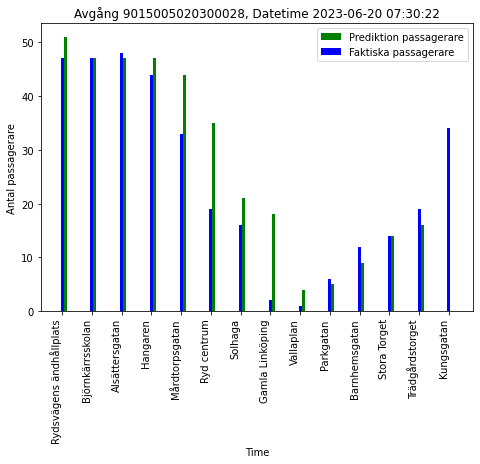

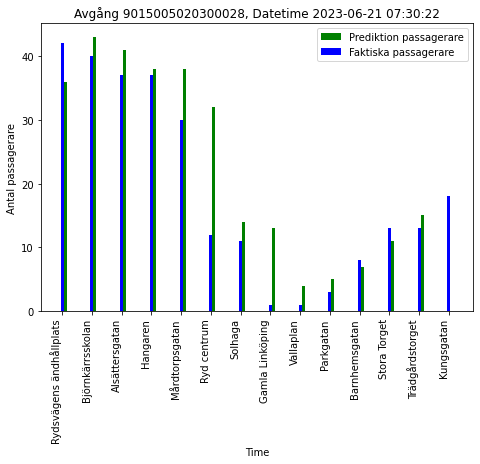

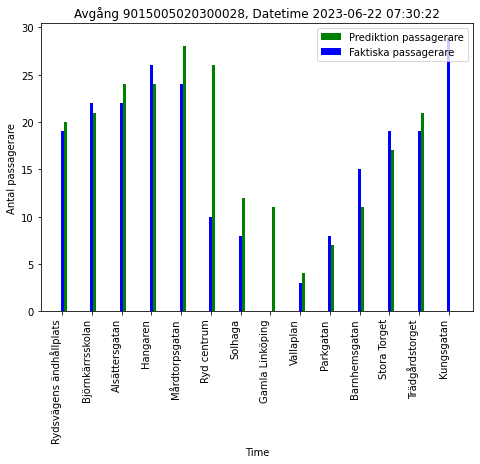

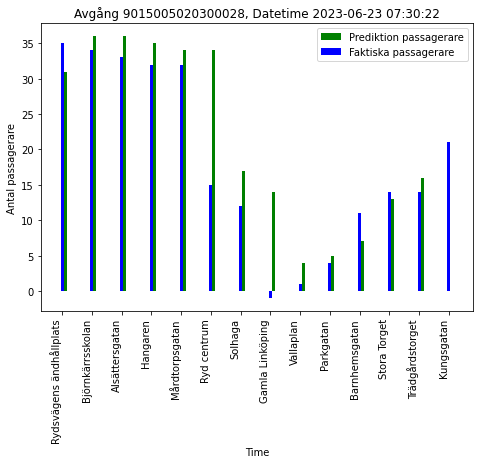

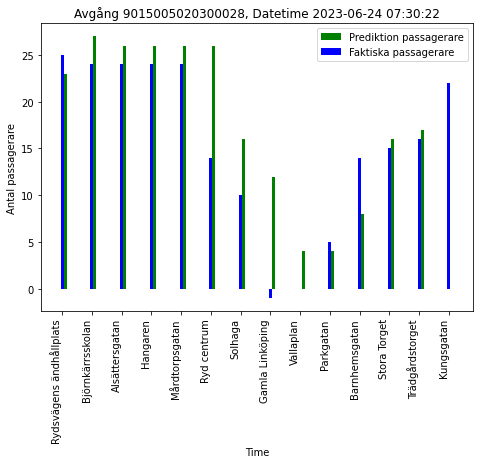

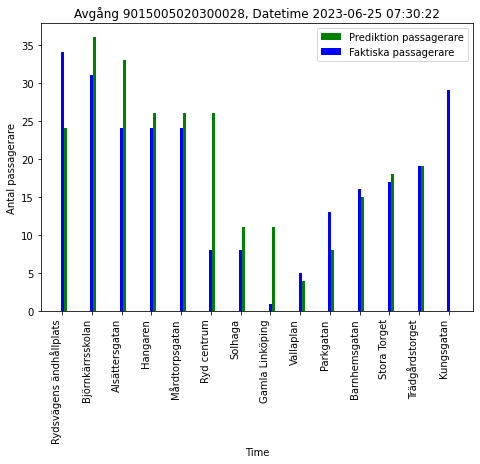

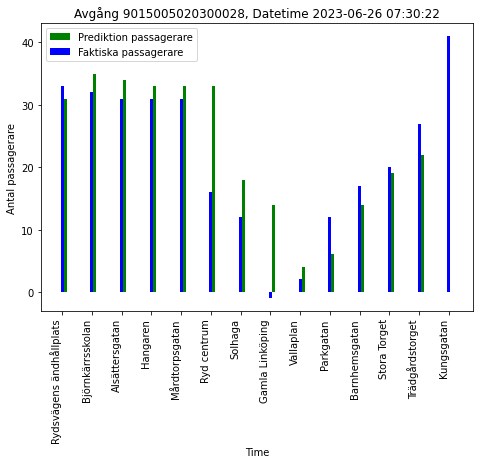

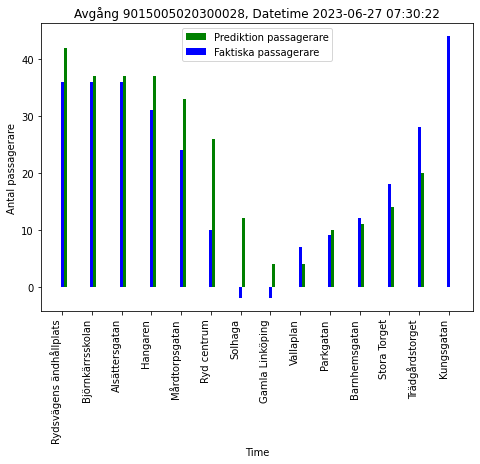

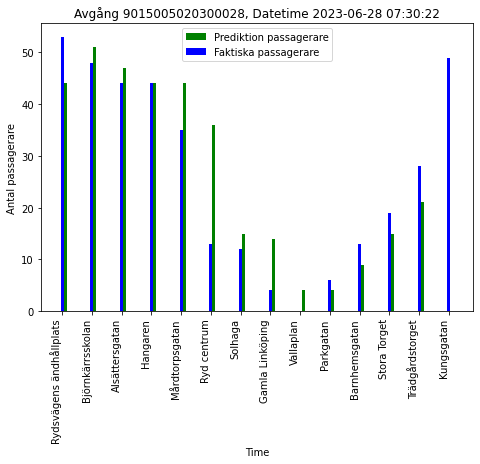

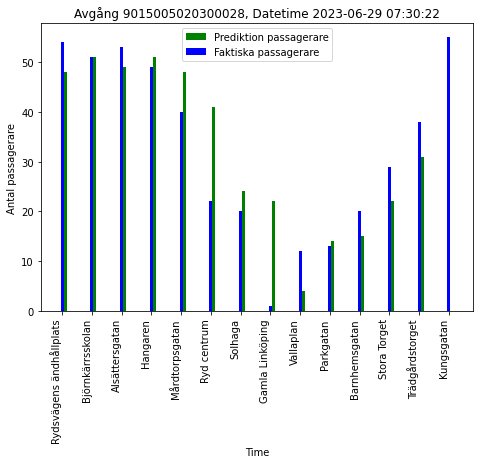

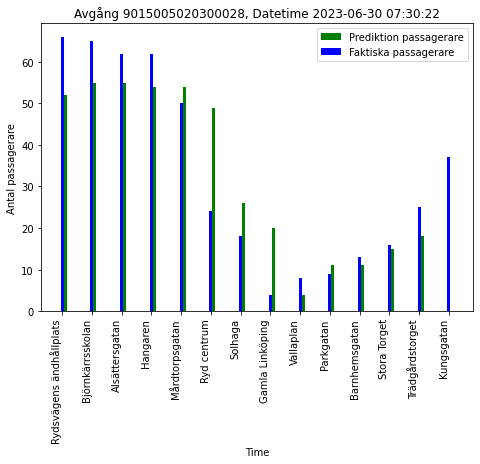

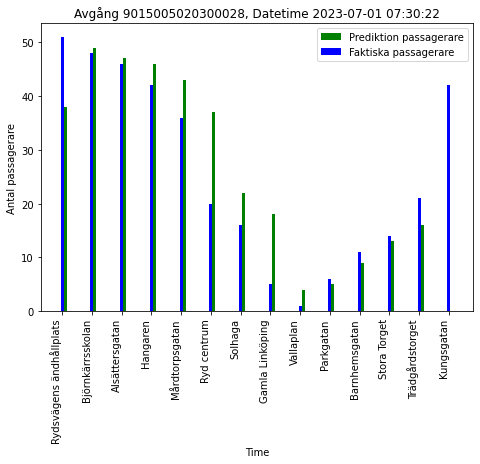

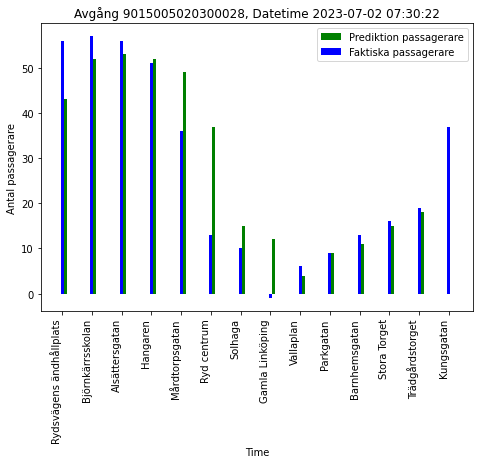

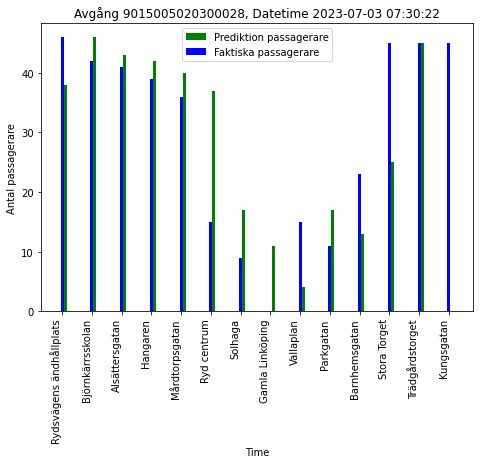

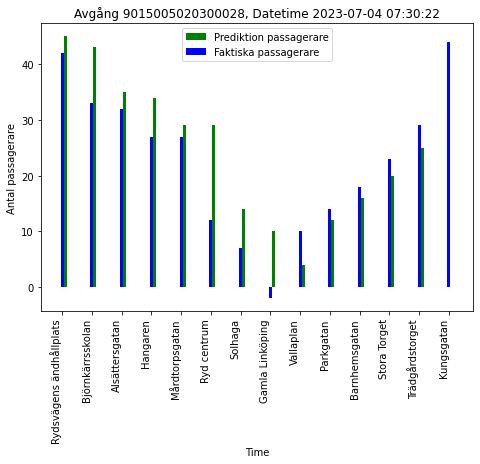

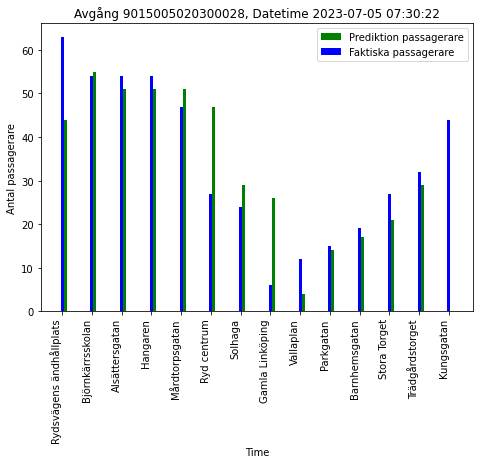

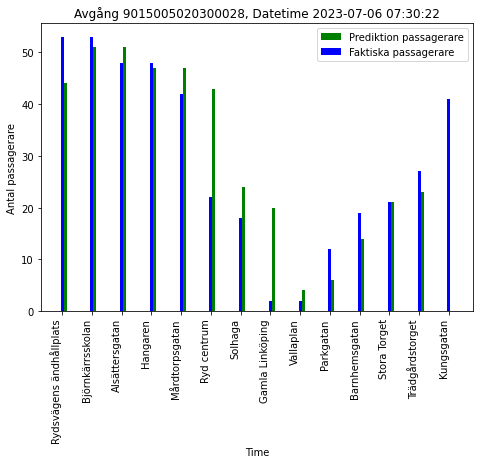

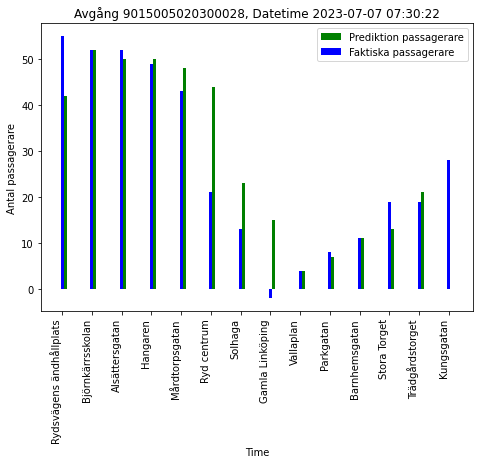

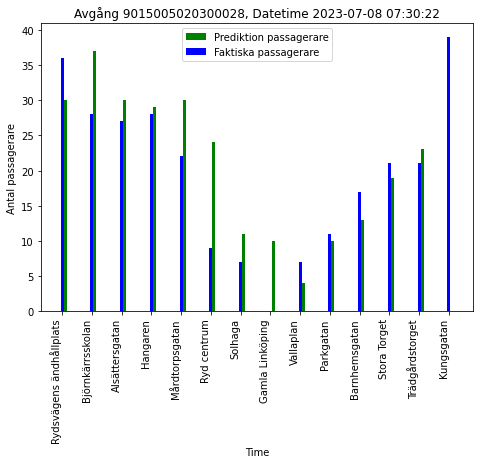

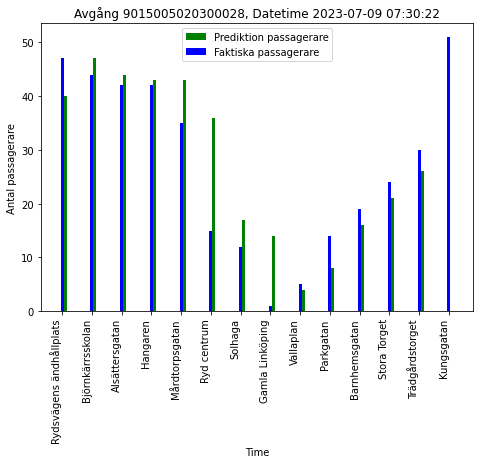

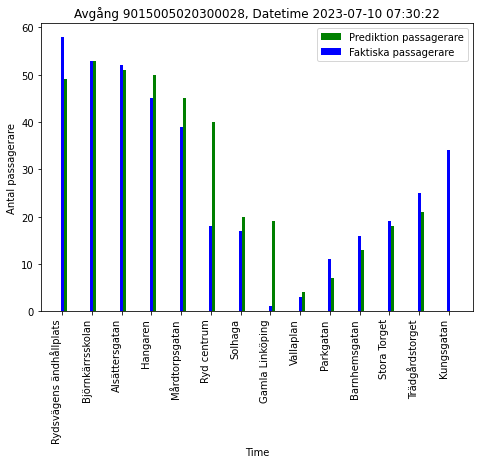

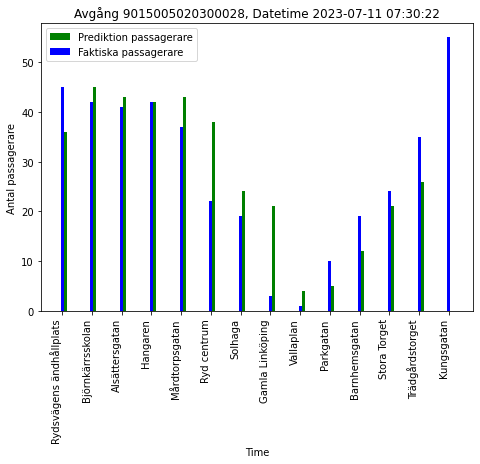

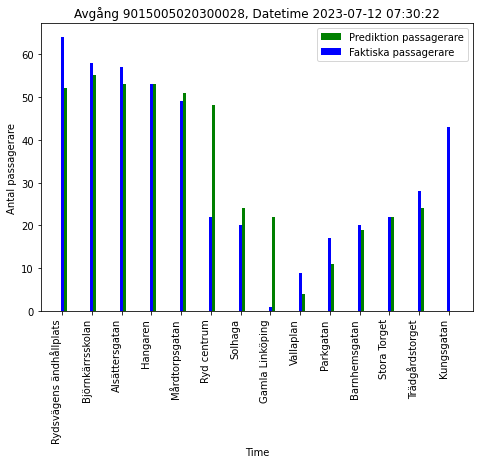

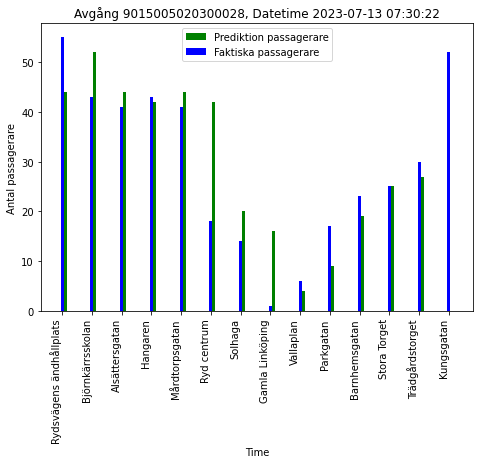

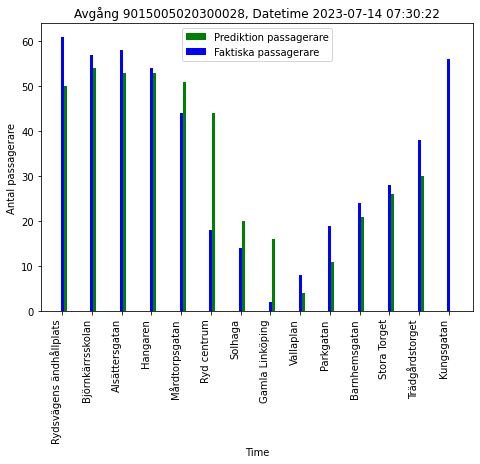

In [87]:
for i in range(0, len(saved_tours)):
    date_time = pd.to_datetime(saved_tours[i]['Tidpunkt'])
    stopname = saved_tours[i]['Hållplatsnamn']
    X = np.arange(len(saved_tours[i]))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    fig.autofmt_xdate(rotation=90)
    ax.bar(X + 0.10, saved_tours[i]['prediction'].values, color = 'g', width = 0.1)
    ax.bar(X + 0.00, saved_tours[i]['Ombord'].values, color = 'b', width = 0.1)
    

    xftm = mdates.DateFormatter('%y-%m-%d %H:%M:%S')
    ax.xaxis.set_major_formatter(xftm)
    title = 'Avgång ' + str(selected_GID) + ', Datetime ' + saved_tours[i]['Tidpunkt'].iloc[0]
    plt.xlabel('Time')
    plt.ylabel('Antal passagerare')
    plt.title(title)
    plt.xticks(X, stopname)   
    plt.legend(['Prediktion passagerare', 'Faktiska passagerare'])

C:\Users\USER88~1\AppData\Local\Temp/ipykernel_32304/4032903645.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


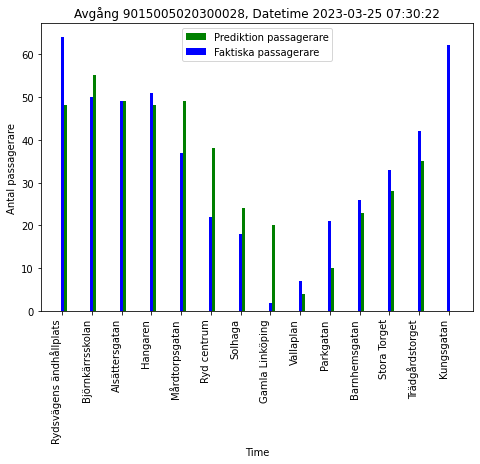

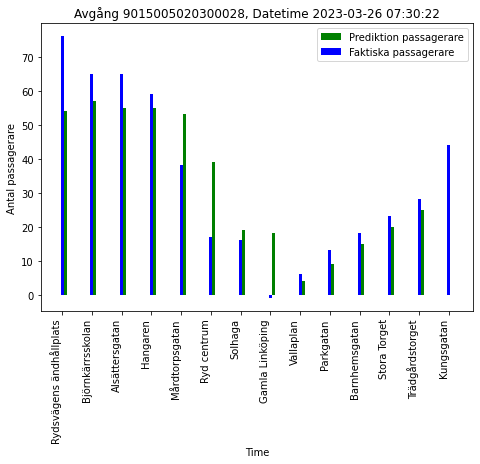

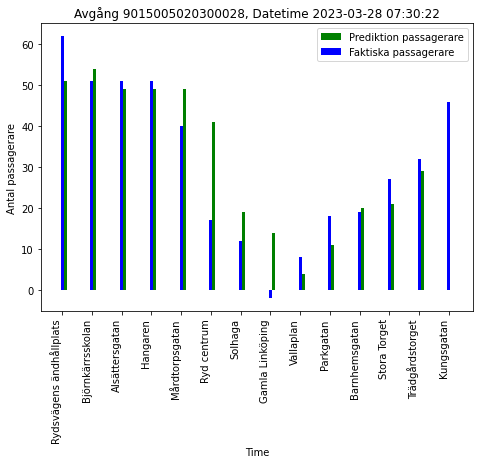

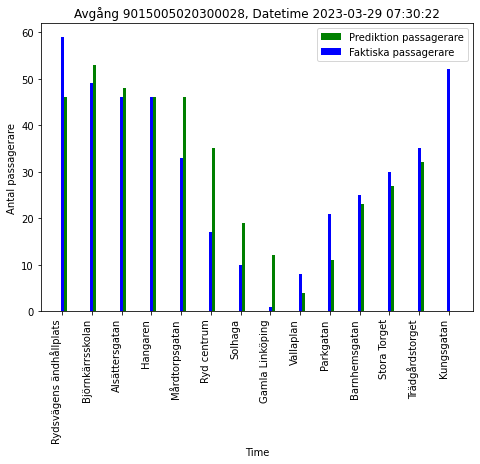

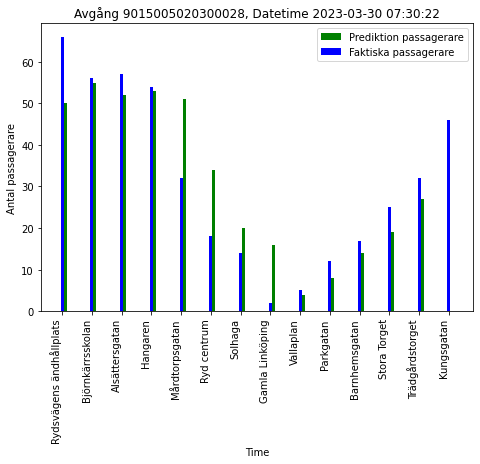

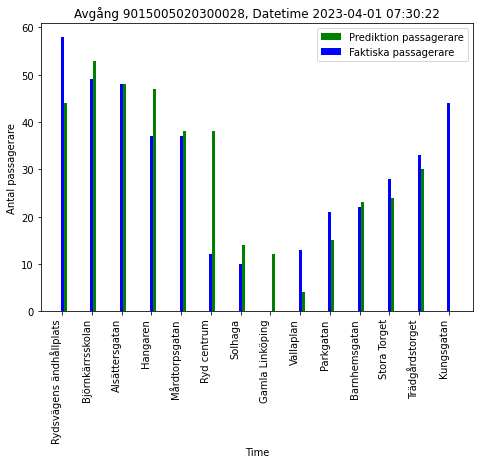

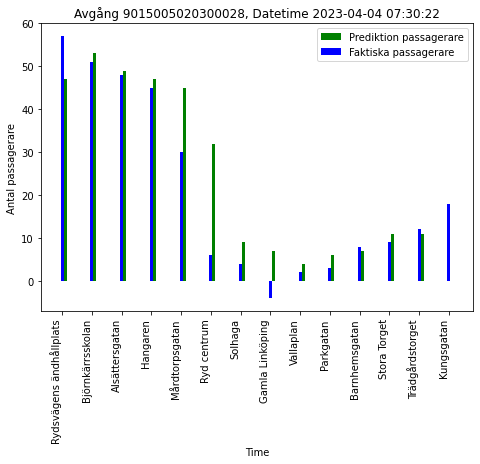

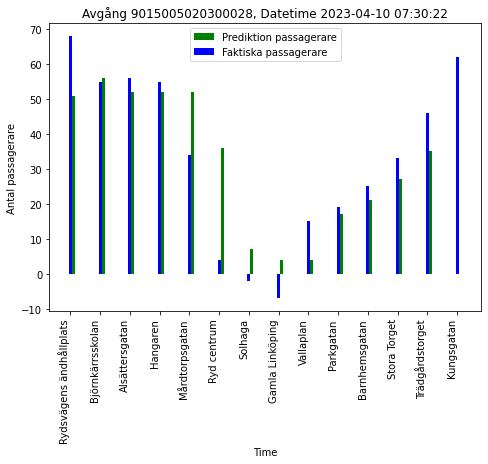

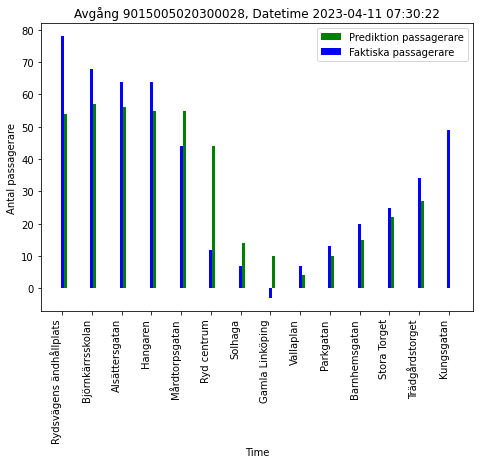

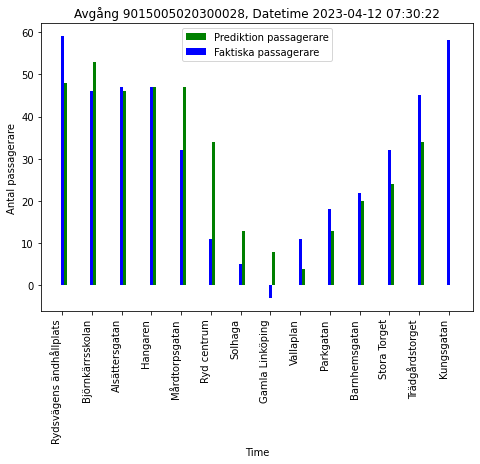

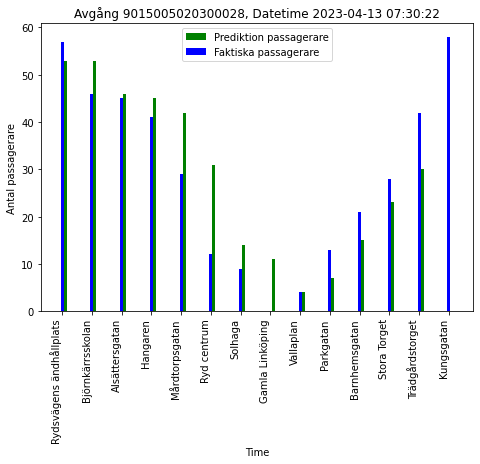

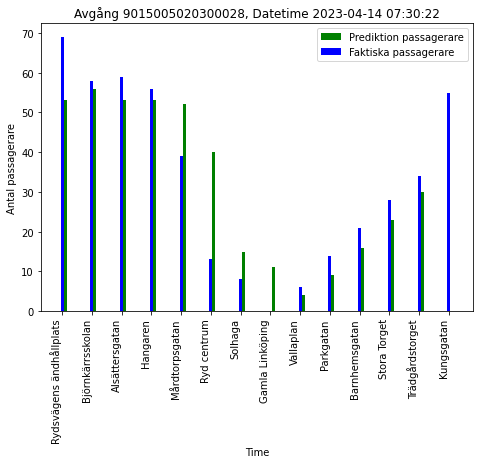

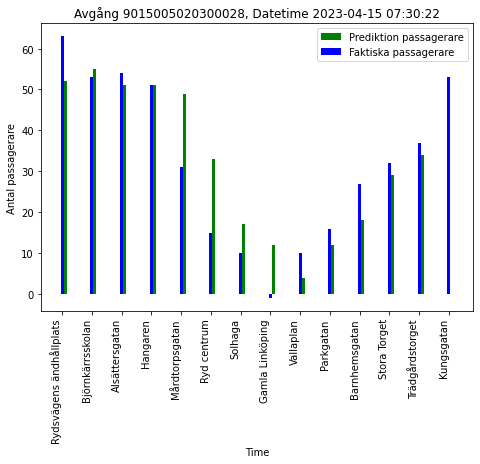

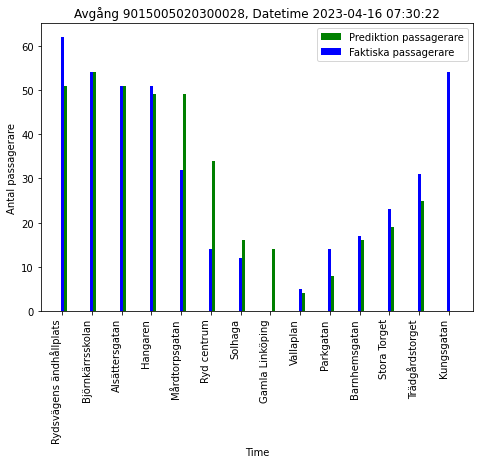

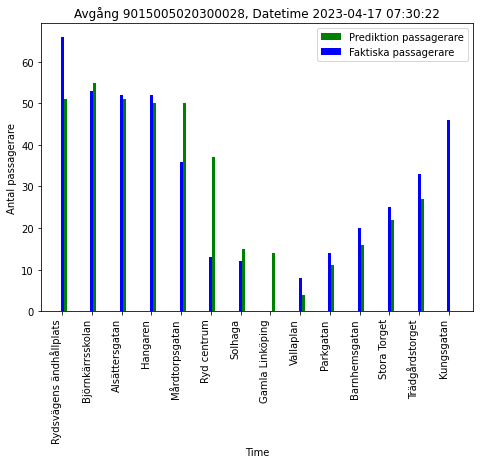

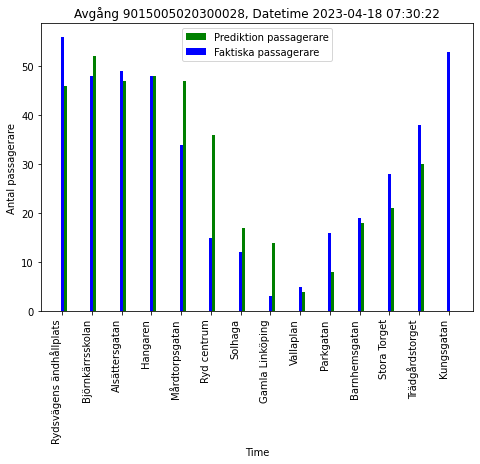

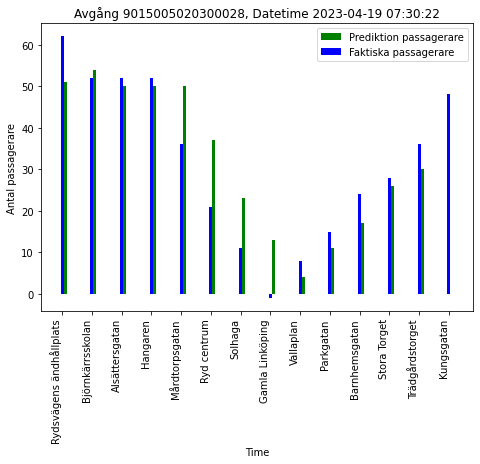

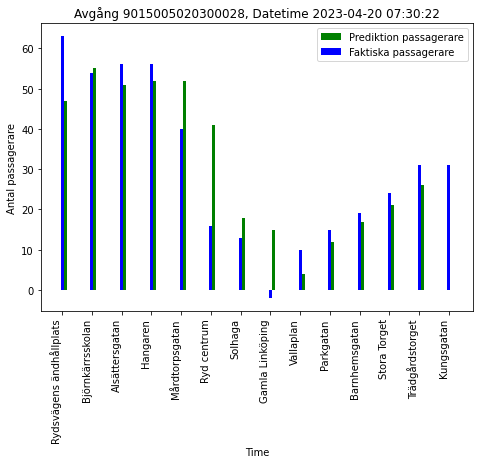

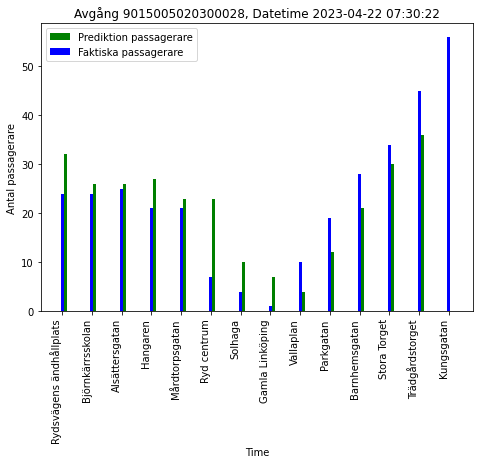

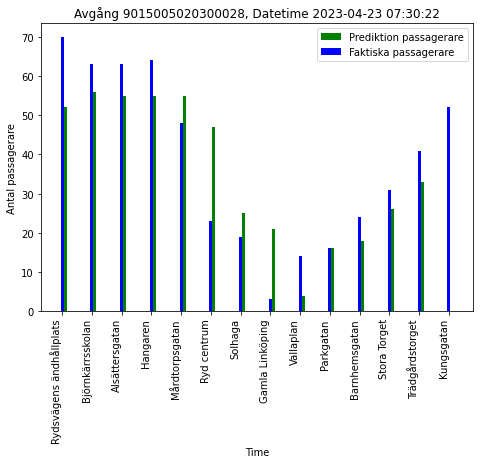

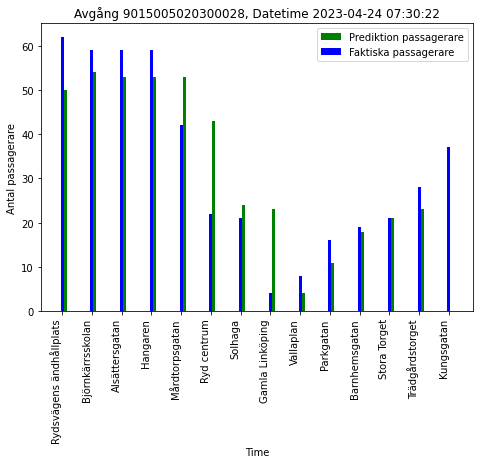

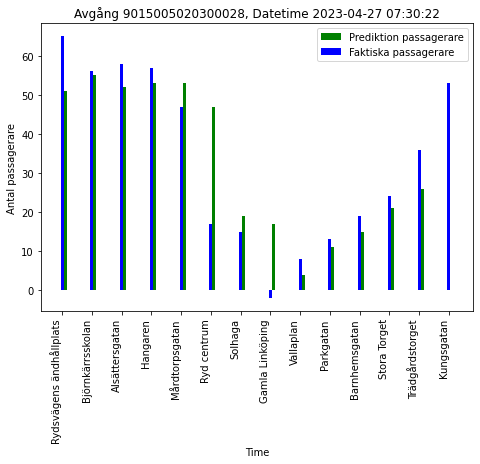

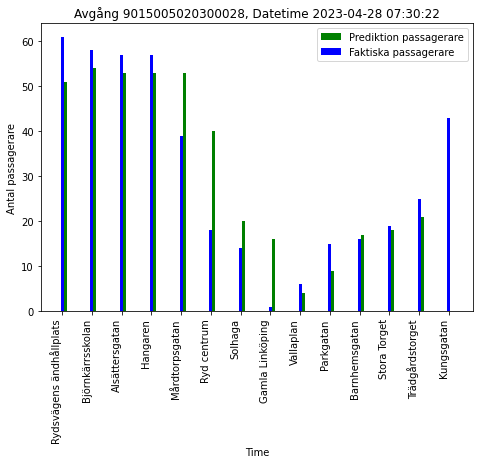

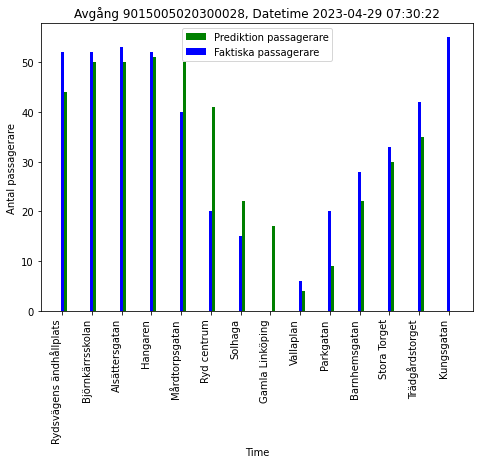

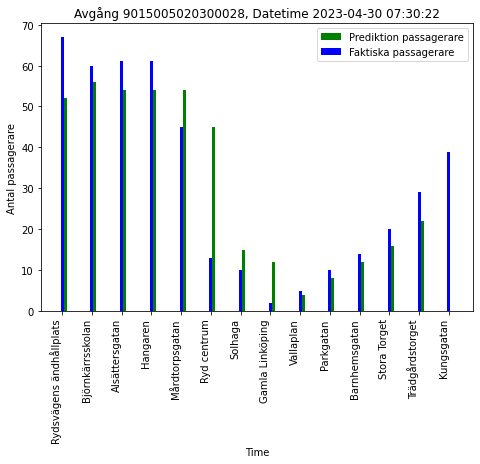

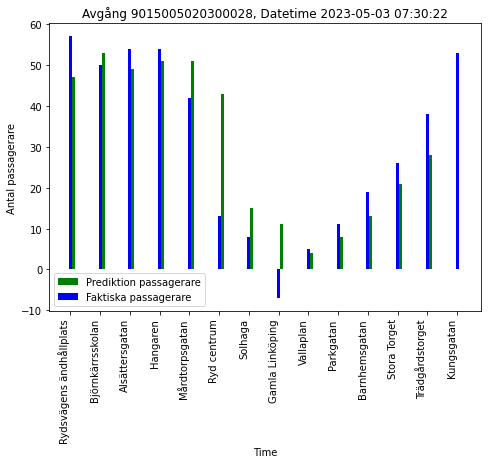

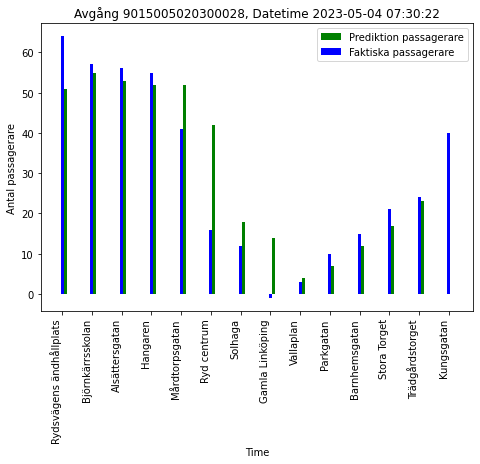

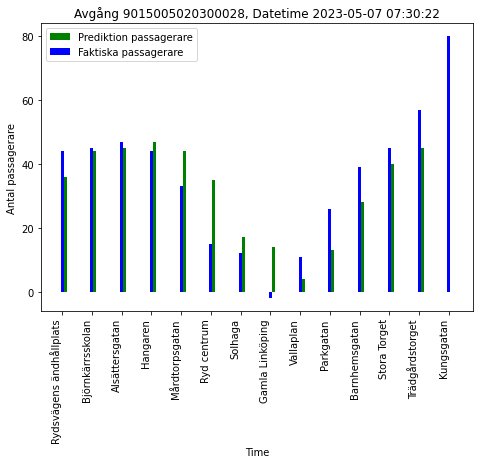

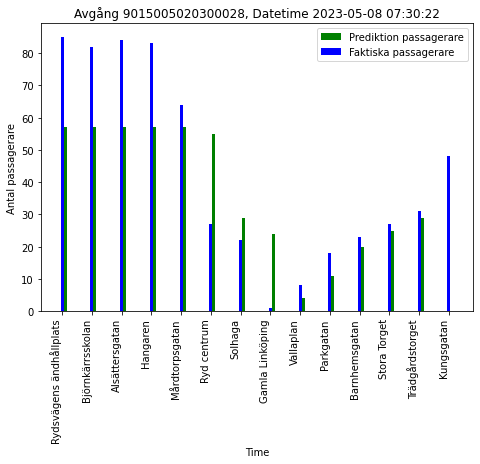

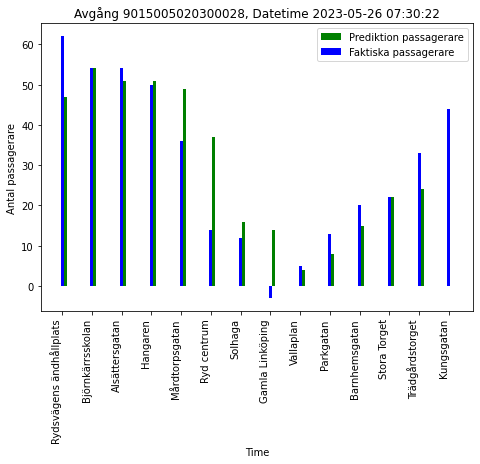

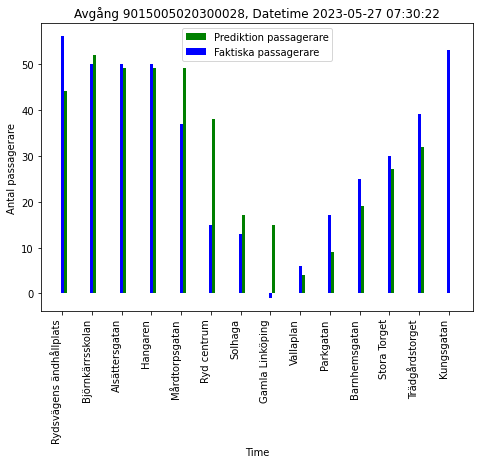

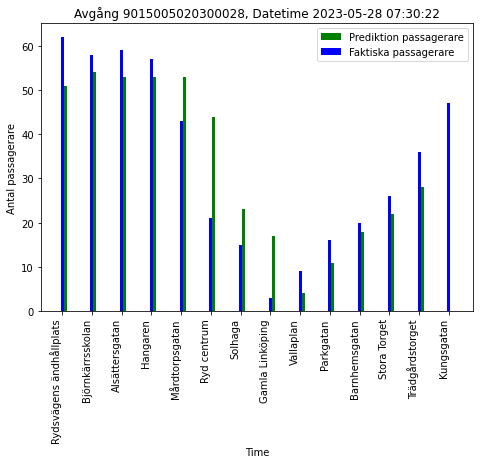

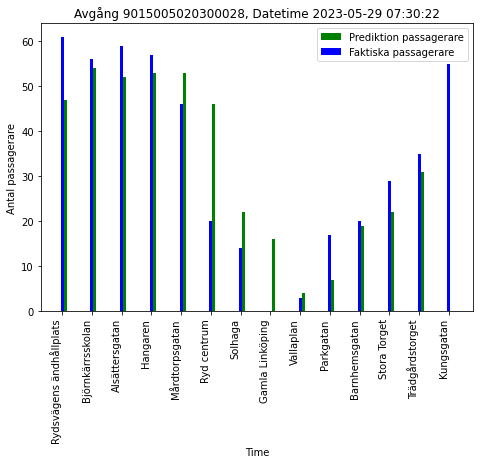

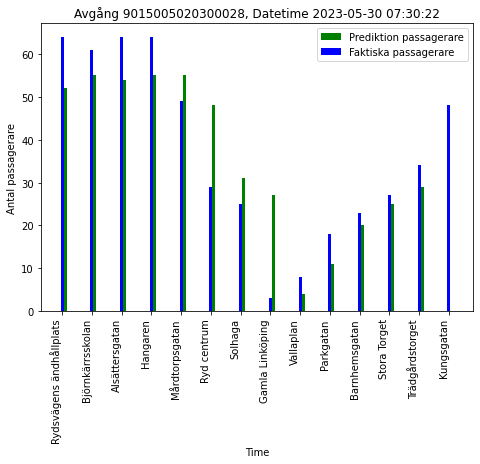

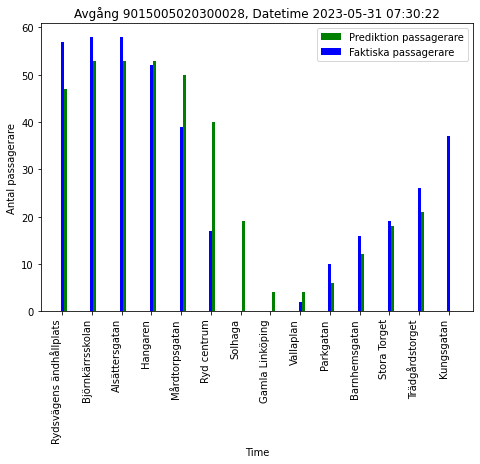

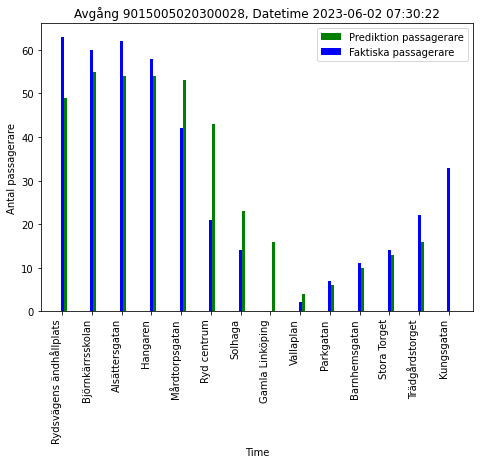

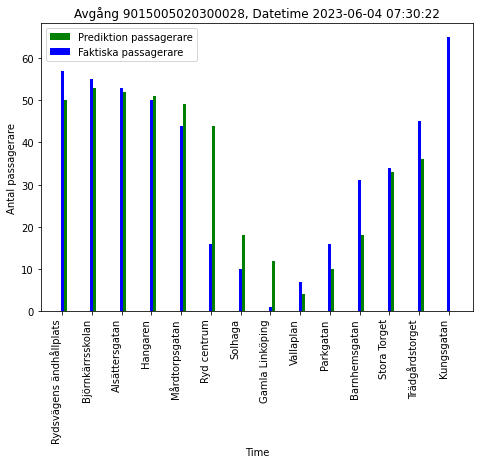

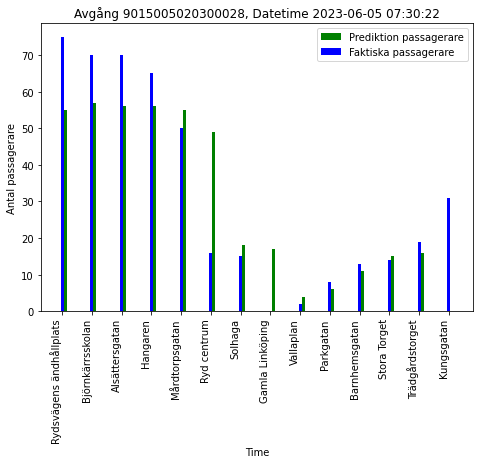

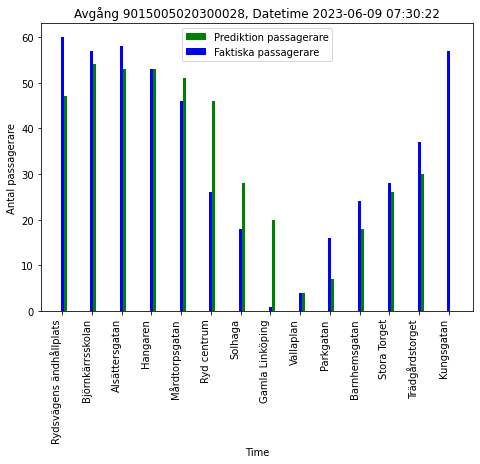

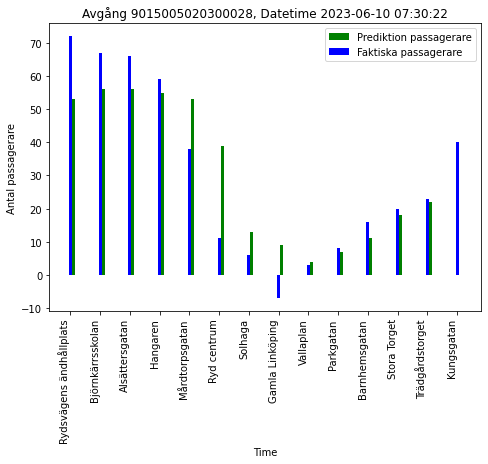

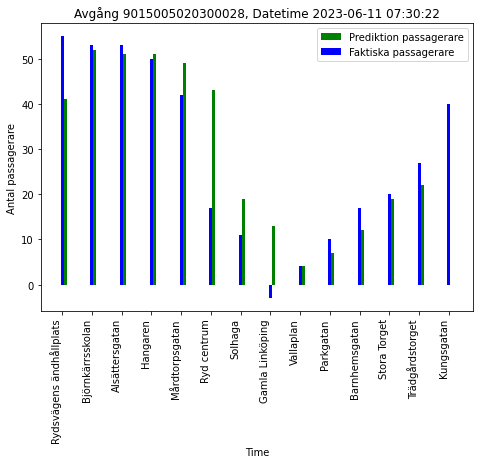

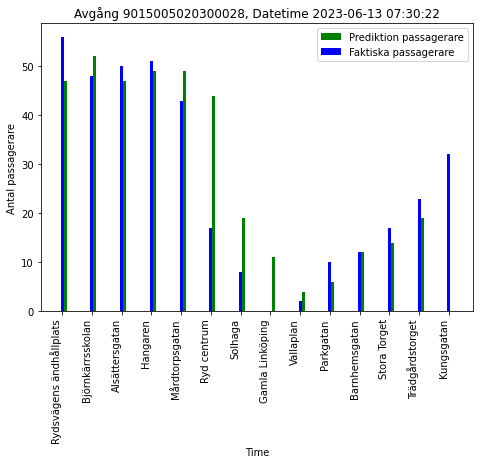

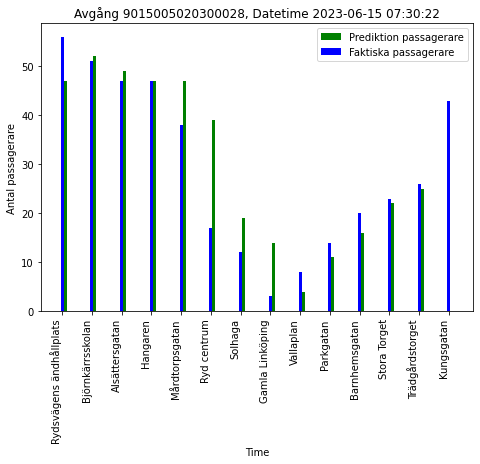

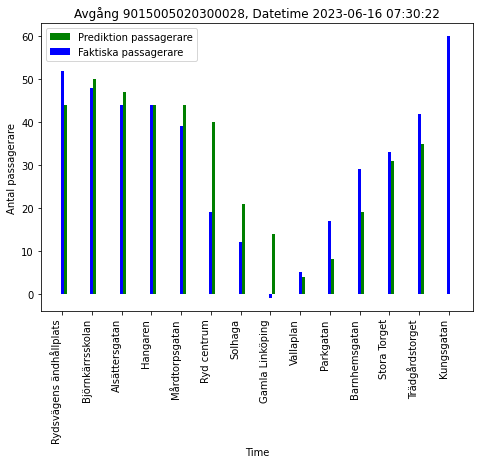

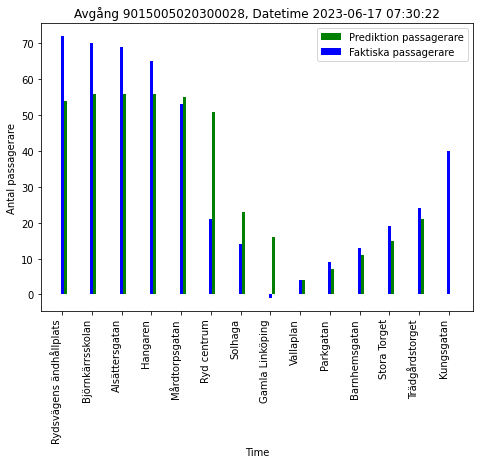

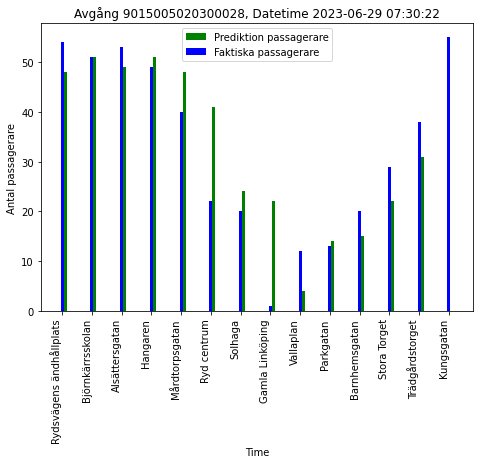

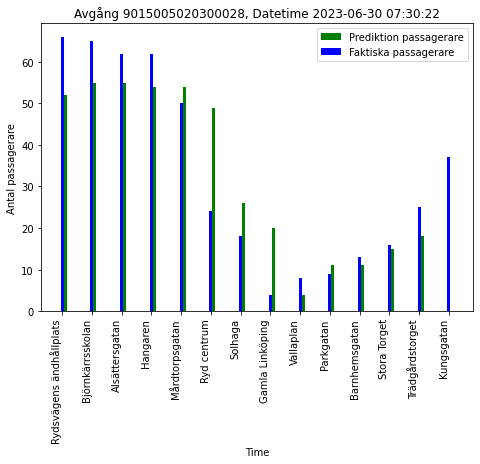

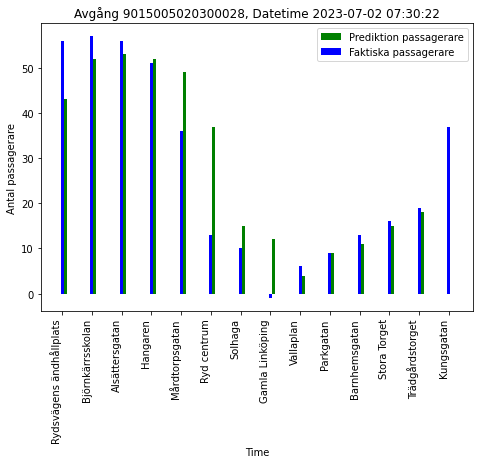

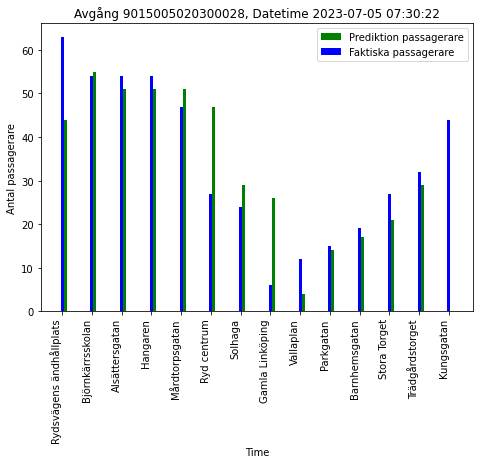

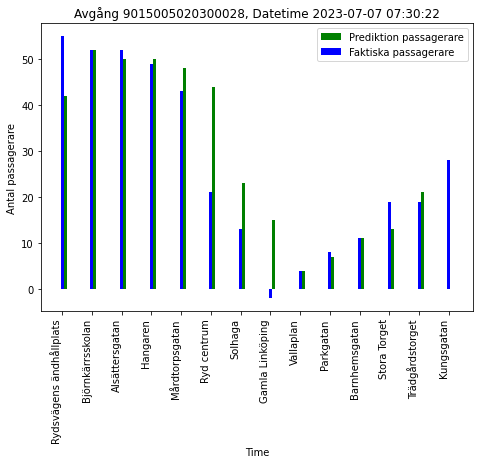

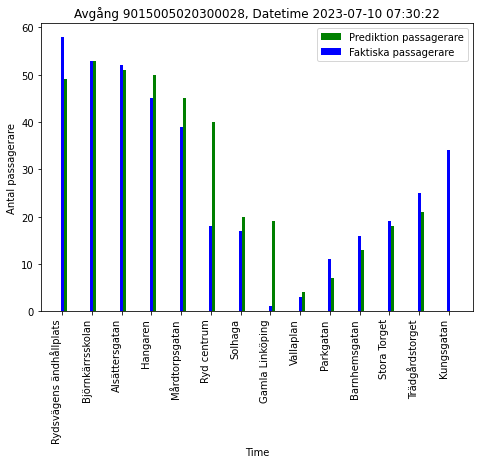

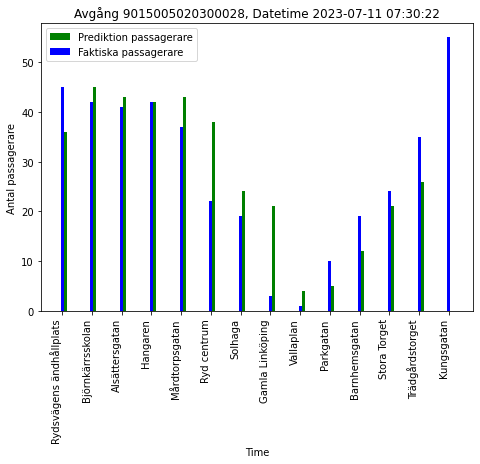

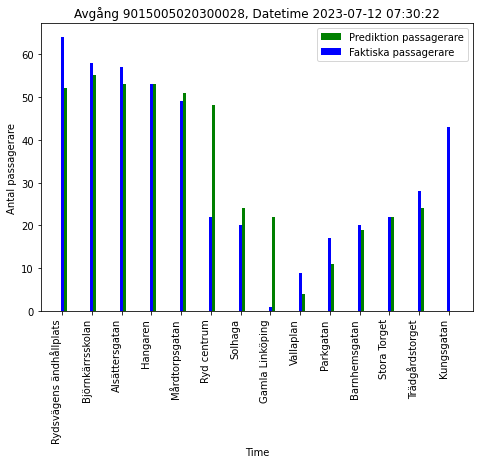

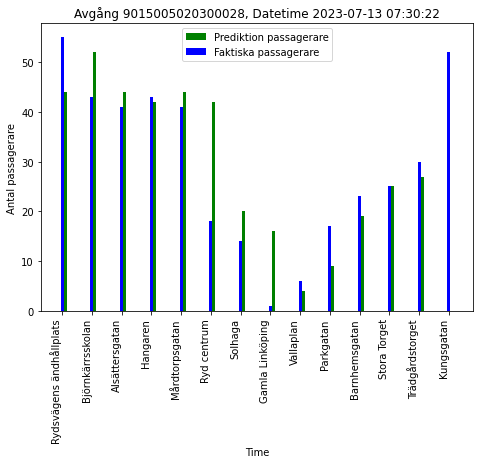

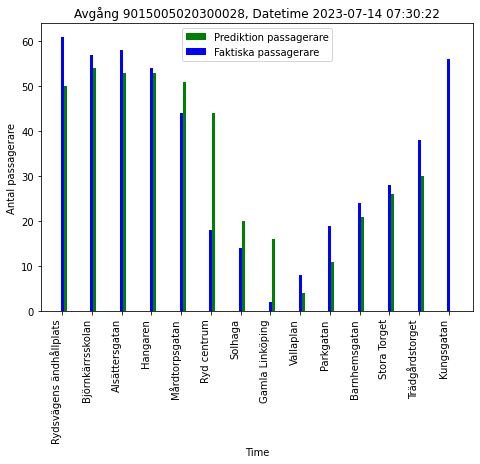

In [88]:
for i in range(0, len(tours_overload)):
    date_time = pd.to_datetime(tours_overload[i]['Tidpunkt'])
    stopname = tours_overload[i]['Hållplatsnamn']
    X = np.arange(len(tours_overload[i]))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    fig.autofmt_xdate(rotation=90)
    ax.bar(X + 0.10, tours_overload[i]['prediction'].values, color = 'g', width = 0.1)
    ax.bar(X + 0.00, tours_overload[i]['Ombord'].values, color = 'b', width = 0.1)
    

    xftm = mdates.DateFormatter('%y-%m-%d %H:%M:%S')
    ax.xaxis.set_major_formatter(xftm)
    title = 'Avgång ' + str(selected_GID) + ', Datetime ' + tours_overload[i]['Tidpunkt'].iloc[0]
    plt.xlabel('Time')
    plt.ylabel('Antal passagerare')
    plt.title(title)
    plt.xticks(X, stopname)   
    plt.legend(['Prediktion passagerare', 'Faktiska passagerare'])